# <div class="text-center"> Fundamentos de Machine Learning</div>


### <div class="text-center">***LABORATORIO 2019***</div>

---

![DevIt](logo.jpg)

---
<div class="text-center"> Andrea Correa </div>
<div class="text-center">María Laura Gayo </div>
<div class="text-center"> Mariano Koci </div>
<div class="text-center">Alejandro Wohlwend </div>
<div class="text-center">Renzo Daset </div>
<div class="text-center">Laura Rodríguez </div>

---






<a id='Indice'></a>
### Índice

1. [Objetivo](#Objetivo)

2. [Realidad Planteada](#Realidad)

3. [Requerimientos Planteados](#Requerimientos)

4. [Adquisición de datos](#Adquisicion-Datos)
    4. [Dependencias](#Dependencias)
    4. [Import de CSV](#Import-CSV)

5. [Transformación de los datos](#Transformacion)
    5. [Transformación de Monedas](#Transformación-Moneda)
    5. [Descartando columnas no utilizadas](#Descartadas)
    5. [Agrupación de posiciones](#Posiciones)    
    5. [Limpieza de valores inválidos](#Transformación-Inválidos)
6. [Procesamiento de datos, entrenamiento y evaluación](#Procesamiento)
    6. [Creación de Datasets](#Datasets)
    6. [Dataset para Goalkeepers](#Goalkeepers)
    6. [Dataset para CentralDefenders](#CentralDefenders)
    6. [Dataset para Right/Left Backs](#Right/LeftBacks)
    6. [Dataset para Right/Left Winger Backs](#Right/LeftWingerBacks)
    6. [Dataset para Center Defender Midfielders](#CenterDefenderMidfielders)
    6. [Dataset para Central Midfielders](#CentralMidfielders)
    6. [Dataset para Left/Right Central Midfielders](#Left/RightCentralMidfielders)
    6. [Dataset para Central Attacking Midfielders](#CentralAttackingMidfielders)
    6. [Dataset para Left/Right Midfielders](#Left/RightMidfielders)
    6. [Dataset para Left/Right Attacking Wingers](#Left/RightAttackingWingers)
    6. [Dataset para Center/Left/Right Forwarders](#Center/Left/RightForwarders)
    6. [Dataset para Strikers](#Strikers)
    
7. [Gráfica de importancia variables en posiciones](#GraficaImportancia)

8. [Análisis de datos por posiciones](#AnalisisPorPosicion) 
    8. [Análisis para Goalkeeper](#AlgoritmoGK)
    8. [Conclusiones intermedias](#ConclusionesIntermedias)
    8. [Análisis para CentralDefenders](#AlgoritmoCD)
    8. [Random Forest CentralDefenders](#RForestCD)
    8. [Análisis para Right/Left Backs](#AlgoritmoRLB)
    8. [Random Forest Right/Left Backs](#RForestRLB)
    8. [Análisis para Right/Left Winger Backs](#AlgoritmoRLWB)
    8. [Random Forest Right/Left Winger Backs](#RForestRLWB)
    8. [Análisis para Center Defender Midfielders](#AlgoritmoCDM)
    8. [Random Forest Center Defender Midfielders](#RForestCDM)
    8. [Random Forest Central Midfielders](#RForestCM)
    8. [Random Forest Left/Right Central Midfielders](#RForestLRCM)
    8. [Random Forest Central Attacking Midfielders](#RForestCAM)
    8. [Análisis para Left/Right Midfielders](#AlgoritmoLRM)
    8. [Random Forest Left/Right Midfielders](#RForestLRM)
    8. [Análisis para Left/Right Attacking Wingers](#AlgoritmoLRAM)
    8. [Random Forest Left/Right Attacking Wingers](#RForestoLRAM)
    8. [Análisis para Center/Left/Right Forwarders](#AlgoritmoCLRF)
    8. [Random Forest Center/Left/Right Forwarders](#RForestCLRF)
    8. [Análisis para Strikers](#AlgoritmoST)
    8. [Random Forest Strikers](#RForestST)

---

<a id='Objetivo'></a>
# Objetivo
---
[Inicio ▲](#Indice)

Esta tarea pretende la puesta en práctica y profundización de los siguientes puntos vistos en el taller:
- Pre-procesar los datos para un algoritmo de Machine Learning
- Aplicar un algoritmo de Machine Learning a un caso de estudio
- Evaluar los resultados del algoritmo y extraer conclusiones

<a id='Realidad'></a>
# Realidad planteada
---
[Inicio ▲](#Indice)

![DevIt](Logofifa.png)
Un jugador de FIFA 2019 online quiere construir un equipo competitivo y para ello quiere
predecir el valor de los jugadores en base a sus estadísticas, para de esta forma poder
armar un equipo sin perder dinero. Para ello se utiliza un conjunto de datos [1] escrapeado
de [2].

<a id='Requerimientos'></a>
# Requerimientos planteados
---
[Inicio ▲](#Indice)

- La ingesta de los datos desde los archivos .csv y .xml a un DataFrame de R.
- Validación y limpieza de datos.
- Análisis del conjunto de datos.
- Pre-procesamiento de los datos para obtener los mejores resultados del algoritmo.
- Evaluar el algoritmo con las técnicas vistas en el taller.


<a id='Adquisicion-Datos'></a>
# Adquisición de datos
---

<a id='Dependencias'></a>
## Dependencias
[Inicio ▲](#Indice)

In [40]:
install.packages("mice")
install.packages("lattice")
install.packages("dplyr")
install.packages("e1071")
install.packages("caret")
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("naniar")
install.packages("DataExplorer")
install.packages("ROCR")
install.packages("rpart")
install.packages("rattle")
install.packages("rpart.plot")
install.packages("fmsb")


Installing package into 'C:/Users/Mariano/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'mice' is in use and will not be installed"Installing package into 'C:/Users/Mariano/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'lattice' is in use and will not be installed"Installing package into 'C:/Users/Mariano/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'dplyr' is in use and will not be installed"Installing package into 'C:/Users/Mariano/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'e1071' is in use and will not be installed"Installing package into 'C:/Users/Mariano/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'caret' is in use and will not be installed"Installing package into 'C:/Users/Mariano/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'ggplot2' is in use and will not be insta

In [116]:
library(dplyr)
library(lattice)
library(ggplot2)
library(e1071)
library(caret)
library(DataExplorer)
library(tidyverse)
library(naniar)
library(mice)
library(ROCR)
library(rpart)
library(rattle)
library(rpart.plot)
library(boot)
library(fmsb)
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



### Biblioteca caret para R
**caret** es un acrónimo para **C** lassification  **A**nd **RE**gression **T**raining (Entrenamiento de Regresión y Clasificación).

- Caret nos permite acelerar nuestro trabajo proveyendo una interfaz común a cientos de algoritmos de Machine Learning: 
    - Este paquete nos permite utilizar más de 200 algoritmos de Machine Learning distintos.
    - Funciones para dividir los datos y muestrear los datos (Data splitting/sampling). 
    - Seleccionar características (Feature selection).
    - Tuneo de modelos.

Documentación de caret: http://topepo.github.io/caret/index.html

### Biblioteca e1071
**e1071** implementa varios algoritmos de Mahchine Learning que se pueden acceder con caret.

### Dataset **FIFA 2019**
Para este trabajo vamos a utilizar el un conjunto de datos de jugadores del juego FIFA 2019. https://www.kaggle.com/karangadiya/fifa19

Este dataset contiene informacion de los distintos jugadores del video juego FIFA 2019. El mismo contiene estadísticas de los distintos jugadores de fútbol que están en el juego.

En esta tarea vamos a intentar predecir el valor de los jugadores a partir de las distintas estadísticas.


<a id='Import-CSV'></a>
### Import-CSV
[Inicio ▲](#Indice)

In [4]:
# Defino url del archivo csv
fifa_url <- 'datasets/fifa19.csv'

# cargo el dataset en un dataframe
fifa <- read.table(fifa_url, sep = ",", header = TRUE, quote = "\"", encoding="UTF-8")

Observamos los datos antes de hacerles cualquier preprocesamiento

In [5]:
summary(fifa)

       X               ID                   Name            Age       
 Min.   :    0   Min.   :    16   J. Rodríguez:   11   Min.   :16.00  
 1st Qu.: 4552   1st Qu.:200316   Paulinho    :    8   1st Qu.:21.00  
 Median : 9103   Median :221759   J. Williams :    7   Median :25.00  
 Mean   : 9103   Mean   :214298   R. Williams :    7   Mean   :25.12  
 3rd Qu.:13654   3rd Qu.:236530   Felipe      :    6   3rd Qu.:28.00  
 Max.   :18206   Max.   :246620   J. Gómez    :    6   Max.   :45.00  
                                  (Other)     :18162                  
                                            Photo          Nationality   
 https://cdn.sofifa.org/players/4/19/100803.png:    1   England  : 1662  
 https://cdn.sofifa.org/players/4/19/100899.png:    1   Germany  : 1198  
 https://cdn.sofifa.org/players/4/19/101317.png:    1   Spain    : 1072  
 https://cdn.sofifa.org/players/4/19/101473.png:    1   Argentina:  937  
 https://cdn.sofifa.org/players/4/19/101488.png:    1   France

<a id='Transformacion'></a>

# Transformación de los datos
---
[Inicio ▲](#Indice)

Descartamos columnas que no son útiles para el aprendizaje: IDs y URLs

In [6]:
fifa <- select(fifa,-c('X', 'ID', 'Flag', 'Photo', 'Club.Logo'))


<a id='Transformación-Moneda'></a>
### Transformación de Monedas
[Inicio ▲](#Indice)

Convertimos a numéricos los valores sacandoles el símbolo de euros y los K y M al final, de miles y millones respectivamente.

In [7]:
value_wage <- function(df_value) {
      value<- substr(df_value[[1]], start=2, stop=nchar(df_value[[1]])-1)
      end  <- substr(df_value[[1]], start=nchar(df_value[[1]]), stop=nchar(df_value[[1]]))
      if (identical(end, "M")) {
        value <- as.numeric(value) * 1000000 
      } else if (identical(end, 'K')) {
        value <- as.numeric(value) * 1000
      } else {
        value <- 0
      }
      return(value)
}

fifa['Value'] <- apply(select(fifa, 'Value'), 1, value_wage)
fifa['Wage'] <- apply(select(fifa, 'Wage'), 1, value_wage)
fifa['Release.Clause'] <- apply(select(fifa, 'Release.Clause'), 1, value_wage)

<a id='Descartadas'></a>
### Descartando columnas no utilizadas
[Inicio ▲](#Indice)

Descartamos algunas columnas que no vamos a utilizar

In [8]:
fifa <- select(fifa, -c('LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 
                        'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
                        'LCB', 'CB', 'RCB', 'RB'))
summary(fifa)

           Name            Age           Nationality       Overall     
 J. Rodríguez:   11   Min.   :16.00   England  : 1662   Min.   :46.00  
 Paulinho    :    8   1st Qu.:21.00   Germany  : 1198   1st Qu.:62.00  
 J. Williams :    7   Median :25.00   Spain    : 1072   Median :66.00  
 R. Williams :    7   Mean   :25.12   Argentina:  937   Mean   :66.24  
 Felipe      :    6   3rd Qu.:28.00   France   :  914   3rd Qu.:71.00  
 J. Gómez    :    6   Max.   :45.00   Brazil   :  827   Max.   :94.00  
 (Other)     :18162                   (Other)  :11597                  
   Potential                    Club           Value                Wage       
 Min.   :48.00                    :  241   Min.   :        0   Min.   :     0  
 1st Qu.:67.00   Arsenal          :   33   1st Qu.:   300000   1st Qu.:  1000  
 Median :71.00   AS Monaco        :   33   Median :   675000   Median :  3000  
 Mean   :71.31   Atlético Madrid  :   33   Mean   :  2410696   Mean   :  9731  
 3rd Qu.:75.00   Borussi

In [9]:
unique(fifa$Position)

[1] RF  ST  LW  GK  RCM LF  RS  RCB LCM CB  LDM CAM CDM LS  LCB RM  LAM LM  LB 
[20] RDM RW  CM  RB  RAM CF  RWB LWB    
28 Levels:  CAM CB CDM CF CM GK LAM LB LCB LCM LDM LF LM LS LW LWB RAM ... ST

## Trabajando con las variables


En el dataset claramente tenemos features que no son numéricas, a este tipo de features es necesario transformarlas para llevarlas a algo numérico, para esto recurrimos a one_hot_encoding que nos permite llevar a numérico features no numéricas, esto se hace creando una columna nueva por cada uno de los valores posibles que puede tomar la feature.

Pare ello recurrimos a la función dummyVars

In [10]:
# aplicamos one hot enconding a Preferred.Foot es decir si es diestro o zurdo
dmy <- dummyVars(" ~ .", data = fifa['Preferred.Foot'])
dmy <- data.frame(predict(dmy, newdata = fifa))
# agregamos las columnas nuevas al dataframe
fifa[colnames(dmy)] <- dmy
# descartamos la columna vieja
fifa <- select(fifa,-c('Preferred.Foot.'))

In [11]:
head(fifa)

Name              Age Nationality Overall Potential Club               
1 L. Messi          31  Argentina   94      94        FC Barcelona       
2 Cristiano Ronaldo 33  Portugal    94      94        Juventus           
3 Neymar Jr         26  Brazil      92      93        Paris Saint-Germain
4 De Gea            27  Spain       91      93        Manchester United  
5 K. De Bruyne      27  Belgium     91      92        Manchester City    
6 E. Hazard         27  Belgium     91      91        Chelsea            
  Value     Wage   Special Preferred.Foot ... StandingTackle SlidingTackle
1 110500000 565000 2202    Left           ... 28             26           
2  77000000 405000 2228    Right          ... 31             23           
3 118500000 290000 2143    Right          ... 24             33           
4  72000000 260000 1471    Right          ... 21             13           
5 102000000 355000 2281    Right          ... 58             51           
6  93000000 340000 2142    Right          ... 27             22           
  GKDiving GKHandling GKKicking GKPositioning GKReflexes Release.Clause
1  6       11         15        14             8         226500000     
2  7       11         15        14            11         127100000     
3  9        9         15        15            11         228100000     
4 90       85         87        88            94         138600000     
5 15       13          5        10            13         196400000     
6 11       12          6         8             8         172100000     
  Preferred.Foot.Left Preferred.Foot.Right
1 1                   0                   
2 0                   1                   
3 0                   1                   
4 0                   1                   
5 0                   1                   
6 0                   1

Antes de aplicar el procedimiento anterior a las distintas variables categóricas hay que tener en cuenta que si la cantidad de valores posibles para una columna es muy alta, puede darnos problemas (de memoria y dificultad para que el algoritmo aprenda), por lo tanto hay que crear agrupaciones o descartar la columna.

<a id='Posiciones'></a>
### Agrupación de posiciones
[Inicio ▲](#Indice)

Agrupamos las posiciones de los jugadores en una manera más sencilla

In [12]:
simple_position <- function(df) {
    value <- df['Position'][[1]]
    if (identical(value, 'GK')) {
        return('GK')
    } else if (identical(value, 'CB') | identical(value, 'LCB') |
              identical(value, 'RCB')) {
        return('CB')
    } else if(identical(value, 'RB') | identical(value, 'LB')) {
        return('RLB')
    } else if(identical(value, 'RWB') | identical(value, 'LWB')) {
        return('LRWB')          
    } else if (identical(value, 'LDM') | identical(value, 'RDM')) {
        return('LRDM')
    } else if(identical(value, 'RCM') | identical(value, 'LCM')
             | identical(value, 'CM')){
        return('CM')
    } else if (identical(value, 'LM') | identical(value, 'RM')) {
        return('LRM')
    } else if (identical(value, 'LW') | identical(value, 'RW')
              | identical(value, 'LAM') | identical(value, 'RAM')) {
        return('LRAW')
    } else if (identical(value, 'CF') | identical(value, 'LF') | identical(value, 'RF')) {
        return('CLRF')
    } else if (identical(value, 'RS') | identical(value, 'LS') | identical(value, 'ST')) {
        return('ST')
    } else {
        return(value)
    }
}

fifa['Position'] <- apply(fifa, 1, simple_position)

In [16]:
str(fifa)

'data.frame':	18207 obs. of  60 variables:
 $ Name                    : Factor w/ 17194 levels "A. Ábalos","A. Abang",..: 9676 3192 12552 4169 8661 4458 9684 9892 15466 7822 ...
 $ Age                     : int  31 33 26 27 27 27 32 31 32 25 ...
 $ Nationality             : Factor w/ 164 levels "Afghanistan",..: 7 124 21 141 14 14 36 159 141 138 ...
 $ Overall                 : int  94 94 92 91 91 91 91 91 91 90 ...
 $ Potential               : int  94 94 93 93 92 91 91 91 91 93 ...
 $ Club                    : Factor w/ 652 levels ""," SSV Jahn Regensburg",..: 215 330 437 377 376 138 474 215 474 62 ...
 $ Value                   : num  1.10e+08 7.70e+07 1.18e+08 7.20e+07 1.02e+08 ...
 $ Wage                    : num  565000 405000 290000 260000 355000 340000 420000 455000 380000 94000 ...
 $ Special                 : int  2202 2228 2143 1471 2281 2142 2280 2346 2201 1331 ...
 $ Preferred.Foot          : Factor w/ 3 levels "","Left","Right": 2 3 3 3 3 3 3 3 3 3 ...
 $ International.Rep

**NOTA**: Antes de seguir adelante, se realizan las limpiezas de datos necesarias.

<a id='Transformación-Inválidos'></a>
### Limpieza de valores inválidos
[Inicio ▲](#Indice)

In [13]:
# Se remplazan los datos vacíos por NA
fifaClean <- mutate_all(fifa, funs(na_if(.,"")))
profile_missing(fifaClean)

Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session."

feature                  num_missing pct_missing
1  Name                         0       0.000000000
2  Age                          0       0.000000000
3  Nationality                  0       0.000000000
4  Overall                      0       0.000000000
5  Potential                    0       0.000000000
6  Club                       241       0.013236667
7  Value                        0       0.000000000
8  Wage                         0       0.000000000
9  Special                      0       0.000000000
10 Preferred.Foot              48       0.002636349
11 International.Reputation    48       0.002636349
12 Weak.Foot                   48       0.002636349
13 Skill.Moves                 48       0.002636349
14 Work.Rate                   48       0.002636349
15 Body.Type                   48       0.002636349
16 Real.Face                   48       0.002636349
17 Position                    60       0.003295436
18 Jersey.Number               60       0.003295436
19 Joined                    1553       0.085296864
20 Loaned.From              16943       0.930576152
21 Contract.Valid.Until       289       0.015873016
22 Height                      48       0.002636349
23 Weight                      48       0.002636349
24 Crossing                    48       0.002636349
25 Finishing                   48       0.002636349
26 HeadingAccuracy             48       0.002636349
27 ShortPassing                48       0.002636349
28 Volleys                     48       0.002636349
29 Dribbling                   48       0.002636349
30 Curve                       48       0.002636349
31 FKAccuracy                  48       0.002636349
32 LongPassing                 48       0.002636349
33 BallControl                 48       0.002636349
34 Acceleration                48       0.002636349
35 SprintSpeed                 48       0.002636349
36 Agility                     48       0.002636349
37 Reactions                   48       0.002636349
38 Balance                     48       0.002636349
39 ShotPower                   48       0.002636349
40 Jumping                     48       0.002636349
41 Stamina                     48       0.002636349
42 Strength                    48       0.002636349
43 LongShots                   48       0.002636349
44 Aggression                  48       0.002636349
45 Interceptions               48       0.002636349
46 Positioning                 48       0.002636349
47 Vision                      48       0.002636349
48 Penalties                   48       0.002636349
49 Composure                   48       0.002636349
50 Marking                     48       0.002636349
51 StandingTackle              48       0.002636349
52 SlidingTackle               48       0.002636349
53 GKDiving                    48       0.002636349
54 GKHandling                  48       0.002636349
55 GKKicking                   48       0.002636349
56 GKPositioning               48       0.002636349
57 GKReflexes                  48       0.002636349
58 Release.Clause               0       0.000000000
59 Preferred.Foot.Left          0       0.000000000
60 Preferred.Foot.Right         0       0.000000000

In [14]:
## nueva línea para Cantidad de valores $0
colSums(is.na(fifaClean))

Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential                     Club 
                       0                        0                      241 
                   Value                     Wage                  Special 
                       0                        0                        0 
          Preferred.Foot International.Reputation                Weak.Foot 
                      48                       48                       48 
             Skill.Moves                Work.Rate                Body.Type 
                      48                       48                       48 
               Real.Face                 Position            Jersey.Number 
                      48                       60                       60 
                  Joined              Loaned.From     Contract.Valid.Until 
                    1553                    16943                      289 
                  Height                   Weight                 Crossing 
                      48                       48                       48 
               Finishing          HeadingAccuracy             ShortPassing 
                      48                       48                       48 
                 Volleys                Dribbling                    Curve 
                      48                       48                       48 
              FKAccuracy              LongPassing              BallControl 
                      48                       48                       48 
            Acceleration              SprintSpeed                  Agility 
                      48                       48                       48 
               Reactions                  Balance                ShotPower 
                      48                       48                       48 
                 Jumping                  Stamina                 Strength 
                      48                       48                       48 
               LongShots               Aggression            Interceptions 
                      48                       48                       48 
             Positioning                   Vision                Penalties 
                      48                       48                       48 
               Composure                  Marking           StandingTackle 
                      48                       48                       48 
           SlidingTackle                 GKDiving               GKHandling 
                      48                       48                       48 
               GKKicking            GKPositioning               GKReflexes 
                      48                       48                       48 
          Release.Clause      Preferred.Foot.Left     Preferred.Foot.Right 
                       0                        0                        0

In [15]:
unique(fifaClean)

Name                 Age Nationality         Overall Potential
1     L. Messi             31  Argentina           94      94       
2     Cristiano Ronaldo    33  Portugal            94      94       
3     Neymar Jr            26  Brazil              92      93       
4     De Gea               27  Spain               91      93       
5     K. De Bruyne         27  Belgium             91      92       
6     E. Hazard            27  Belgium             91      91       
7     L. Modric            32  Croatia             91      91       
8     L. Suárez            31  Uruguay             91      91       
9     Sergio Ramos         32  Spain               91      91       
10    J. Oblak             25  Slovenia            90      93       
11    R. Lewandowski       29  Poland              90      90       
12    T. Kroos             28  Germany             90      90       
13    D. Godín             32  Uruguay             90      90       
14    David Silva          32  Spain               90      90       
15    N. Kanté             27  France              89      90       
16    P. Dybala            24  Argentina           89      94       
17    H. Kane              24  England             89      91       
18    A. Griezmann         27  France              89      90       
19    M. ter Stegen        26  Germany             89      92       
20    T. Courtois          26  Belgium             89      90       
21    Sergio Busquets      29  Spain               89      89       
22    E. Cavani            31  Uruguay             89      89       
23    M. Neuer             32  Germany             89      89       
24    S. Agüero            30  Argentina           89      89       
25    G. Chiellini         33  Italy               89      89       
26    K. Mbappé            19  France              88      95       
27    M. Salah             26  Egypt               88      89       
28    Casemiro             26  Brazil              88      90       
29    J. Rodríguez         26  Colombia            88      89       
30    L. Insigne           27  Italy               88      88       
...   ...                  ... ...                 ...     ...      
18178 R. Roache            18  Republic of Ireland 48      69       
18179 L. Wahlstedt         18  Sweden              48      65       
18180 J. Williams          17  England             48      64       
18181 M. Hurst             22  Scotland            48      58       
18182 C. Maher             17  Republic of Ireland 48      66       
18183 Y. Góez              18  Colombia            48      65       
18184 K. Pilkington        44  England             48      48       
18185 D. Horton            18  England             48      55       
18186 E. Tweed             19  Republic of Ireland 48      59       
18187 Zhang Yufeng         20  China PR            47      64       
18188 C. Ehlich            19  Germany             47      59       
18189 L. Collins           17  Wales               47      62       
18190 A. Kaltner           18  Germany             47      61       
18191 L. Watkins           18  England             47      67       
18192 J. Norville-Williams 18  England             47      65       
18193 S. Squire            18  England             47      64       
18194 N. Fuentes           18  Chile               47      64       
18195 J. Milli             18  Italy               47      65       
18196 S. Griffin           18  Republic of Ireland 47      67       
18197 K. Fujikawa          19  Japan               47      61       
18198 D. Holland           18  Republic of Ireland 47      61       
18199 J. Livesey           18  England             47      70       
18200 M. Baldisimo         18  Canada              47      69       
18201 J. Young             18  Scotland            47      62       
18202 D. Walsh             18  Republic of Ireland 47      68       
18203 J. Lundstram         19  England             47      65       
1820

In [16]:
#Cantidad de valores nulos
summarise_all(fifaClean, funs(sum(is.na(.))))

Name Age Nationality Overall Potential Club Value Wage Special Preferred.Foot
1 0    0   0           0       0         241  0     0    0       48            
  ... StandingTackle SlidingTackle GKDiving GKHandling GKKicking GKPositioning
1 ... 48             48            48       48         48        48           
  GKReflexes Release.Clause Preferred.Foot.Left Preferred.Foot.Right
1 48         0              0                   0

In [17]:
#Limpiamos valores nulos
fifaNotNull <- na.omit(fifaClean)
summarise_all(fifaNotNull, funs(sum(is.na(.))))

Name Age Nationality Overall Potential Club Value Wage Special Preferred.Foot
1 0    0   0           0       0         0    0     0    0       0             
  ... StandingTackle SlidingTackle GKDiving GKHandling GKKicking GKPositioning
1 ... 0              0             0        0          0         0            
  GKReflexes Release.Clause Preferred.Foot.Left Preferred.Foot.Right
1 0          0              0                   0

Como vemos en la celda anterior, al eliminar las filas con valores nulos, queda el dataset vacío. 
Al haber tomado la decisión de separar el dataset por posición, seleccionando las variables relevantes a cada posición, realizaremos el análisis de campos vacíos en cada dataset.

### Graficamos las cantidades por posición de jugadores, para poder evaluar la agrupación.

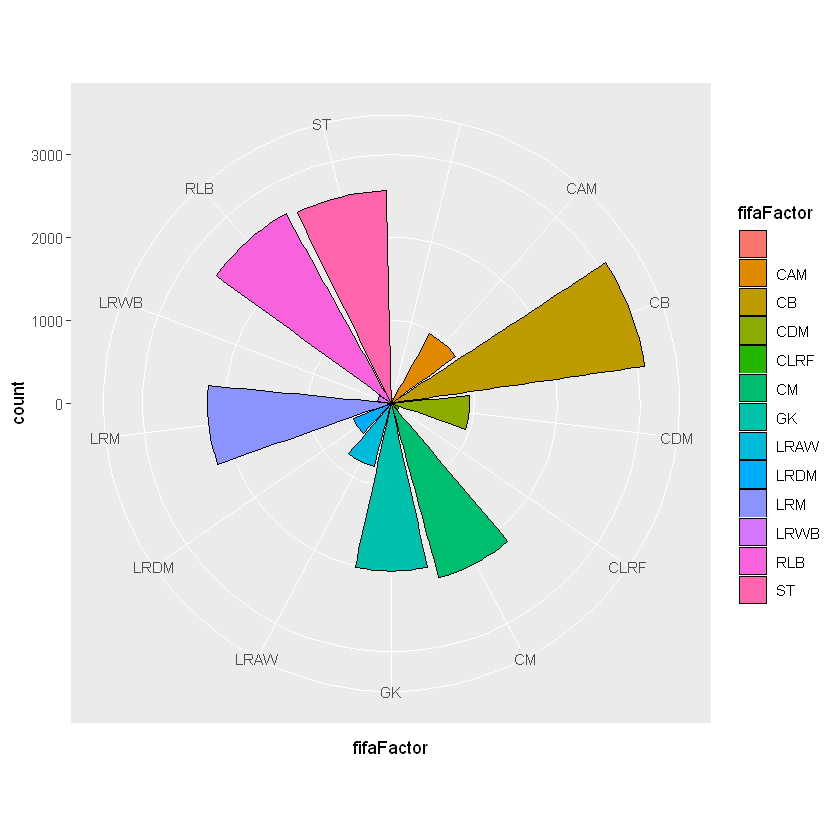

In [46]:
fifaFactor = factor(fifa$Position)
ggplot(data = fifaClean, aes(x = fifaFactor, fill=fifaFactor)) + geom_bar(colour= "black", size = 0.3 ) +  coord_polar()

<a id='Procesamiento'></a>

# Procesamiento de datos, entrenamiento y evaluación
---
[Inicio ▲](#Indice)

Se divide el dataset principal considerando las columnas más interesantes por posición. Para cada dataset se realiza el procesamiento de los datos, el entrenamiento y la evaluación de los algoritmos.

<a id='Dataset'></a>
# Creación de Datasets
[Inicio ▲](#Indice)

<a id='Goalkeepers'></a>
## Dataset para Goalkeepers

In [21]:
#Dataset para Goalkeepers
fifaGK <- fifaClean %>% filter(Position == "GK")%>% 
                   select(Age,Overall, Potential, GKDiving, GKHandling, GKKicking, GKPositioning,
                          GKReflexes, Reactions, International.Reputation, Value) 
head(fifaGK)
colSums(is.na(fifaGK))
fifaGKceroValue <- fifaGK %>% filter(fifaGK$Value == 0)

Age Overall Potential GKDiving GKHandling GKKicking GKPositioning GKReflexes
1 27  91      93        90       85         87        88            94        
2 25  90      93        86       92         78        88            89        
3 26  89      92        87       85         88        85            90        
4 26  89      90        85       91         72        86            88        
5 32  89      89        90       86         91        87            87        
6 31  88      88        88       84         68        83            92        
  Reactions International.Reputation Value   
1 90        4                        72000000
2 86        3                        68000000
3 85        3                        58000000
4 84        4                        53500000
5 84        5                        38000000
6 85        4                        36000000

Age                  Overall                Potential 
                       0                        0                        0 
                GKDiving               GKHandling                GKKicking 
                       0                        0                        0 
           GKPositioning               GKReflexes                Reactions 
                       0                        0                        0 
International.Reputation                    Value 
                       0                        0

Observamos si existen jugadores con Value = 0.

In [22]:
head(fifaGKceroValue)

Age Overall Potential GKDiving GKHandling GKKicking GKPositioning GKReflexes
1 26  79      81        80       73         65        77            85        
2 41  77      77        75       75         74        78            77        
3 32  73      73        68       70         65        77            77        
4 30  73      73        75       71         71        73            72        
5 22  72      72        71       70         62        70            72        
6 27  72      73        73       67         70        70            74        
  Reactions International.Reputation Value
1 76        1                        0    
2 73        2                        0    
3 69        1                        0    
4 70        1                        0    
5 73        1                        0    
6 68        1                        0

<a id='CentralDefenders'></a>
## Dataset para Central Defenders

In [24]:
#Dataset para Central Defenders
fifaCB <- fifaClean %>% filter(Position == "CB")%>% 
                   select(Age, Overall, Potential, Marking, StandingTackle, SlidingTackle,
                          HeadingAccuracy, Strength, Aggression, Interceptions, ShortPassing,
                          BallControl, Reactions, Jumping, International.Reputation, Value) 
head(fifaCB, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaCB))

Age Overall Potential Marking StandingTackle SlidingTackle HeadingAccuracy
1  32  91      91        87      92             91            91             
2  32  90      90        90      89             89            92             
3  33  89      89        93      93             90            83             
4  29  88      88        88      90             88            87             
5  33  88      88        88      89             85            81             
6  24  87      92        90      89             86            79             
7  27  87      90        91      88             86            81             
8  31  87      87        90      87             88            80             
9  31  87      87        91      86             84            83             
10 26  86      88        88      89             84            82             
11 25  86      91        87      88             87            83             
12 31  86      86        90      86             80            86             
13 29  86      87        90      91             86            82             
14 31  86      86        89      87             85            83             
15 23  85      92        92      88             82            80             
16 27  85      87        86      87             89            80             
17 30  85      85        83      85             84            85             
18 29  85      85        84      87             87            85             
19 35  85      85        86      88             85            94             
20 33  85      85        90      90             85            80             
   Strength Aggression Interceptions ShortPassing BallControl Reactions Jumping
1  83       88         90            78           84          85        93     
2  88       89         88            79           76          85        91     
3  89       92         88            59           57          82        89     
4  84       69         92            81           81          87        68     
5  82       76         89            80           80          82        90     
6  84       81         87            81           77          82        89     
7  94       87         88            66           60          80        81     
8  79       84         89            79           76          84        85     
9  83       72         88            81           78          84        74     
10 92       81         86            76           73          85        85     
11 84       77         82            75           77          83        79     
12 83       82         90            77           75          84        85     
13 79       80         87            79           74          86        84     
14 91       86         86            65           64          82        85     
15 83       86         86            70           67          81        78     
16 82       86         86            60           65          85        86     
17 80       91         84            75           70          79        92     
18 91       81         81            75           70          82        74     
19 83       72         83            76           68          85        45     
20 79       83         85            70           73          81        82     
   International.Reputation Value   
1  4                        51000000
2  3                        44000000
3  4                        27000000
4  4                        46000000
5  4                        24000000
6  3                        57000000
7  3                        51000000
8  3                        34000000
9  4                        34000000
10 3                        44500000
11 3                        50000000
12 3                        30000000
13 3                        39000000
14 3                        30000000
15 1                        46500000
16 3                        37500000
17 3                        28500000
18 4               

Age                  Overall                Potential 
                       0                        0                        0 
                 Marking           StandingTackle            SlidingTackle 
                       0                        0                        0 
         HeadingAccuracy                 Strength               Aggression 
                       0                        0                        0 
           Interceptions             ShortPassing              BallControl 
                       0                        0                        0 
               Reactions                  Jumping International.Reputation 
                       0                        0                        0 
                   Value 
                       0

<a id='Right/LeftBacks'></a>
## Dataset para Right/Left Backs

In [25]:
#Dataset para Right/Left Backs
fifaRLB <- fifaClean %>% filter(Position == "RLB")%>% 
                   select(Age, Overall, Potential, Marking, StandingTackle, SlidingTackle, 
                          HeadingAccuracy, Aggression, Interceptions, ShortPassing, BallControl, 
                          Reactions, Stamina, Crossing, SprintSpeed, International.Reputation, Value) 
head(fifaRLB, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaRLB))

Age Overall Potential Marking StandingTackle SlidingTackle HeadingAccuracy
1  30  88      88        71      85             86            75             
2  29  87      87        72      84             85            70             
3  27  86      86        81      84             84            76             
4  28  86      86        88      90             86            76             
5  26  85      87        80      82             80            75             
6  32  85      85        78      84             86            72             
7  25  84      87        80      81             79            74             
8  26  84      87        83      83             85            70             
9  28  84      84        78      84             83            74             
10 26  83      86        75      83             83            72             
11 27  83      84        79      82             79            83             
12 29  83      83        88      86             82            78             
13 22  82      88        76      83             86            83             
14 24  82      87        80      81             78            63             
15 24  82      88        79      79             79            64             
16 27  82      83        76      79             78            72             
17 27  82      82        83      82             84            76             
18 27  82      82        77      82             79            73             
19 32  82      82        81      82             81            80             
20 35  82      82        72      79             82            72             
   Aggression Interceptions ShortPassing BallControl Reactions Stamina Crossing
1  84         85            84           92          88        91      90      
2  75         84            84           84          83        91      87      
3  82         82            81           81          84        92      84      
4  82         89            81           77          88        87      81      
5  69         84            82           83          84        87      81      
6  81         84            80           83          85        89      86      
7  78         80            83           82          83        92      89      
8  81         83            81           83          82        84      83      
9  78         81            78           78          83        89      81      
10 68         81            86           83          80        85      85      
11 75         79            84           83          84        90      85      
12 79         86            79           75          83        86      69      
13 86         81            80           79          80        82      78      
14 78         80            76           78          81        89      86      
15 73         77            78           83          82        89      85      
16 79         78            77           79          80        90      77      
17 77         78            78           79          80        87      76      
18 70         79            79           80          81        88      91      
19 85         81            77           76          84        84      91      
20 78         79            81           86          77        74      85      
   SprintSpeed International.Reputation Value   
1  82          4                        43000000
2  93          3                        38000000
3  86          3                        36500000
4  76          3                        35000000
5  86          4                        38000000
6  75          3                        21500000
7  85          3                        32000000
8  84          3                        31500000
9  93          3                        24500000
10 79          3                        26500000
11 76          2                        24000000
12 67          3                        20000000
13 84          1                        25500000

Age                  Overall                Potential 
                       0                        0                        0 
                 Marking           StandingTackle            SlidingTackle 
                       0                        0                        0 
         HeadingAccuracy               Aggression            Interceptions 
                       0                        0                        0 
            ShortPassing              BallControl                Reactions 
                       0                        0                        0 
                 Stamina                 Crossing              SprintSpeed 
                       0                        0                        0 
International.Reputation                    Value 
                       0                        0

<a id='Right/LeftWingerBacks'></a>
## Dataset para Right/Left Winger Backs

In [27]:
#Dataset para Right/Left Winger Backs
fifaLRWB <- fifaClean %>% filter(Position == "LRWB")%>% 
                   select(Age, Overall, Potential, Marking, StandingTackle, SlidingTackle, 
                          Dribbling, Interceptions, Agility, BallControl, Reactions, Stamina, 
                          Crossing, SprintSpeed, International.Reputation, Value) 
head(fifaLRWB, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaLRWB))

Age Overall Potential Marking StandingTackle SlidingTackle Dribbling
1  24  80      82        82      84             77            62       
2  26  80      81        72      79             76            76       
3  25  80      81        74      76             77            79       
4  29  80      80        78      84             82            79       
5  29  79      79        55      75             65            76       
6  24  79      83        77      79             82            73       
7  28  79      79        76      79             79            74       
8  30  79      79        70      72             68            81       
9  20  78      86        76      81             80            80       
10 25  78      81        67      78             79            78       
11 24  78      81        69      74             75            73       
12 26  77      78        73      73             73            79       
13 25  77      81        72      77             75            76       
14 26  77      78        63      68             71            78       
15 29  77      77        74      79             78            73       
16 28  76      76        73      77             76            71       
17 30  76      76        68      77             75            77       
18 31  76      76        70      80             79            62       
19 29  76      76        68      75             75            74       
20 26  75      77        75      71             76            65       
   Interceptions Agility BallControl Reactions Stamina Crossing SprintSpeed
1  80            55      72          79        74      68       69         
2  72            66      77          82        86      86       78         
3  74            76      78          78        79      83       86         
4  80            73      78          80        77      82       75         
5  74            71      80          72        69      73       60         
6  80            72      76          71        83      77       78         
7  81            67      77          80        82      79       77         
8  76            76      80          79        85      83       78         
9  69            82      81          64        74      79       86         
10 72            74      79          70        70      79       90         
11 69            77      78          79        85      91       85         
12 76            67      77          77        79      76       80         
13 72            79      75          74        85      75       82         
14 66            74      76          74        74      80       78         
15 74            65      74          76        79      81       76         
16 75            76      75          77        80      72       80         
17 71            79      80          75        79      76       74         
18 77            67      75          76        77      77       71         
19 79            68      74          75        78      82       66         
20 75            72      71          72        79      75       76         
   International.Reputation Value   
1  2                        15500000
2  2                        14000000
3  1                        14500000
4  2                        11000000
5  1                        12000000
6  2                        13500000
7  3                        10000000
8  2                         9000000
9  1                        13000000
10 1                        10500000
11 1                        11000000
12 1                         8500000
13 1                         9500000
14 1                        10500000
15 2                         6500000
16 2                         6000000
17 1                         5500000
18 1                         5000000
19 2                         6000000
20 2                         6500000

Age                  Overall                Potential 
                       0                        0                        0 
                 Marking           StandingTackle            SlidingTackle 
                       0                        0                        0 
               Dribbling            Interceptions                  Agility 
                       0                        0                        0 
             BallControl                Reactions                  Stamina 
                       0                        0                        0 
                Crossing              SprintSpeed International.Reputation 
                       0                        0                        0 
                   Value 
                       0

<a id='CenterDefenderMidfielders'></a>
## Dataset para Center Defender Midfielders

In [28]:
#Dataset para Center Defender Midfielders
fifaCDM <- fifaClean %>% filter(Position == "CDM")%>% 
                   select(Age, Overall, Potential, ShortPassing, StandingTackle, LongPassing, 
                          Vision, Interceptions, Marking, BallControl, Reactions, Stamina, 
                          Aggression, Strength, International.Reputation, Value) 
head(fifaCDM, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaCDM))

Age Overall Potential ShortPassing StandingTackle LongPassing Vision
1  29  89      89        89           86             82          87    
2  26  88      90        85           90             82          77    
3  28  86      86        89           74             85          88    
4  33  86      86        85           85             81          75    
5  24  84      88        83           86             78          75    
6  26  84      86        84           85             86          83    
7  29  84      84        84           84             83          73    
8  30  84      84        88           69             87          88    
9  26  83      86        82           84             79          73    
10 28  83      83        87           84             84          79    
11 29  83      83        77           86             74          75    
12 25  82      88        85           83             79          73    
13 29  82      82        79           80             77          77    
14 29  82      82        78           84             74          63    
15 32  82      82        86           78             82          80    
16 27  81      82        80           80             72          73    
17 34  80      80        78           81             75          73    
18 24  80      84        77           81             78          67    
19 29  80      80        82           78             82          78    
20 28  80      80        82           76             81          80    
   Interceptions Marking BallControl Reactions Stamina Aggression Strength
1  87            90      88          87        86      85         77      
2  87            88      78          84        87      87         89      
3  78            75      89          84        78      70         66      
4  88            85      82          86        79      87         76      
5  84            83      82          83        92      85         79      
6  84            84      79          75        84      75         90      
7  86            83      79          83        84      80         85      
8  76            75      86          77        74      73         67      
9  84            83      78          76        83      85         89      
10 83            75      84          83        79      86         81      
11 87            85      74          83        74      90         84      
12 79            80      81          77        87      76         81      
13 84            81      81          81        86      87         92      
14 85            82      72          78        90      91         78      
15 82            80      84          80        75      83         65      
16 81            80      81          85        93      78         69      
17 79            80      77          78        89      81         71      
18 81            82      70          78        78      91         89      
19 80            79      80          78        79      76         71      
20 82            81      82          83        77      58         66      
   International.Reputation Value   
1  4                        51500000
2  3                        59500000
3  3                        44000000
4  3                        18000000
5  3                        34000000
6  3                        31500000
7  3                        24000000
8  3                        29000000
9  3                        27000000
10 3                        21000000
11 3                        20000000
12 1                        25500000
13 2                        17000000
14 2                        17000000
15 3                        12500000
16 2                        17000000
17 1                         4500000
18 2                        16500000
19 2                        11500000
20 2                        12000000

Age                  Overall                Potential 
                       0                        0                        0 
            ShortPassing           StandingTackle              LongPassing 
                       0                        0                        0 
                  Vision            Interceptions                  Marking 
                       0                        0                        0 
             BallControl                Reactions                  Stamina 
                       0                        0                        0 
              Aggression                 Strength International.Reputation 
                       0                        0                        0 
                   Value 
                       0

<a id='CentralMidfielders'></a>
## Dataset para Central Midfielders

In [29]:
#Dataset para Central Midfielders
fifaCM <- fifaClean %>% filter(Position == "CM")%>% 
                   select(Age, Overall, Potential, ShortPassing, StandingTackle, LongPassing, 
                          Vision, Interceptions, LongShots, BallControl, Reactions, Stamina, 
                          Dribbling, Positioning, International.Reputation, Value)  
head(fifaCM, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaCM))

Age Overall Potential ShortPassing StandingTackle LongPassing Vision
1  27  91      92        92           58             91          94    
2  32  91      91        93           76             88          92    
3  28  90      90        92           79             93          86    
4  32  90      90        93           53             87          92    
5  30  87      87        88           73             83          86    
6  30  87      87        87           74             90          86    
7  25  86      89        90           83             89          87    
8  27  86      86        90           63             87          86    
9  23  85      90        85           77             85          85    
10 23  85      88        85           81             80          79    
11 23  85      90        85           79             83          82    
12 29  85      85        90           68             87          86    
13 31  85      85        85           83             82          82    
14 23  84      88        85           66             82          86    
15 22  84      90        85           70             80          85    
16 26  84      87        89           78             87          87    
17 27  84      84        88           68             83          86    
18 29  84      84        89           79             79          79    
19 23  83      88        88           62             78          81    
20 23  83      88        84           78             86          80    
   Interceptions LongShots BallControl Reactions Stamina Dribbling Positioning
1  61            91        91          91        90      86        87         
2  83            82        93          90        89      90        79         
3  82            92        90          89        75      81        79         
4  50            75        94          90        78      89        89         
5  72            83        87          88        84      86        88         
6  75            90        87          77        84      84        79         
7  84            58        88          85        77      90        71         
8  78            79        90          84        75      90        79         
9  78            80        87          80        85      86        79         
10 79            69        85          85        85      80        80         
11 78            79        85          82        86      83        82         
12 81            82        84          78        78      78        81         
13 86            78        84          87        78      81        79         
14 70            88        85          84        89      83        79         
15 74            80        85          85        90      83        86         
16 78            62        85          83        79      82        72         
17 77            73        86          85        69      85        79         
18 80            74        84          84        86      78        75         
19 75            73        88          82        82      88        74         
20 76            81        81          83        87      77        79         
   International.Reputation Value   
1  4                        1.02e+08
2  4                        6.70e+07
3  4                        7.65e+07
4  4                        6.00e+07
5  3                        4.65e+07
6  4                        4.65e+07
7  3                        5.50e+07
8  3                        4.55e+07
9  2                        5.05e+07
10 3                        4.05e+07
11 3                        5.05e+07
12 2                        3.70e+07
13 3                        3.30e+07
14 2                        4.05e+07
15 3                        4.25e+07
16 2                        3.80e+07
17 3                        3.20e+07
18 3                        2.40e+07
19 2                        3.40e+07
20 2                        3.40e+07

Age                  Overall                Potential 
                       0                        0                        0 
            ShortPassing           StandingTackle              LongPassing 
                       0                        0                        0 
                  Vision            Interceptions                LongShots 
                       0                        0                        0 
             BallControl                Reactions                  Stamina 
                       0                        0                        0 
               Dribbling              Positioning International.Reputation 
                       0                        0                        0 
                   Value 
                       0

<a id='Left/RightCentralMidfielders'></a>
## Dataset para Left/Right Central Midfielders

In [31]:
#Dataset para Left/Right Central Midfielders
fifaLRDM <- fifaClean %>% filter(Position == "LRDM")%>% 
                   select(Age, Overall, Potential, ShortPassing, StandingTackle, LongPassing, Vision, 
                          Interceptions, LongShots, BallControl, Reactions, Stamina, Dribbling, Positioning, 
                          International.Reputation, Value)  
head(fifaLRDM, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaLRDM))

Age Overall Potential ShortPassing StandingTackle LongPassing Vision
1  27  89      90        86           91             81          79    
2  25  87      91        86           70             90          87    
3  29  85      85        84           81             80          78    
4  24  84      89        81           87             78          51    
5  28  84      84        86           83             82          86    
6  28  83      83        80           89             72          67    
7  31  83      83        82           82             81          81    
8  34  83      83        81           82             80          71    
9  33  82      82        80           80             83          78    
10 21  81      89        87           73             82          85    
11 26  81      82        86           73             84          83    
12 25  81      84        83           77             83          80    
13 25  81      85        82           83             74          76    
14 25  81      84        85           72             85          81    
15 29  81      81        84           71             83          81    
16 21  80      85        74           84             70          67    
17 24  80      85        82           75             81          81    
18 23  80      85        80           73             84          82    
19 28  80      80        81           79             77          69    
20 32  80      80        81           76             80          81    
   Interceptions LongShots BallControl Reactions Stamina Dribbling Positioning
1  92            69        80          93        96      79        71         
2  66            81        90          81        88      87        81         
3  81            80        84          84        92      82        84         
4  84            35        76          81        75      59        46         
5  87            76        83          84        77      78        79         
6  87            66        79          81        89      75        67         
7  87            66        78          82        80      77        66         
8  87            72        77          80        74      64        55         
9  80            86        79          82        88      75        82         
10 78            55        88          83        74      86        63         
11 74            76        84          75        75      78        73         
12 81            81        83          77        84      81        69         
13 82            75        80          74        93      78        73         
14 71            80        80          77        80      70        77         
15 74            75        82          76        87      75        75         
16 84            74        75          79        92      74        67         
17 74            71        78          77        76      80        74         
18 77            73        79          80        79      77        77         
19 82            70        78          78        82      64        54         
20 77            73        81          80        75      78        78         
   International.Reputation Value   
1  3                        63000000
2  4                        64000000
3  3                        37000000
4  3                        35500000
5  2                        31000000
6  2                        21000000
7  3                        17500000
8  3                         8000000
9  2                         9000000
10 1                        26000000
11 2                        20500000
12 2                        18500000
13 2                        19500000
14 3                        22000000
15 2                        17000000
16 1                        17000000
17 3                        19500000
18 2                        19500000
19 1                        12000000
20 2                        11000000

Age                  Overall                Potential 
                       0                        0                        0 
            ShortPassing           StandingTackle              LongPassing 
                       0                        0                        0 
                  Vision            Interceptions                LongShots 
                       0                        0                        0 
             BallControl                Reactions                  Stamina 
                       0                        0                        0 
               Dribbling              Positioning International.Reputation 
                       0                        0                        0 
                   Value 
                       0

<a id='CentralAttackingMidfielders'></a>
## Dataset para Central Attacking Midfielders

In [32]:
#Dataset para Central Attacking Midfielders
fifaCAM <- fifaClean %>% filter(Position == "CAM")%>% 
                   select(Age, Overall, Potential, ShortPassing, Agility, Acceleration, Vision, 
                          Finishing, LongShots, BallControl, Reactions, ShotPower, Dribbling, 
                          Positioning, International.Reputation, Value)  
head(fifaCAM, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaCAM))

Age Overall Potential ShortPassing Agility Acceleration Vision Finishing
1  27  89      90        83           90      88           83     90       
2  26  88      91        91           79      75           91     80       
3  26  86      87        86           80      78           85     87       
4  28  86      86        83           75      73           85     87       
5  29  86      86        89           79      72           91     73       
6  24  85      89        83           90      79           81     82       
7  31  85      85        83           74      60           80     75       
8  30  85      85        84           76      78           76     75       
9  31  84      84        84           79      75           87     78       
10 24  83      90        81           76      77           81     80       
11 28  83      83        82           85      85           80     79       
12 25  82      83        78           86      84           82     78       
13 25  82      87        86           80      71           81     73       
14 29  82      82        86           79      69           87     73       
15 27  82      83        84           73      64           79     74       
16 28  82      82        84           68      58           86     77       
17 30  82      82        81           87      84           82     71       
18 27  82      82        84           80      77           78     70       
19 30  81      81        79           89      86           80     72       
20 22  81      86        84           79      71           86     77       
   LongShots BallControl Reactions ShotPower Dribbling Positioning
1  82        90          90        80        88        91         
2  89        91          88        84        84        83         
3  76        88          86        81        87        87         
4  80        82          91        78        75        92         
5  75        90          84        70        84        83         
6  82        89          80        84        90        81         
7  85        82          84        86        76        80         
8  86        85          87        84        80        86         
9  82        90          75        80        86        79         
10 88        84          79        84        82        86         
11 76        84          81        78        84        81         
12 80        83          83        80        83        86         
13 82        84          79        79        87        77         
14 76        86          78        78        87        78         
15 74        82          81        81        81        84         
16 86        85          78        83        80        79         
17 73        83          82        72        84        77         
18 71        84          82        76        84        79         
19 75        82          80        67        82        82         
20 80        81          76        75        81        77         
   International.Reputation Value   
1  4                        78000000
2  3                        73500000
3  3                        53000000
4  4                        45000000
5  4                        43500000
6  3                        50000000
7  4                        26000000
8  3                        35500000
9  3                        27500000
10 2                        36500000
11 2                        26000000
12 2                        26500000
13 2                        29500000
14 3                        21500000
15 3                        25000000
16 3                        22500000
17 3                        21000000
18 3                        23000000
19 1                        17000000
20 1                        24000000

Age                  Overall                Potential 
                       0                        0                        0 
            ShortPassing                  Agility             Acceleration 
                       0                        0                        0 
                  Vision                Finishing                LongShots 
                       0                        0                        0 
             BallControl                Reactions                ShotPower 
                       0                        0                        0 
               Dribbling              Positioning International.Reputation 
                       0                        0                        0 
                   Value 
                       0

<a id='Left/RightMidfielders'></a>
## Dataset para Left/Right Midfielders

In [33]:
#Dataset para Left/Right Midfielders
fifaLRM <- fifaClean %>% filter(Position == "LRM")%>% 
                   select(Age, Overall, Potential, Crossing, ShortPassing, Agility, Acceleration, 
                          Vision, SprintSpeed, LongPassing, BallControl, Reactions, Dribbling, 
                          Stamina, Positioning, International.Reputation, Value)  
head(fifaLRM, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaLRM))

Age Overall Potential Crossing ShortPassing Agility Acceleration Vision
1  19  88      95        77       82           92      96           82    
2  26  88      89        78       82           91      94           82    
3  29  88      88        77       77           76      93           77    
4  26  86      87        73       79           91      95           82    
5  27  86      86        84       84           93      97           84    
6  29  86      86        79       86           86      86           86    
7  26  85      86        86       90           74      71           87    
8  28  85      85        79       79           92      87           79    
9  29  85      85        83       81           78      84           79    
10 31  85      85        75       83           83      79           76    
11 25  84      87        83       83           86      87           80    
12 25  84      85        78       79           82      88           80    
13 31  84      84        82       80           85      88           78    
14 30  84      84        83       82           92      85           82    
15 34  84      84        92       79           91      84           84    
16 34  84      84        80       82           87      83           80    
17 22  83      89        83       84           87      86           85    
18 22  83      87        81       77           87      95           75    
19 26  83      84        79       78           87      90           81    
20 24  83      86        78       77           88      89           71    
   SprintSpeed LongPassing BallControl Reactions Dribbling Stamina Positioning
1  96          73          91          87        90        83      88         
2  91          72          88          91        89        84      90         
3  95          64          82          87        79        76      90         
4  93          71          86          86        87        84      87         
5  93          68          91          84        92        78      76         
6  85          75          86          87        87        73      88         
7  68          89          86          85        82        90      84         
8  75          72          86          84        93        85      83         
9  88          77          85          81        84        89      85         
10 77          77          79          84        78        94      72         
11 80          76          86          83        85        83      83         
12 87          64          85          84        88        85      85         
13 89          51          85          82        82        91      88         
14 84          79          85          80        86        73      82         
15 82          75          88          78        89        65      78         
16 76          71          88          85        89        64      84         
17 84          75          86          80        85        79      77         
18 93          63          83          81        88        76      79         
19 91          73          82          82        84        83      79         
20 87          71          87          83        88        74      81         
   International.Reputation Value   
1  3                        81000000
2  3                        69500000
3  3                        59000000
4  3                        52000000
5  3                        46500000
6  4                        43500000
7  3                        45000000
8  3                        39000000
9  3                        37500000
10 3                        26000000
11 2                        39000000
12 3                        37000000
13 3                        27500000
14 4                        29500000
15 3                        15500000
16 4                        15500000
17 3                        35500000
18 2                        34000000
19 2                        30500000
20 3                        3

Age                  Overall                Potential 
                       0                        0                        0 
                Crossing             ShortPassing                  Agility 
                       0                        0                        0 
            Acceleration                   Vision              SprintSpeed 
                       0                        0                        0 
             LongPassing              BallControl                Reactions 
                       0                        0                        0 
               Dribbling                  Stamina              Positioning 
                       0                        0                        0 
International.Reputation                    Value 
                       0                        0

<a id='Left/RightAttackingWingers'></a>
## Dataset para Left/Right Attacking Wingers

In [34]:
#Dataset para Left/Right Attacking Wingers
fifaLRAW <- fifaClean %>% filter(Position == "LRAW")%>% 
                   select(Age, Overall, Potential, Crossing, ShortPassing, HeadingAccuracy, Acceleration, 
                          Vision, SprintSpeed, ShotPower, BallControl, Reactions, Dribbling, LongShots, 
                          Positioning, International.Reputation, Value)  
head(fifaLRAW, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaLRAW))

Age Overall Potential Crossing ShortPassing HeadingAccuracy Acceleration
1  26  92      93        79       84           62              94          
2  26  88      89        90       89           62              73          
3  27  88      88        86       85           56              94          
4  26  88      91        75       89           55              75          
5  26  88      89        79       88           48              89          
6  22  86      92        83       79           72              93          
7  23  86      91        85       85           51              84          
8  23  86      89        77       84           38              95          
9  22  85      92        82       83           50              85          
10 27  85      85        81       82           48              88          
11 29  85      85        77       77           73              86          
12 22  84      90        76       77           69              88          
13 30  84      84        80       80           58              89          
14 29  84      84        76       80           31              91          
15 21  83      92        78       78           43              93          
16 26  83      83        83       83           64              88          
17 22  83      87        69       77           76              93          
18 25  83      86        84       86           53              76          
19 27  83      83        86       83           52              84          
20 24  83      86        84       86           50              83          
   Vision SprintSpeed ShotPower BallControl Reactions Dribbling LongShots
1  87     90          80        95          94        96        82       
2  89     67          86        90          85        85        92       
3  87     86          75        93          83        90        84       
4  89     69          69        95          77        94        87       
5  90     75          83        92          83        91        93       
6  82     96          86        85          81        88        78       
7  86     74          70        91          82        92        72       
8  77     92          73        87          87        88        73       
9  84     82          86        85          82        86        88       
10 81     83          79        90          77        91        81       
11 82     79          84        86          83        87        81       
12 73     89          84        86          81        87        80       
13 76     93          84        85          80        90        80       
14 83     86          79        84          82        88        81       
15 84     92          83        83          82        90        70       
16 83     87          82        83          84        85        78       
17 61     93          74        84          86        83        67       
18 88     74          80        83          82        83        75       
19 83     79          82        83          85        82        80       
20 84     77          78        89          78        88        87       
   Positioning International.Reputation Value    
1  89          5                        118500000
2  80          4                         69500000
3  83          3                         62000000
4  78          3                         73500000
5  84          3                         69500000
6  84          2                         61000000
7  83          2                         59500000
8  87          3                         56500000
9  82          3                         54000000
10 80          3                         40500000
11 84          4                         37500000
12 83          3                         42500000
13 78          3                         29500000
14 80          3                         30500000
15 79          3                         40000000
16 82          1                         28000000
17 

Age                  Overall                Potential 
                       0                        0                        0 
                Crossing             ShortPassing          HeadingAccuracy 
                       0                        0                        0 
            Acceleration                   Vision              SprintSpeed 
                       0                        0                        0 
               ShotPower              BallControl                Reactions 
                       0                        0                        0 
               Dribbling                LongShots              Positioning 
                       0                        0                        0 
International.Reputation                    Value 
                       0                        0

<a id='Center/Left/RightForwarders'></a>
## Dataset para Center/Left/Right Forwarders

In [35]:
#Dataset para Center/Left/Right Forwarders
fifaCLRF <- fifaClean %>% filter(Position == "CLRF")%>% 
                   select(Age, Overall, Potential, Finishing, ShortPassing, HeadingAccuracy, 
                          Acceleration, Vision, SprintSpeed, ShotPower, BallControl, Reactions, 
                          Dribbling, LongShots, Positioning, International.Reputation, Value)  
head(fifaCLRF, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaCLRF))

Age Overall Potential Finishing ShortPassing HeadingAccuracy Acceleration
1  31  94      94        95        90           70              91          
2  27  91      91        84        89           61              94          
3  24  89      94        84        87           68              87          
4  31  87      87        86        82           35              93          
5  34  86      86        70        90           54              70          
6  25  82      85        80        88           49              77          
7  28  82      82        78        84           41              86          
8  31  82      82        80        80           34              88          
9  24  81      88        88        63           78              69          
10 29  81      81        79        85           64              74          
11 33  81      81        78        83           63              74          
12 32  80      80        80        79           70              62          
13 27  79      80        77        81           76              80          
14 33  78      78        77        76           66              76          
15 24  76      81        78        71           66              77          
16 28  76      76        72        74           73              77          
17 24  76      79        72        78           63              61          
18 30  76      76        69        76           66              76          
19 26  76      77        70        73           52              85          
20 32  75      75        70        74           73              75          
   Vision SprintSpeed ShotPower BallControl Reactions Dribbling LongShots
1  94     86          85        96          95        97        94       
2  89     88          82        94          90        95        80       
3  87     83          82        92          86        92        88       
4  83     85          80        89          88        91        81       
5  93     67          65        92          86        90        71       
6  87     72          77        88          83        86        77       
7  84     76          70        82          81        84        79       
8  81     80          80        86          80        86        81       
9  60     74          85        78          75        74        82       
10 83     67          81        83          84        78        83       
11 81     66          77        85          82        87        74       
12 82     60          85        82          80        78        84       
13 77     77          76        81          76        78        74       
14 79     75          92        78          76        78        80       
15 71     75          66        78          76        82        64       
16 78     76          70        76          78        78        69       
17 77     58          86        81          71        84        84       
18 74     78          79        77          76        75        79       
19 72     83          82        77          70        78        74       
20 69     61          76        78          83        77        66       
   Positioning International.Reputation Value    
1  94          5                        110500000
2  87          4                         93000000
3  84          3                         89000000
4  87          3                         45000000
5  81          4                         21500000
6  81          2                         28500000
7  72          2                         22500000
8  82          2                         20000000
9  81          3                         25500000
10 84          2                         18000000
11 82          2                         11000000
12 84          2                         11500000
13 83          2                         14500000
14 75          3                          6500000
15 80          1                         10500000
16 77          1                

Age                  Overall                Potential 
                       0                        0                        0 
               Finishing             ShortPassing          HeadingAccuracy 
                       0                        0                        0 
            Acceleration                   Vision              SprintSpeed 
                       0                        0                        0 
               ShotPower              BallControl                Reactions 
                       0                        0                        0 
               Dribbling                LongShots              Positioning 
                       0                        0                        0 
International.Reputation                    Value 
                       0                        0

<a id='Strikers'></a>
## Dataset para Strikers

In [36]:
#Dataset para Strikers
fifaST <- fifaClean %>% filter(Position == "ST")%>% 
                   select(Age, Overall, Potential, Finishing, Strength, HeadingAccuracy, Acceleration, 
                          Volleys, SprintSpeed, ShotPower, BallControl, Reactions, Dribbling, LongShots, 
                          Positioning, International.Reputation, Value)  
head(fifaST, 20)

#Verificamos que no existan variables con campos NA
colSums(is.na(fifaST))

Age Overall Potential Finishing Strength HeadingAccuracy Acceleration
1  33  94      94        94        79       89              89          
2  31  91      91        93        83       77              86          
3  29  90      90        91        84       85              77          
4  24  89      91        94        84       85              68          
5  31  89      89        89        78       89              75          
6  30  89      89        93        73       77              88          
7  28  88      88        86        80       84              94          
8  30  88      88        92        85       80              73          
9  25  87      90        91        76       91              77          
10 25  87      89        87        94       86              77          
11 28  87      87        90        76       81              78          
12 27  85      86        88        73       73              81          
13 32  85      85        89        80       84              65          
14 29  85      85        87        92       82              74          
15 30  85      85        81        80       80              76          
16 36  85      85        86        86       83              58          
17 24  84      89        79        80       65              87          
18 30  84      84        88        60       78              85          
19 32  84      84        84        85       90              67          
20 34  84      84        88        63       84              65          
   Volleys SprintSpeed ShotPower BallControl Reactions Dribbling LongShots
1  87      91          95        94          96        88        93       
2  88      75          86        90          92        87        85       
3  89      78          88        89          90        85        84       
4  84      72          88        84          91        80        85       
5  90      76          87        82          91        80        79       
6  85      80          88        89          90        89        83       
7  85      95          92        85          85        87        91       
8  90      73          86        85          86        84        80       
9  85      78          84        81          88        77        70       
10 79      90          88        72          86        80        74       
11 87      85          86        83          87        83        80       
12 81      84          83        83          85        85        75       
13 77      66          86        84          83        76        79       
14 81      76          83        83          85        77        74       
15 82      76          81        86          83        83        75       
16 86      59          90        84          82        79        82       
17 74      87          87        85          79        85        81       
18 83      78          79        85          85        86        82       
19 86      73          80        77          86        76        60       
20 85      64          84        88          85        84        85       
   Positioning International.Reputation Value   
1  95          5                        77000000
2  92          5                        80000000
3  91          4                        77000000
4  93          3                        83500000
5  93          4                        60000000
6  92          4                        64500000
7  85          4                        60000000
8  92          4                        57000000
9  92          3                        64500000
10 89          3                        62500000
11 91          3                        52000000
12 86          3                        45000000
13 89          3                        30500000
14 87          4                        38500000
15 86          4                        37000000
16 85          5                        14000000
17 83          3                        42000000
18 86        

Age                  Overall                Potential 
                       0                        0                        0 
               Finishing                 Strength          HeadingAccuracy 
                       0                        0                        0 
            Acceleration                  Volleys              SprintSpeed 
                       0                        0                        0 
               ShotPower              BallControl                Reactions 
                       0                        0                        0 
               Dribbling                LongShots              Positioning 
                       0                        0                        0 
International.Reputation                    Value 
                       0                        0

<a id='GraficaImportancia'></a>
#### GRAFICAMOS PARA EVALUAR LA IMPORTANCIA DE LAS VARIABLES PARA CADA POSICIÓN

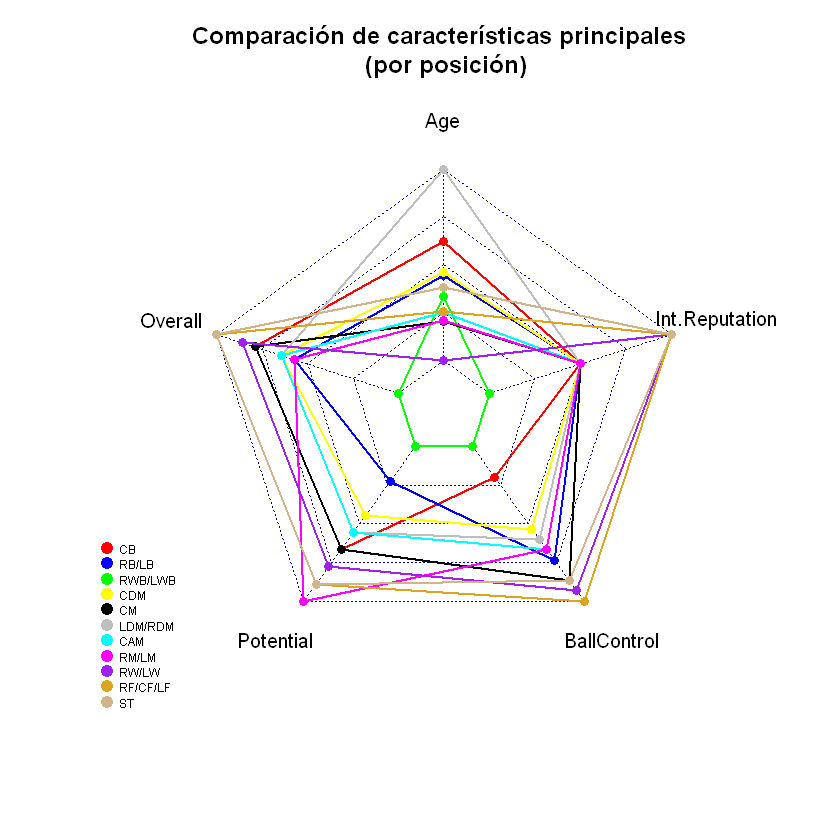

In [67]:
datFIFA <- data.frame(
 Age = c(mean(fifaCB$Age),mean(fifaRLB$Age), mean(fifaLRWB$Age),mean(fifaCDM$Age),mean(fifaCM$Age),mean(fifaLRDM$Age),mean(fifaCAM$Age),mean(fifaLRM$Age),mean(fifaLRAW$Age),mean(fifaCLRF$Age),mean(fifaST$Age)),
 Overall = c(max(fifaCB$Overall),max(fifaRLB$Overall), max(fifaLRWB$Overall),max(fifaCDM$Overall),max(fifaCM$Overall),max(fifaLRDM$Overall),max(fifaCAM$Overall),max(fifaLRM$Overall),max(fifaLRAW$Overall),max(fifaCLRF$Overall),max(fifaST$Overall)),
 Potential = c(max(fifaCB$Potential),max(fifaRLB$Potential), max(fifaLRWB$Potential),max(fifaCDM$Potential),max(fifaCM$Potential),max(fifaLRDM$Potential),max(fifaCAM$Potential),max(fifaLRM$Potential),max(fifaLRAW$Potential),max(fifaCLRF$Potential),max(fifaST$Potential)),
 BallControl = c(max(fifaCB$BallControl),max(fifaRLB$BallControl), max(fifaLRWB$BallControl),max(fifaCDM$BallControl),max(fifaCM$BallControl),max(fifaLRDM$BallControl),max(fifaCAM$BallControl),max(fifaLRM$BallControl),max(fifaLRAW$BallControl),max(fifaCLRF$BallControl),max(fifaST$BallControl)),
 Int.Reputation = c(max(fifaCB$International.Reputation),max(fifaRLB$International.Reputation), max(fifaLRWB$International.Reputation),max(fifaCDM$International.Reputation),max(fifaCM$International.Reputation),max(fifaLRDM$International.Reputation),max(fifaCAM$International.Reputation),max(fifaLRM$International.Reputation),max(fifaLRAW$International.Reputation),max(fifaCLRF$International.Reputation),max(fifaST$International.Reputation))
)
# Color vector
colors_border=c( "red", "blue" , "green","yellow","black" , "gray","cyan", "magenta", "purple", "goldenrod", "tan" )
colors_in=c( rgb(0.2,0.5,0.5,0.4), rgb(0.8,0.2,0.5,0.4) , rgb(0.7,0.5,0.1,0.4),rgb(0.2,0.5,0.5,0.4), 
            rgb(0.8,0.2,0.5,0.4) , rgb(0.7,0.5,0.1,0.4),rgb(0.2,0.5,0.5,0.4), rgb(0.8,0.2,0.5,0.4) )
rownames(datFIFA) <- c("CB","RB/LB","RWB/LWB","CDM","CM","LDM/RDM","CAM","RM/LM", "RW/LW", "RF/CF/LF", "ST")
radarchart(datFIFA, maxmin=FALSE, ,
#custom polygon
pcol=colors_border  , plwd=2 , plty=1,title="Comparación de características principales \n (por posición)",)
# Add a legend
legend("bottomleft", legend = rownames(datFIFA), bty = "n", pch=20 , col=colors_border , text.col = "black", cex=0.6, pt.cex=2)

<a id='AnalisisPorPosicion'></a>
## Comienzo del análisis de datos por posición

<a id='AlgoritmoGK'></a>
### PCA GOALKEEPERS

Principal Component Analysis es una técnica de extracción de características donde combinamos las entradas de una manera específica y podemos eliminar algunas de las variables ***menos importantes***.

In [68]:
#Aplicamos PCA al dataset de goleros todas las columnas menos "Name" y "Nationality" las cuales no fueron incluídas
names(fifaGK)
fifaGK.pca <- prcomp(fifaGK [c(1:11)], center = TRUE,scale. = TRUE)
summary(fifaGK.pca)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "GKDiving"                
 [5] "GKHandling"               "GKKicking"               
 [7] "GKPositioning"            "GKReflexes"              
 [9] "Reactions"                "International.Reputation"
[11] "Value"

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.6990 1.1459 0.93125 0.63222 0.58234 0.51687 0.46160
Proportion of Variance 0.6622 0.1194 0.07884 0.03634 0.03083 0.02429 0.01937
Cumulative Proportion  0.6622 0.7816 0.86044 0.89678 0.92761 0.95189 0.97126
                           PC8     PC9    PC10    PC11
Standard deviation     0.36294 0.30966 0.29512 0.03750
Proportion of Variance 0.01198 0.00872 0.00792 0.00013
Cumulative Proportion  0.98324 0.99195 0.99987 1.00000

Gracias al análisis de componente principal se puede concluir que las variables que más importantes son la edad ("Age") y puntaje ("Overall")

In [69]:
summary(fifaGK)

      Age           Overall       Potential       GKDiving       GKHandling   
 Min.   :16.00   Min.   :47.0   Min.   :48.0   Min.   :45.00   Min.   :43.00  
 1st Qu.:22.00   1st Qu.:59.0   1st Qu.:65.0   1st Qu.:60.00   1st Qu.:58.00  
 Median :25.00   Median :64.0   Median :69.0   Median :65.00   Median :63.00  
 Mean   :26.04   Mean   :64.6   Mean   :69.8   Mean   :65.32   Mean   :62.87  
 3rd Qu.:30.00   3rd Qu.:69.0   3rd Qu.:74.0   3rd Qu.:70.00   3rd Qu.:68.00  
 Max.   :45.00   Max.   :91.0   Max.   :93.0   Max.   :90.00   Max.   :92.00  
   GKKicking     GKPositioning     GKReflexes     Reactions    
 Min.   :35.00   Min.   :38.00   Min.   :44.0   Min.   :30.00  
 1st Qu.:56.00   1st Qu.:57.00   1st Qu.:60.0   1st Qu.:52.00  
 Median :61.00   Median :63.00   Median :66.0   Median :60.00  
 Mean   :61.48   Mean   :63.05   Mean   :66.1   Mean   :58.93  
 3rd Qu.:66.00   3rd Qu.:69.00   3rd Qu.:72.0   3rd Qu.:67.00  
 Max.   :91.00   Max.   :90.00   Max.   :94.0   Max.   :90.00  

<a id='AlgoritmoGK'></a>
#### Análisis de Goalkeeper

 Verificamos las dimensiones del dataset para Goalkeepers

In [70]:
dim(fifaGK)

[1] 2025   11

Para poder evaluar la capacidad predictiva de nuestro modelo y saber cuán próximas son sus predicciones a los verdaderos valores de la variable respuesta, necesitamos disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya “visto”, es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de prueba. El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, en nuestro caso  particionamos fifaGK en 80%-20% con el fin de obtener los dataframes de entrenamiento y de prueba que mencionamos anteriorimente.


In [71]:
set.seed(1500)
indexes_fifaGK <- createDataPartition(fifaGK$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaGK.train <- fifaGK[indexes_fifaGK,]
fifaGK.test <- fifaGK[-indexes_fifaGK,]

In [72]:
#Verificamos los subconjuntos train y test
names(fifaGK.train)
dim(fifaGK.train)

names(fifaGK.test)
dim(fifaGK.test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "GKDiving"                
 [5] "GKHandling"               "GKKicking"               
 [7] "GKPositioning"            "GKReflexes"              
 [9] "Reactions"                "International.Reputation"
[11] "Value"

[1] 1621   11

[1] "Age"                      "Overall"                 
 [3] "Potential"                "GKDiving"                
 [5] "GKHandling"               "GKKicking"               
 [7] "GKPositioning"            "GKReflexes"              
 [9] "Reactions"                "International.Reputation"
[11] "Value"

[1] 404  11

Verificamos que la suma de la cantidad de líneas de fifaGK.train y fifaGK.test es igual a la cantidad total de lineas de fifaGK

In [73]:
nrow(fifaGK.train) + nrow(fifaGK.test) == nrow(fifaGK)

[1] TRUE

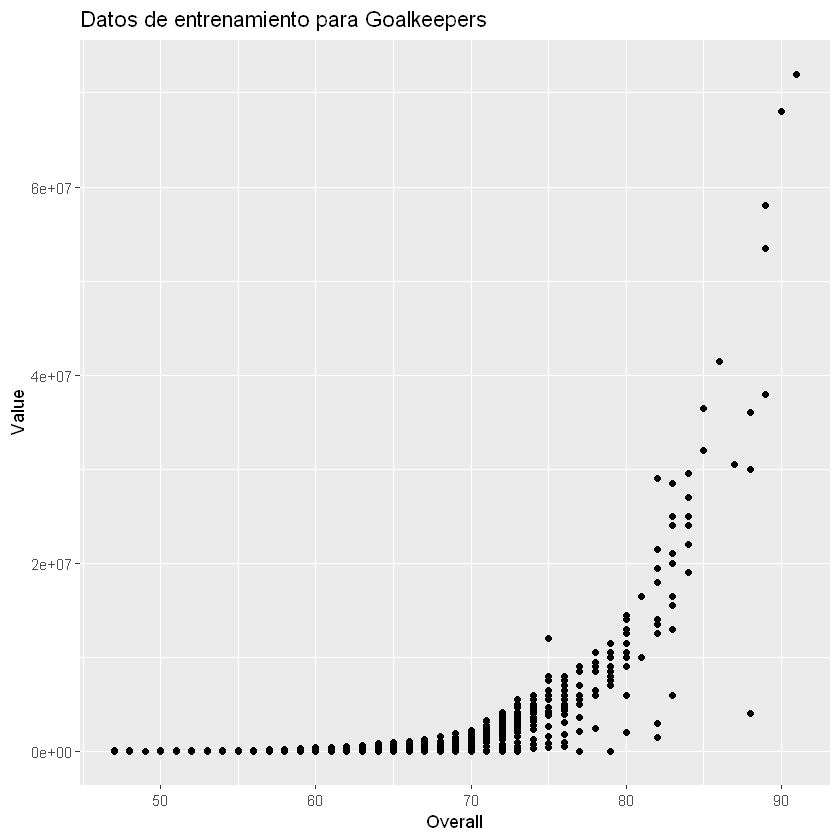

In [74]:
ggplot() + geom_point(data = fifaGK.train, aes(x = Overall, y = Value)) + 
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Datos de entrenamiento para Goalkeepers")

Realizamos una regresión lineal simple teniendo en cuenta el Overall

Empleando la función lm() se genera un modelo de regresión lineal por mínimos cuadrados en el que la variable respuesta es Value y el predictor Overall.

In [75]:
set.seed(1500)
regresor_fifaGK <- lm(Value ~ Overall, data = fifaGK.train)

La función lm() genera un objeto que almacena toda la información del modelo, para ver su contenido se emplea la función names() y para visualizar los principales parámetros del modelo generado se utiliza summary()

In [76]:
names (regresor_fifaGK)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [77]:
summary(regresor_fifaGK)


Call:
lm(formula = Value ~ Overall, data = fifaGK.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-6917011 -1805340  -684783   943413 60671318 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22126489     848985  -26.06   <2e-16 ***
Overall        367639      13036   28.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3998000 on 1619 degrees of freedom
Multiple R-squared:  0.3294,	Adjusted R-squared:  0.329 
F-statistic: 795.3 on 1 and 1619 DF,  p-value: < 2.2e-16


En la información devuelta por summary se observa que el p-value del estadístico F es muy pequeño, indicando que al menos uno de los predictores del modelo está significativamente relacionado con la variable respuesta.

In [78]:
str(fifaGK.train)

'data.frame':	1621 obs. of  11 variables:
 $ Age                     : int  27 25 26 26 32 31 33 40 31 24 ...
 $ Overall                 : int  91 90 89 89 89 88 88 88 87 86 ...
 $ Potential               : int  93 93 92 90 89 88 88 88 87 90 ...
 $ GKDiving                : int  90 86 87 85 90 88 87 88 90 85 ...
 $ GKHandling              : int  85 92 85 91 86 84 86 87 81 80 ...
 $ GKKicking               : int  87 78 88 72 91 68 69 74 75 91 ...
 $ GKPositioning           : int  88 88 85 86 87 83 89 90 82 82 ...
 $ GKReflexes              : int  94 89 90 88 87 92 89 83 90 87 ...
 $ Reactions               : int  90 86 85 84 84 85 83 79 84 86 ...
 $ International.Reputation: int  4 3 3 4 5 4 3 4 3 2 ...
 $ Value                   : num  72000000 68000000 58000000 53500000 38000000 36000000 30000000 4000000 30500000 41500000 ...


In [79]:
y_predict_fifaGK <- predict(regresor_fifaGK, fifaGK.train)

La estimación de todo coeficiente de regresión tiene asociado un error estándar, por lo tanto todo coeficiente de regresión tiene su correspondiente intervalo de confianza

In [80]:
confint(regresor_fifaGK)

2.5 %       97.5 %     
(Intercept) -23791713.9 -20461263.2
Overall        342069.8    393208.7

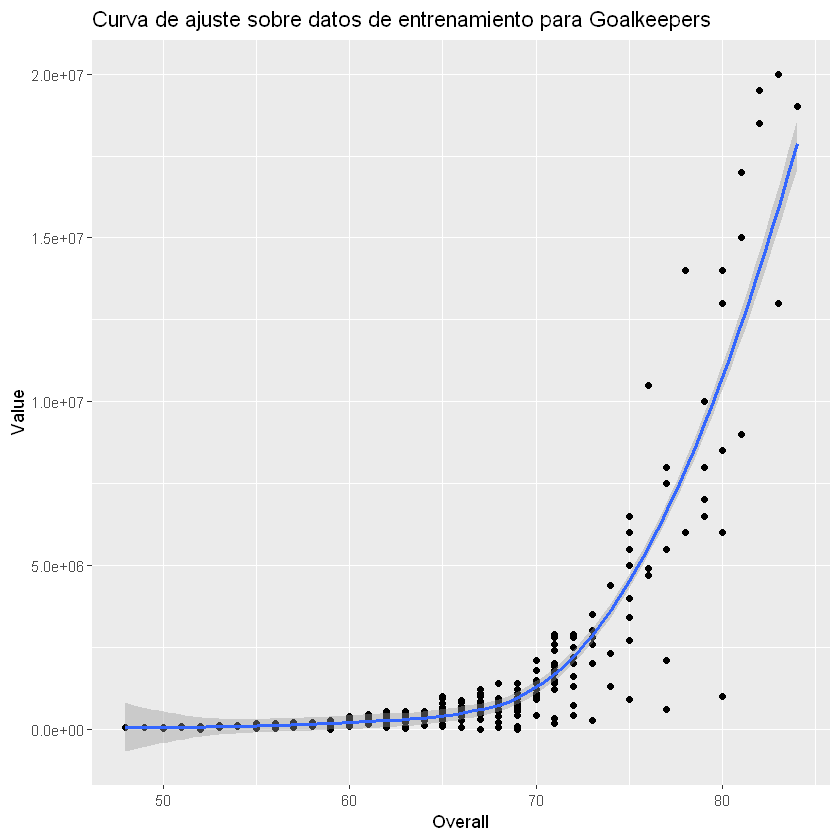

In [81]:
ggplot(fifaGK.test, aes(y=Value, x=Overall)) +  geom_point() + geom_smooth(method='loess') +
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Curva de ajuste sobre datos de entrenamiento para Goalkeepers")



In [82]:
y_test_predict_fifaGK <- predict(regresor_fifaGK, fifaGK.test)

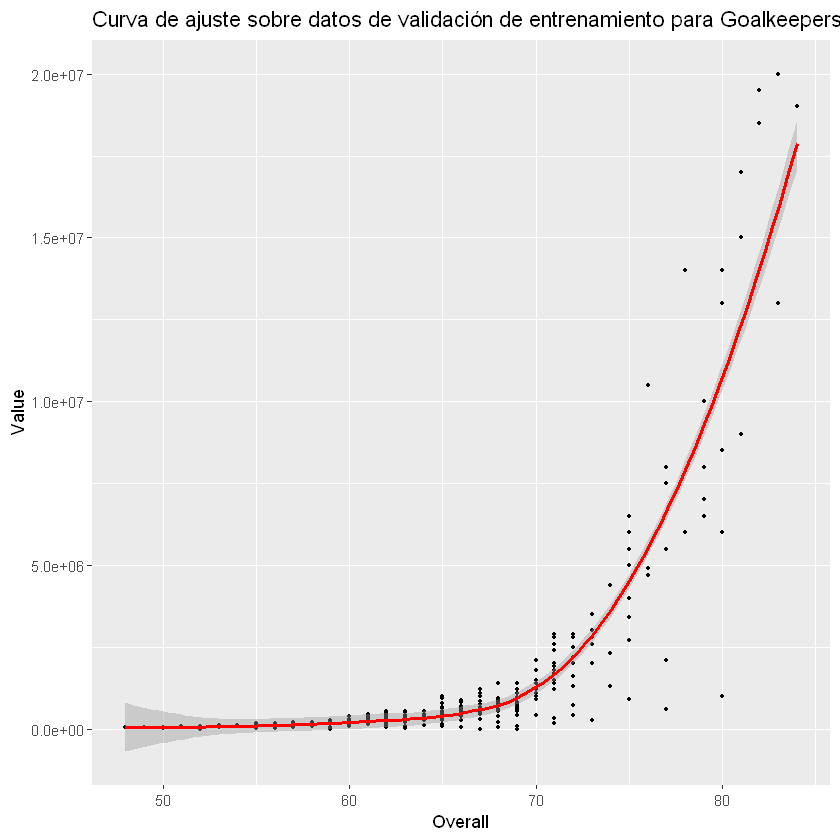

In [83]:
ggplot(fifaGK.test, aes(y=Value, x=Overall)) +  geom_point(size = 0.9) + geom_smooth(method='loess',color="red") +
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Curva de ajuste sobre datos de validación de entrenamiento para Goalkeepers")



Para verificar la relación entre nuestras variables cuantitativas, utilizamos la función "cor". La magnitud obtenida con la función va de 0 a 1 siendo 0 ninguna relación y 1 una relación perfectamente predictiva.

In [84]:
cor(fifaGK.test$Value, y_test_predict_fifaGK)
print (regresor_fifaGK)

[1] 0.6523319


Call:
lm(formula = Value ~ Overall, data = fifaGK.train)

Coefficients:
(Intercept)      Overall  
  -22126489       367639  



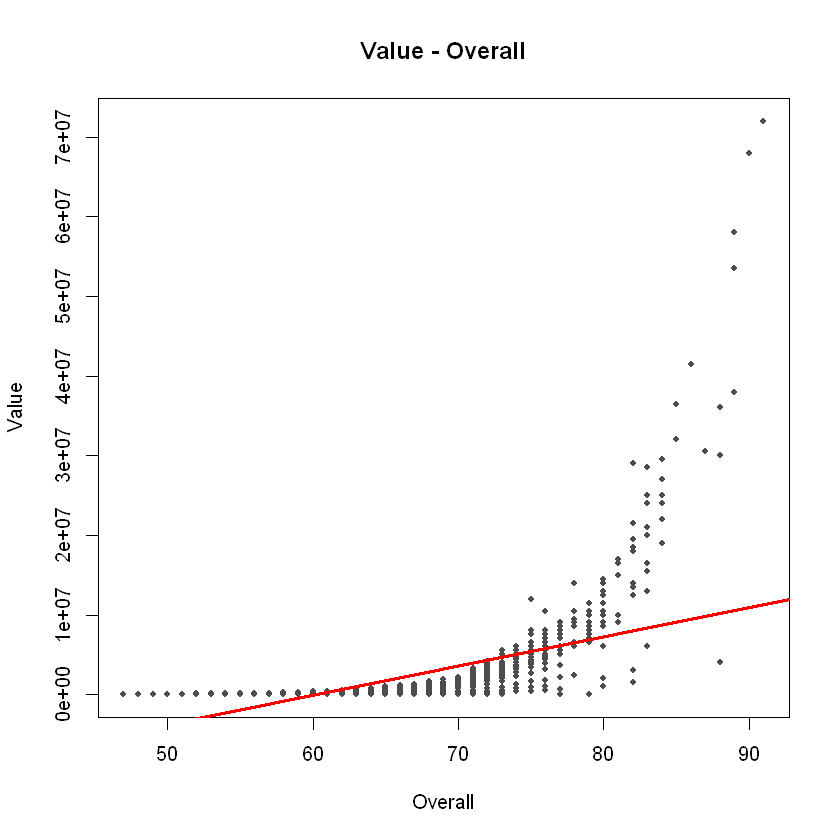

In [85]:
attach(fifaGK)
plot(x = Overall, y = Value, main = "Value - Overall", pch = 20, col = "grey30")
abline(regresor_fifaGK, lwd = 3, col = "red")

La representación gráfica de las observaciones muestra que la relación entre ambas variables no es del todo lineal, lo que nos lleva a probar otro tipo de modelo para tratar de explicar mejor la relación entre ellas. Aun así la aproximación no es mala

Para confirmar si las condiciones necesarias para nuestro modelo de regresión lineal simple están dadas analizamos si los mínimos cuadrados se cumplen, ello lo vemos mediante el estudio de los residuos del modelo.

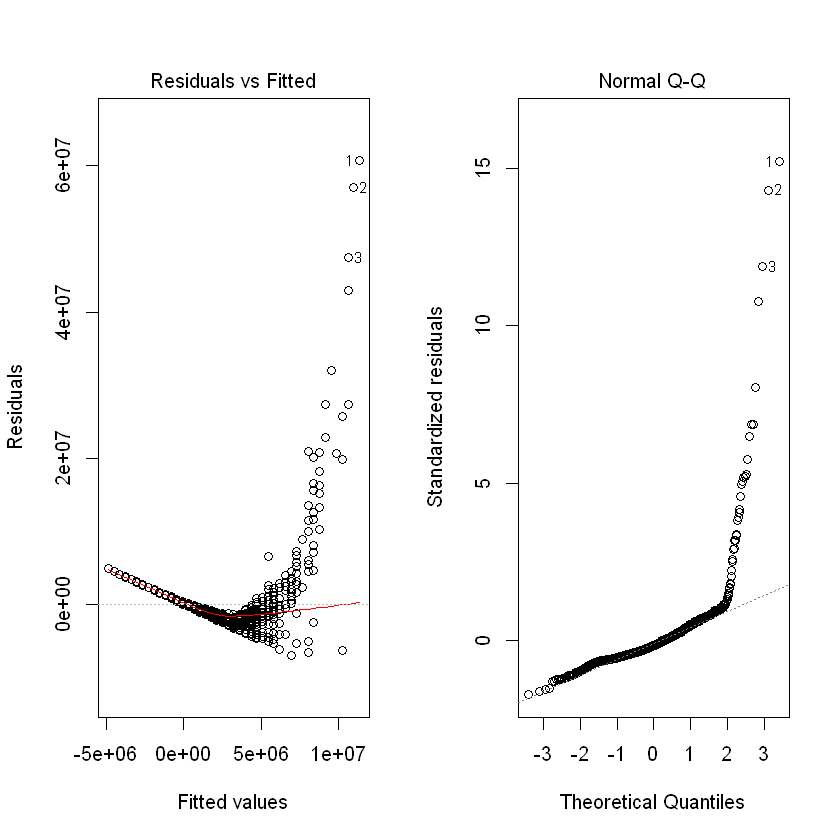

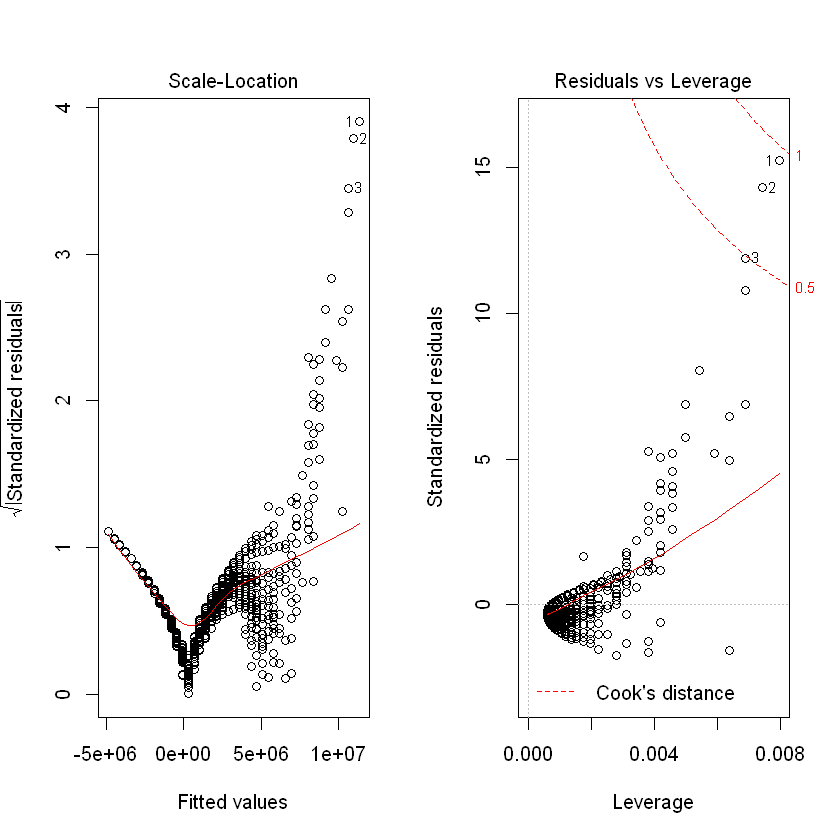

In [86]:
#Diagnóstico del Modelo
par(mfrow = c(1,2))
plot(regresor_fifaGK)

Los residuos confirman que los datos no se distribuyen de forma lineal, ni su varianza constante. Podemos además observar que la distribución de los residuos no es normal.
Todo ello reduce considerablemente la robustez de la estimación del error estándar de los coeficientes de correlación estimados y con ello la de todo el modelo planteado.

Para identificar las observaciones de una manera alternativa usamos las funciones rstudent() y hatvalues(), de esta menera identificaremos todas las que puedan ser outliers o puntos con alta influencia (leverage)

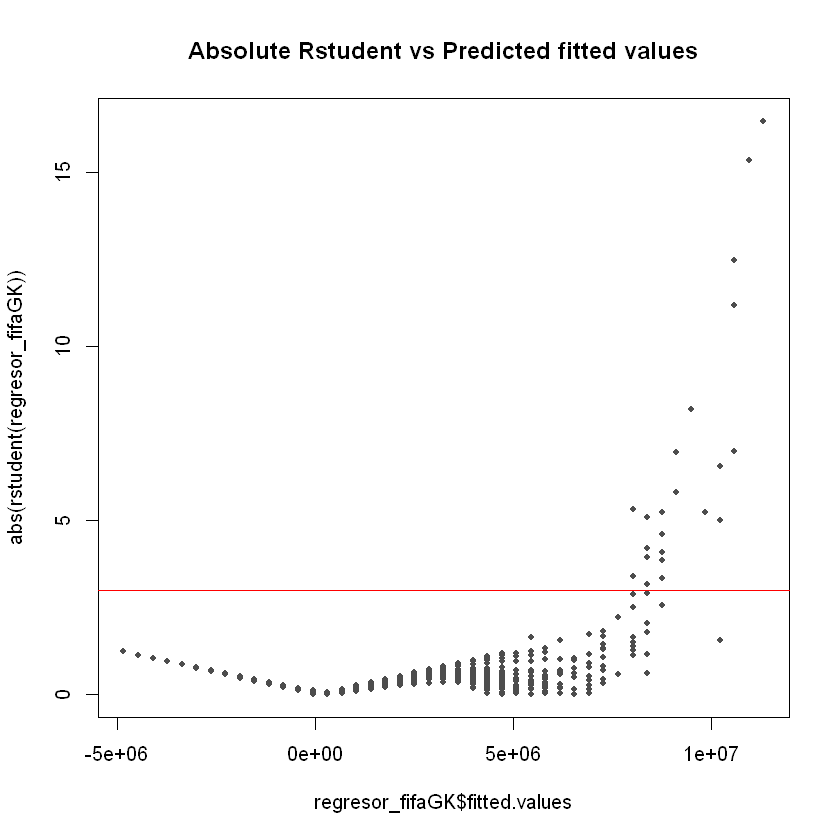

In [87]:
plot(x = regresor_fifaGK$fitted.values, y = abs(rstudent(regresor_fifaGK)),
     main = "Absolute Rstudent vs Predicted fitted values", pch = 20,
     col = "grey30")
abline(h = 3, col = "red")

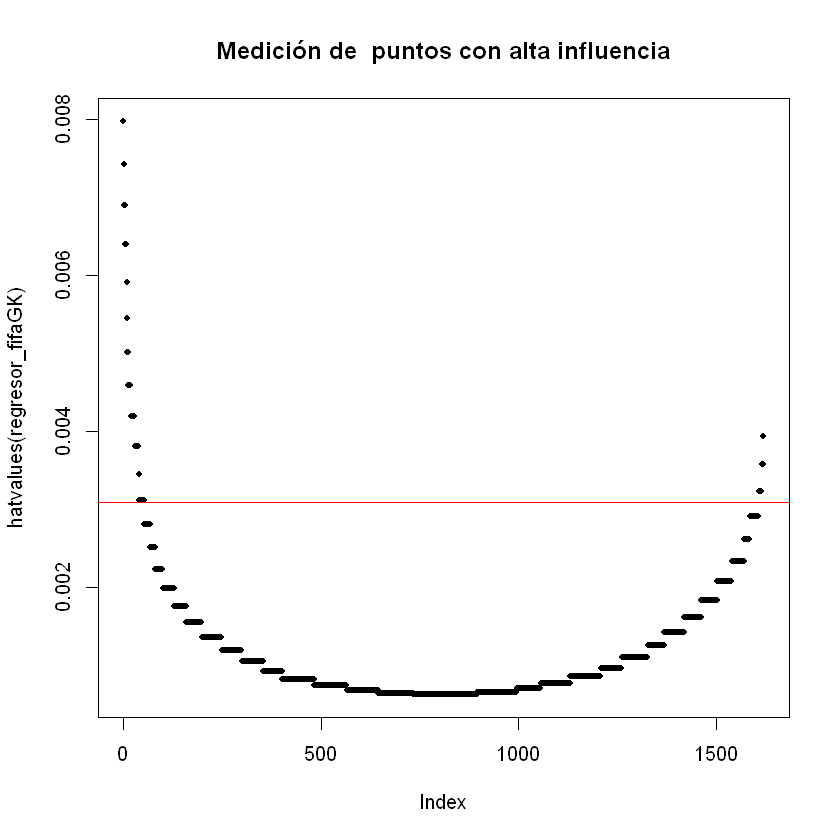

In [88]:
plot(hatvalues(regresor_fifaGK), main = "Medición de  puntos con alta influencia", pch = 20)
abline(h = 2.5*((dim(regresor_fifaGK$model)[2]-1 + 1)/dim(regresor_fifaGK$model)[1]),
       col = "red")

Muchos de los valores parecen posibles outliers porque los datos realmente no se distribuyen de forma lineal.

### Vamos a probar si incluyendo más variables al modelo la predicción mejora.

In [89]:
#Incluimos todas las variables del data set fifaGK.train
set.seed(1500)
regresor_fifaGK_All <- lm(Value ~ . , data = fifaGK.train)

In [90]:
summary(regresor_fifaGK_All)


Call:
lm(formula = Value ~ ., data = fifaGK.train)

Residuals:
      Min        1Q    Median        3Q       Max 
-19073784  -1129969   -178228    866212  45848315 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -17266196    1349270 -12.797  < 2e-16 ***
Age                        -312344      30446 -10.259  < 2e-16 ***
Overall                    1540396     254217   6.059 1.70e-09 ***
Potential                   -69282      32007  -2.165 0.030565 *  
GKDiving                   -277969      60496  -4.595 4.67e-06 ***
GKHandling                 -189336      58956  -3.212 0.001346 ** 
GKKicking                   -39935      20256  -1.972 0.048830 *  
GKPositioning              -283972      57475  -4.941 8.59e-07 ***
GKReflexes                 -253623      59087  -4.292 1.87e-05 ***
Reactions                  -111004      31121  -3.567 0.000372 ***
International.Reputation   5527225     250492  22.065  < 2e-16 ***
---
Signif. cod

In [91]:
str(fifaGK.train)

'data.frame':	1621 obs. of  11 variables:
 $ Age                     : int  27 25 26 26 32 31 33 40 31 24 ...
 $ Overall                 : int  91 90 89 89 89 88 88 88 87 86 ...
 $ Potential               : int  93 93 92 90 89 88 88 88 87 90 ...
 $ GKDiving                : int  90 86 87 85 90 88 87 88 90 85 ...
 $ GKHandling              : int  85 92 85 91 86 84 86 87 81 80 ...
 $ GKKicking               : int  87 78 88 72 91 68 69 74 75 91 ...
 $ GKPositioning           : int  88 88 85 86 87 83 89 90 82 82 ...
 $ GKReflexes              : int  94 89 90 88 87 92 89 83 90 87 ...
 $ Reactions               : int  90 86 85 84 84 85 83 79 84 86 ...
 $ International.Reputation: int  4 3 3 4 5 4 3 4 3 2 ...
 $ Value                   : num  72000000 68000000 58000000 53500000 38000000 36000000 30000000 4000000 30500000 41500000 ...


In [92]:
y_predict_fifaGK_All <- predict(regresor_fifaGK_All, fifaGK.train)

In [93]:
y_test_predict_fifaGK_All <- predict(regresor_fifaGK_All, fifaGK.test)

Para verificar la correlación entre los valores existentes en el modelo y el entreanamiento utilizamos la función cor. A valor más cercano a 1, mejor ajuste de datos.

In [94]:
cor(fifaGK.test$Value, y_test_predict_fifaGK_All)
print (regresor_fifaGK_All)

[1] 0.8170503


Call:
lm(formula = Value ~ ., data = fifaGK.train)

Coefficients:
             (Intercept)                       Age                   Overall  
               -17266196                   -312344                   1540396  
               Potential                  GKDiving                GKHandling  
                  -69282                   -277969                   -189336  
               GKKicking             GKPositioning                GKReflexes  
                  -39935                   -283972                   -253623  
               Reactions  International.Reputation  
                 -111004                   5527225  



Observando el resultado anterior, podemos notar que la predicción mejora notablemente al incrementar la cantidad de variables consideradas para el entrenamiento.

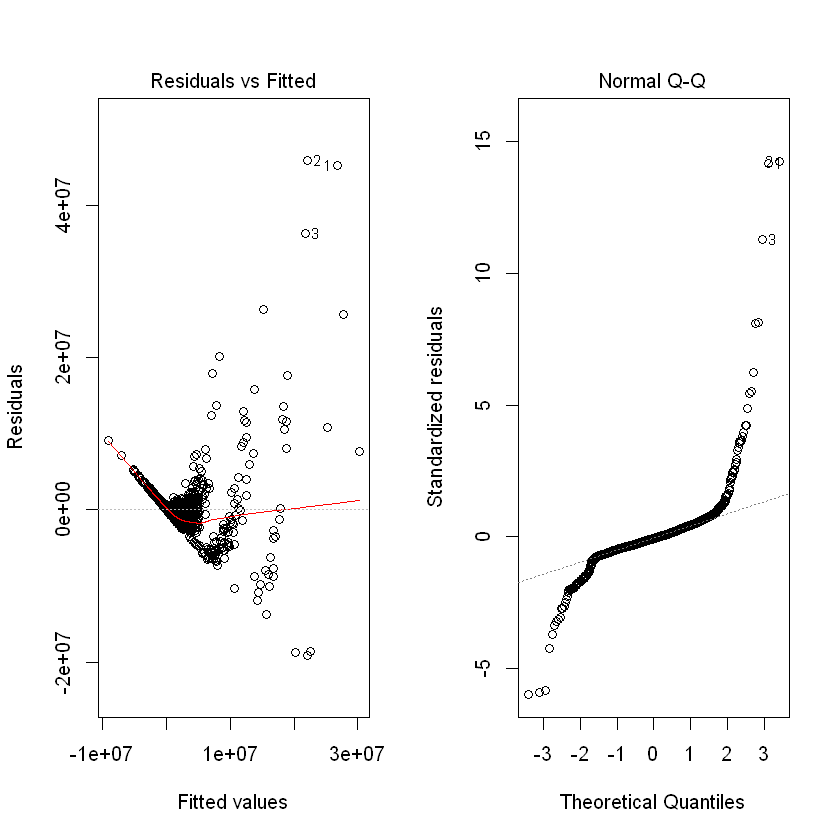

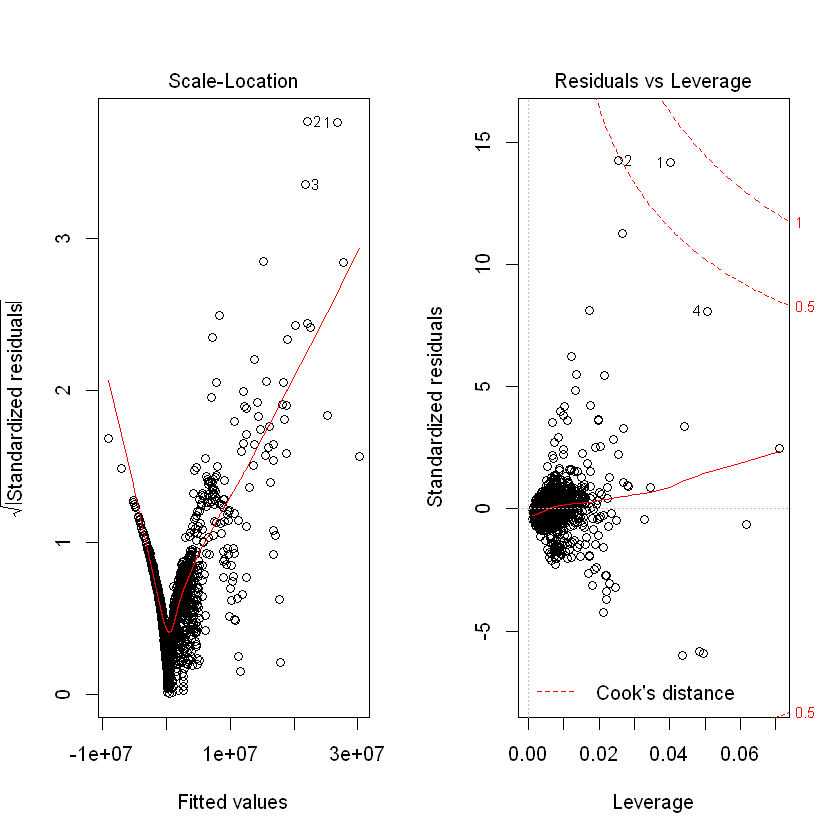

In [95]:
#Diagnóstico del Modelo
par(mfrow = c(1,2))
plot(regresor_fifaGK_All)

A pesar de haber incrementado el número de variables utilizadas en el modelo,el mismo sigue carente de robustez, por lo que se intentará escalar las variables numéricas para observar si la predicción del mismo mejora.

---

Vamos a escalar todas las features excepto 'Value' porque es la que vamos a predecir. Los valores de x son escalados así algoritmos como por ejemplo support vector machines le dan un peso igual a cada feature, sin embargo escalar 'y' no afecta el aprendizaje de los algoritmos.

In [96]:
colnames(fifaGK)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "GKDiving"                
 [5] "GKHandling"               "GKKicking"               
 [7] "GKPositioning"            "GKReflexes"              
 [9] "Reactions"                "International.Reputation"
[11] "Value"

In [97]:
dropsGK = c('Value')
fifaGK_wv =  fifaGK[ , !(names(fifaGK) %in% dropsGK)]
head(fifaGK_wv)

Age Overall Potential GKDiving GKHandling GKKicking GKPositioning GKReflexes
1 27  91      93        90       85         87        88            94        
2 25  90      93        86       92         78        88            89        
3 26  89      92        87       85         88        85            90        
4 26  89      90        85       91         72        86            88        
5 32  89      89        90       86         91        87            87        
6 31  88      88        88       84         68        83            92        
  Reactions International.Reputation
1 90        4                       
2 86        3                       
3 85        3                       
4 84        4                       
5 84        5                       
6 85        4

In [98]:
scaled_fifaGK_wv = scale(fifaGK_wv)
head(scaled_fifaGK_wv)

Age          Overall  Potential GKDiving GKHandling GKKicking
[1,]  0.175029424 3.474770 3.639800  3.176425 2.956244   3.3466318
[2,] -0.190932975 3.343133 3.639800  2.661525 3.891263   2.1665075
[3,] -0.007951776 3.211496 3.482919  2.790250 2.956244   3.4777567
[4,] -0.007951776 3.211496 3.169157  2.532800 3.757689   1.3797579
[5,]  1.089935421 3.211496 3.012275  3.176425 3.089818   3.8711314
[6,]  0.906954221 3.079858 2.855394  2.918975 2.822670   0.8552583
     GKPositioning GKReflexes Reactions International.Reputation
[1,] 2.877569      3.396626   3.016081   7.761051               
[2,] 2.877569      2.787874   2.627831   5.088694               
[3,] 2.531605      2.909625   2.530768   5.088694               
[4,] 2.646926      2.666124   2.433706   7.761051               
[5,] 2.762248      2.544373   2.433706  10.433407               
[6,] 2.300962      3.153125   2.530768   7.761051

Combinamos el dataframe con los datos numéricos modificados y la columna value

In [99]:
cleaned_fifaGK_df = cbind.data.frame(scaled_fifaGK_wv, Value=fifaGK$Value)
head(cleaned_fifaGK_df)

Age          Overall  Potential GKDiving GKHandling GKKicking GKPositioning
1  0.175029424 3.474770 3.639800  3.176425 2.956244   3.3466318 2.877569     
2 -0.190932975 3.343133 3.639800  2.661525 3.891263   2.1665075 2.877569     
3 -0.007951776 3.211496 3.482919  2.790250 2.956244   3.4777567 2.531605     
4 -0.007951776 3.211496 3.169157  2.532800 3.757689   1.3797579 2.646926     
5  1.089935421 3.211496 3.012275  3.176425 3.089818   3.8711314 2.762248     
6  0.906954221 3.079858 2.855394  2.918975 2.822670   0.8552583 2.300962     
  GKReflexes Reactions International.Reputation Value   
1 3.396626   3.016081   7.761051                72000000
2 2.787874   2.627831   5.088694                68000000
3 2.909625   2.530768   5.088694                58000000
4 2.666124   2.433706   7.761051                53500000
5 2.544373   2.433706  10.433407                38000000
6 3.153125   2.530768   7.761051                36000000

In [100]:
is.data.frame(cleaned_fifaGK_df)

[1] TRUE

In [101]:
set.seed(1500)
cleaned_fifaGK_index <- createDataPartition(cleaned_fifaGK_df$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
cleaned_fifaGK.train <- cleaned_fifaGK_df[cleaned_fifaGK_index,]
cleaned_fifaGK.test <- cleaned_fifaGK_df[-cleaned_fifaGK_index,]

In [102]:
head(cleaned_fifaGK.train)
head(cleaned_fifaGK.test)
nrow(cleaned_fifaGK.train) + nrow(cleaned_fifaGK.test) == nrow(cleaned_fifaGK_df)

Age          Overall  Potential GKDiving GKHandling GKKicking GKPositioning
1  0.175029424 3.474770 3.639800  3.176425 2.956244   3.3466318 2.877569     
2 -0.190932975 3.343133 3.639800  2.661525 3.891263   2.1665075 2.877569     
3 -0.007951776 3.211496 3.482919  2.790250 2.956244   3.4777567 2.531605     
4 -0.007951776 3.211496 3.169157  2.532800 3.757689   1.3797579 2.646926     
5  1.089935421 3.211496 3.012275  3.176425 3.089818   3.8711314 2.762248     
6  0.906954221 3.079858 2.855394  2.918975 2.822670   0.8552583 2.300962     
  GKReflexes Reactions International.Reputation Value   
1 3.396626   3.016081   7.761051                72000000
2 2.787874   2.627831   5.088694                68000000
3 2.909625   2.530768   5.088694                58000000
4 2.666124   2.433706   7.761051                53500000
5 2.544373   2.433706  10.433407                38000000
6 3.153125   2.530768   7.761051                36000000

Age          Overall  Potential GKDiving GKHandling GKKicking GKPositioning
18  0.906954221 2.553309 2.227869  2.146625 2.822670   2.035383  2.531605     
29  0.540991823 2.421672 2.227869  1.631725 2.822670   2.428757  1.954998     
30  1.272916620 2.421672 2.070988  2.661525 2.421947   1.117508  1.839676     
31  1.272916620 2.421672 2.070988  1.760450 2.555522   1.904258  2.646926     
38 -0.007951776 2.290034 2.384750  2.275350 1.887651   2.035383  2.070319     
39  0.175029424 2.290034 2.384750  2.661525 2.021225   1.510883  1.609033     
   GKReflexes Reactions International.Reputation Value   
18 1.935621   1.851330  5.088694                 19000000
29 2.300872   2.045455  5.088694                 20000000
30 2.179122   2.045455  5.088694                 13000000
31 2.179122   1.657205  2.416338                 13000000
38 2.057372   2.142518  2.416338                 19500000
39 2.422623   1.948393  5.088694                 18500000

[1] TRUE

In [105]:
glm_fifaGK = glm(Value~Age+Overall+Potential+International.Reputation, data=cleaned_fifaGK.train)
k_fold_cv_error_fifaGK = cv.glm(cleaned_fifaGK.train , glm_fifaGK, K=5)

In [106]:
k_fold_cv_error_fifaGK$delta

[1] 1.171441e+13 1.160480e+13

El resultado de la validación cruzada nos da el MSE, lo ajustamos para que nos de el RMSE

In [107]:
glm_cv_rmse_fifaGK = sqrt(k_fold_cv_error_fifaGK$delta)[1]
glm_cv_rmse_fifaGK

[1] 3422632

Observamos qué sucede cuando solamente incluímos las dos variables que más impactan en el valor.

In [108]:
glm_fifaGK_AgeOverall = glm(Value~Age+Overall, data=cleaned_fifaGK.train)
k_fold_cv_error_fifaGK_AgeOverall = cv.glm(cleaned_fifaGK.train , glm_fifaGK, K=5)

In [109]:
glm_cv_rmse_fifaGK_AgeOverall = sqrt(k_fold_cv_error_fifaGK_AgeOverall$delta)[1]
glm_cv_rmse_fifaGK_AgeOverall

[1] 3320244

El RMSE disminuyó por 100.000 aproximadamente

Probamos otra forma de realizar la regresión lineal con todos los datos escalados

In [110]:
#Regresión lineal simple
modelo_fifaGK<- lm(Value ~ ., data=cleaned_fifaGK.train)
#Resumen del ajuste del modelo
summary(modelo_fifaGK)


Call:
lm(formula = Value ~ ., data = cleaned_fifaGK.train)

Residuals:
      Min        1Q    Median        3Q       Max 
-19073784  -1129969   -178228    866212  45848315 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1609018      81116  19.836  < 2e-16 ***
Age                      -1706974     166390 -10.259  < 2e-16 ***
Overall                  11701815    1931192   6.059 1.70e-09 ***
Potential                 -441623     204021  -2.165 0.030565 *  
GKDiving                 -2159402     469960  -4.595 4.67e-06 ***
GKHandling               -1417459     441369  -3.212 0.001346 ** 
GKKicking                 -304559     154476  -1.972 0.048830 *  
GKPositioning            -2462442     498389  -4.941 8.59e-07 ***
GKReflexes               -2083138     485314  -4.292 1.87e-05 ***
Reactions                -1143631     320633  -3.567 0.000372 ***
International.Reputation  2068296      93735  22.065  < 2e-16 ***
---
Signif. codes: 

In [111]:
prediction_fifaGK <- predict(modelo_fifaGK, cleaned_fifaGK.test)

In [112]:
#Calculamos el MSE 
mseGK = sum(modelo_fifaGK$residuals^2)/modelo_fifaGK$df.residual
mseGK

[1] 1.064454e+13

In [113]:
summary(modelo_fifaGK)$adj.r.squared

[1] 0.5531663

In [114]:
cor(cleaned_fifaGK.test$Value, prediction_fifaGK)
print (prediction_fifaGK)

[1] 0.8170503

          18           29           30           31           38           39 
17840594.835 18353943.953 16455053.290 10900872.481 12321655.973 17270062.919 
          45           46           49           55           56           63 
 7625669.492 11790236.201 10267774.989  6670757.544 10989169.259 16387437.268 
          66           67           76           77           84           86 
 8726303.165  7859920.258  9488035.175 10988678.288  9217315.467  8724641.748 
          87          101          103          107          108          118 
12864334.554  8395786.650  6443565.182  5271340.062  9713887.780  2535360.177 
         119          125          129          153          159          160 
 4949046.677  3027757.221  3952486.135  5913692.559  1875707.779  4432385.041 
         164          165          173          174          179          181 
 7428594.479  7165425.468  2818451.016  3306406.831  4005887.125  4935015.473 
         182          192          194          203 

In [115]:
#Evaluando errores
postResample(prediction_fifaGK,cleaned_fifaGK.test$Value)

RMSE     Rsquared          MAE 
1.885902e+06 6.675712e-01 1.323814e+06

## Probando Random Forest

La forma más sencilla de implementarlo es dividiendo las observaciones disponibles en fifaGK  en dos grupos, uno se emplea para ajustar el árbol training dataset y el otro para evaluarlo.

In [117]:
#Creación del modelo
set.seed(1234)
fifaGK_randomForest <- randomForest(Value ~ Age+Overall, data = fifaGK.train, ntree = 500)

### Visualización del modelo creado

In [118]:
fifaGK_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaGK.train,      ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.724432e+12
                    % Var explained: 92.76

In [119]:
#Importancia de las variables
fifaGK_randomForest$importance

IncNodePurity
Age     3.221391e+15 
Overall 3.316963e+16

In [120]:
#Predicción
y_fifaGK_predict <- predict(fifaGK_randomForest, fifaGK.train)

In [121]:
#correlación entre la predicción
cor(fifaGK.train$Value, y_fifaGK_predict)

[1] 0.9910762

In [122]:
y_fifaGK_test_predict <- predict(fifaGK_randomForest, fifaGK.test)

In [123]:
cor(fifaGK.test$Value, y_fifaGK_test_predict)

[1] 0.9911369

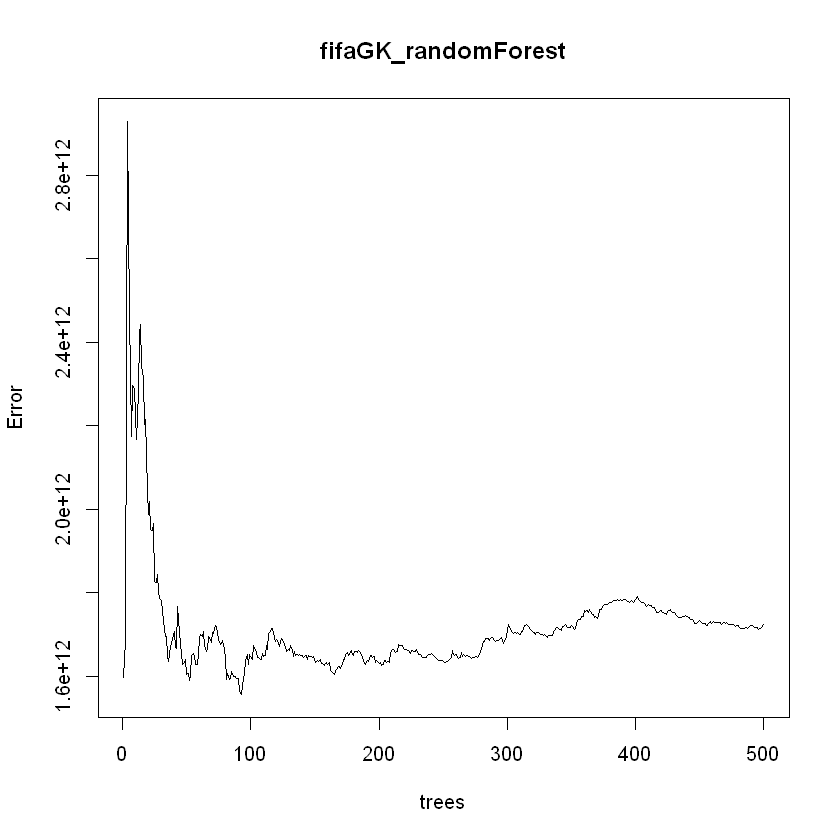

In [124]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaGK_randomForest)

#### Vemos que en los 200 árboles el modelo se estabiliza, entonces ajustamos el modelo, incluyendo el ajuste de hiperparámetros

In [125]:
#Ajuste del modelo
set.seed(1234)
fifaGK_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaGK.train, ntree = 200)

In [126]:
fifaGK_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaGK.train,      ntree = 200) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 1

          Mean of squared residuals: 1.629893e+12
                    % Var explained: 93.15

In [127]:
#Predicción con el modelo ajustado
y_fifaGK_predict_ajustado <- predict(fifaGK_randomForest_ajustado, fifaGK.train)

Para verificar la relación entre nuestras variables cuantitativas, utilizamos la función "cor". La magnitud obtenida con la función va de 0 a 1 siendo 0 ninguna relación y 1 una relación perfectamente predictiva.
+1 es una correlación perfecta positiva.
0 no hay correlación (independencia)
-1 es una correlación perfecta negativa

In [128]:
#Correlación entre la predicción y nuestro dataset de entrenamiento.
rf_fifaGK_cor <- cor(fifaGK.train$Value, y_fifaGK_predict_ajustado)
rf_fifaGK_cor

[1] 0.9910966

Nuestra magnitud muestra una relación perfectamente predictiva entre ambas variables.

No solo es interesante ajustar el árbol sino también evaluar su capacidad predictiva mediante la estimación del test error.

In [129]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaGK_predict_ajustado,fifaGK.train$Value)

RMSE     Rsquared          MAE 
7.640889e+05 9.822725e-01 2.364092e+05

In [130]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaGK.knn <- train(Value ~ Age+Overall,
      data = fifaGK,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaGK.knn

k-Nearest Neighbors 

2025 samples
   2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1823, 1823, 1823, 1822, 1822, 1822, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE     
   3   815517.1  0.9725202  180534.7
   5   883922.7  0.9660018  188670.8
   7   972312.6  0.9619899  199857.4
   9  1082795.0  0.9579719  205034.0
  11  1188908.4  0.9498426  217513.9
  13  1239574.8  0.9467381  222879.9
  15  1326361.3  0.9436483  235618.4

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

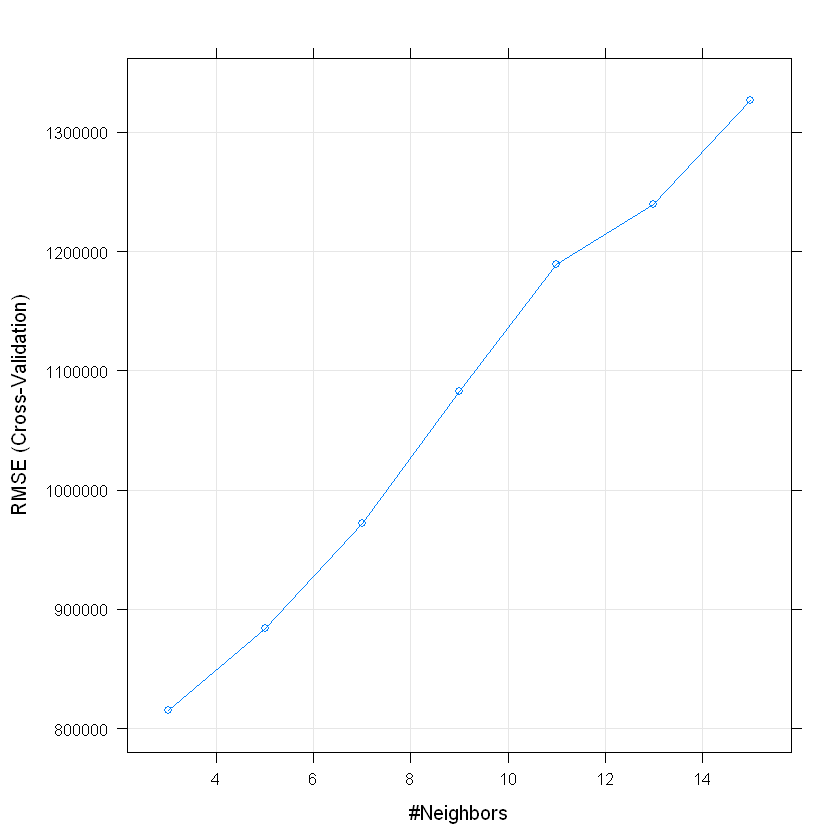

In [131]:
plot(fifaGK.knn)

### Evaluación de errores según modelo utilizado

In [132]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaGK_predict_ajustado,fifaGK.train$Value)

RMSE     Rsquared          MAE 
7.640889e+05 9.822725e-01 2.364092e+05

In [133]:
#Evaluando errores utilizando regresión lineal sobre datos escalados
postResample(prediction_fifaGK,cleaned_fifaGK.test$Value)

RMSE     Rsquared          MAE 
1.885902e+06 6.675712e-01 1.323814e+06

### Comparación de modelos
Para observar de una forma más adecuada el desempeño de los modelos se propone una comparación mediante el criterio AUC, para determinar el modelo que da los mejores resultados

<a id='ConclusionesIntermedias'></a>
### Conclusiones intermedias

Luego de haber realizado la limpieza de datos y probado diferentes algoritmos para el entrenamiento del modelo incialmente podemos concluir:
* Random Forest presenta una mejor aproximación en la predicción, creemos que puede deberse a la dispersión de los datos.
* Es necesario prestar atención a identificar las variables que más influyen en la predicción, ya que la selección de menor o mayor cantidad de variables afecta notoriamente en el entrenamiento. Teniendo como consecuencia un error mayor en la predicción.

A partir del estudio para el Goal Keeper y la conclusiones, se decide utilizar el algoritmo random forest para el resto de las posiciones.

<a id='AlgoritmoCD'></a>
## Análisis de datos para Central Defenders

In [134]:
#Aplicamos PCA al dataset de defensa central a todas las columnas menos "Name" y "Nationality" las cuales no fueron incluídas
names(fifaCB)
fifaCB.pca <- prcomp(fifaCB [c(1:16)], center = TRUE,scale. = TRUE)
summary(fifaCB.pca)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Marking"                 
 [5] "StandingTackle"           "SlidingTackle"           
 [7] "HeadingAccuracy"          "Strength"                
 [9] "Aggression"               "Interceptions"           
[11] "ShortPassing"             "BallControl"             
[13] "Reactions"                "Jumping"                 
[15] "International.Reputation" "Value"

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.9935 1.26403 1.00646 0.98430 0.89776 0.77066 0.63958
Proportion of Variance 0.5601 0.09986 0.06331 0.06055 0.05037 0.03712 0.02557
Cumulative Proportion  0.5601 0.65994 0.72325 0.78380 0.83417 0.87129 0.89686
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.56318 0.52710 0.5185 0.49392 0.43939 0.41007 0.30258
Proportion of Variance 0.01982 0.01736 0.0168 0.01525 0.01207 0.01051 0.00572
Cumulative Proportion  0.91668 0.93405 0.9508 0.96610 0.97816 0.98867 0.99439
                          PC15    PC16
Standard deviation     0.28724 0.08473
Proportion of Variance 0.00516 0.00045
Cumulative Proportion  0.99955 1.00000

A partir de lo anterior observamos que las variables que más influyen son la edad ("Age") y puntaje ("Overall")

In [92]:
summary(fifaCB)

      Age           Overall        Potential        Marking     
 Min.   :16.00   Min.   :48.00   Min.   :52.00   Min.   :39.00  
 1st Qu.:22.00   1st Qu.:63.00   1st Qu.:68.00   1st Qu.:60.00  
 Median :26.00   Median :67.00   Median :71.00   Median :65.00  
 Mean   :25.75   Mean   :66.82   Mean   :71.49   Mean   :65.22  
 3rd Qu.:29.00   3rd Qu.:71.00   3rd Qu.:75.00   3rd Qu.:70.00  
 Max.   :40.00   Max.   :91.00   Max.   :92.00   Max.   :94.00  
 StandingTackle  SlidingTackle  HeadingAccuracy    Strength       Aggression   
 Min.   :42.00   Min.   :23.0   Min.   :39.00   Min.   :33.00   Min.   :26.00  
 1st Qu.:63.00   1st Qu.:61.0   1st Qu.:61.00   1st Qu.:71.00   1st Qu.:60.00  
 Median :67.00   Median :65.0   Median :66.00   Median :77.00   Median :68.00  
 Mean   :67.81   Mean   :65.4   Mean   :65.84   Mean   :76.03   Mean   :67.02  
 3rd Qu.:72.00   3rd Qu.:70.0   3rd Qu.:72.00   3rd Qu.:81.25   3rd Qu.:75.00  
 Max.   :93.00   Max.   :91.0   Max.   :94.00   Max.   :95.00   M

In [135]:
dim(fifaCB)

[1] 3088   16

Particionamos fifaCB con el fin de obtener un data frame para realizar el entrenamiento y otro para probarlo

In [136]:
set.seed(1500)
indexes_fifaCB <- createDataPartition(fifaCB$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaCB.train <- fifaCB[indexes_fifaCB,]
fifaCB.test <- fifaCB[-indexes_fifaCB,]

In [137]:
#Verificamos los subconjuntos
names(fifaCB.train)
dim(fifaCB.train)

names(fifaCB.test)
dim(fifaCB.test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Marking"                 
 [5] "StandingTackle"           "SlidingTackle"           
 [7] "HeadingAccuracy"          "Strength"                
 [9] "Aggression"               "Interceptions"           
[11] "ShortPassing"             "BallControl"             
[13] "Reactions"                "Jumping"                 
[15] "International.Reputation" "Value"

[1] 2472   16

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Marking"                 
 [5] "StandingTackle"           "SlidingTackle"           
 [7] "HeadingAccuracy"          "Strength"                
 [9] "Aggression"               "Interceptions"           
[11] "ShortPassing"             "BallControl"             
[13] "Reactions"                "Jumping"                 
[15] "International.Reputation" "Value"

[1] 616  16

Verificamos que la suma de la cantidad de líneas de fifaCB.train y fifaCB.test es igual a la cantidad total de lineas de fifaCB

In [138]:
nrow(fifaCB.train) + nrow(fifaCB.test) == nrow(fifaCB)

[1] TRUE

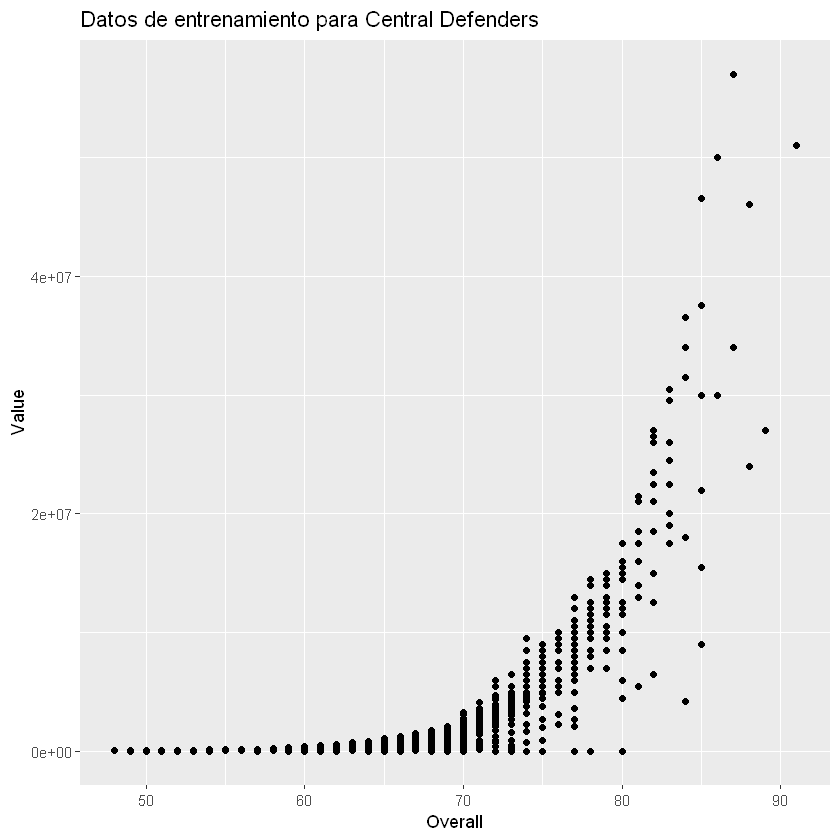

In [139]:
ggplot() + geom_point(data = fifaCB.train, aes(x = Overall, y = Value)) + 
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Datos de entrenamiento para Central Defenders")

<a id='RForestCD'></a>
## Random Forest Central Backs

In [141]:
#Creación del modelo
set.seed(1234)
fifaCB_randomForest <- randomForest(Value ~ Age+Overall, data = fifaCB.train, ntree = 500)

### Visualización del modelo creado

In [142]:
fifaCB_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaCB.train,      ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.125703e+12
                    % Var explained: 94.3

In [143]:
#Importancia de las variables
fifaCB_randomForest$importance

IncNodePurity
Age     4.014085e+15 
Overall 4.185908e+16

In [144]:
#Predicción
y_fifaCB_predict <- predict(fifaCB_randomForest, fifaCB.train)

In [145]:
#Correlación entre la predicción
cor(fifaCB.train$Value, y_fifaCB_predict)

[1] 0.9911211

In [146]:
y_fifaCB_test_predict <- predict(fifaCB_randomForest, fifaCB.test)

In [147]:
cor(fifaCB.test$Value, y_fifaCB_test_predict)

[1] 0.9923845

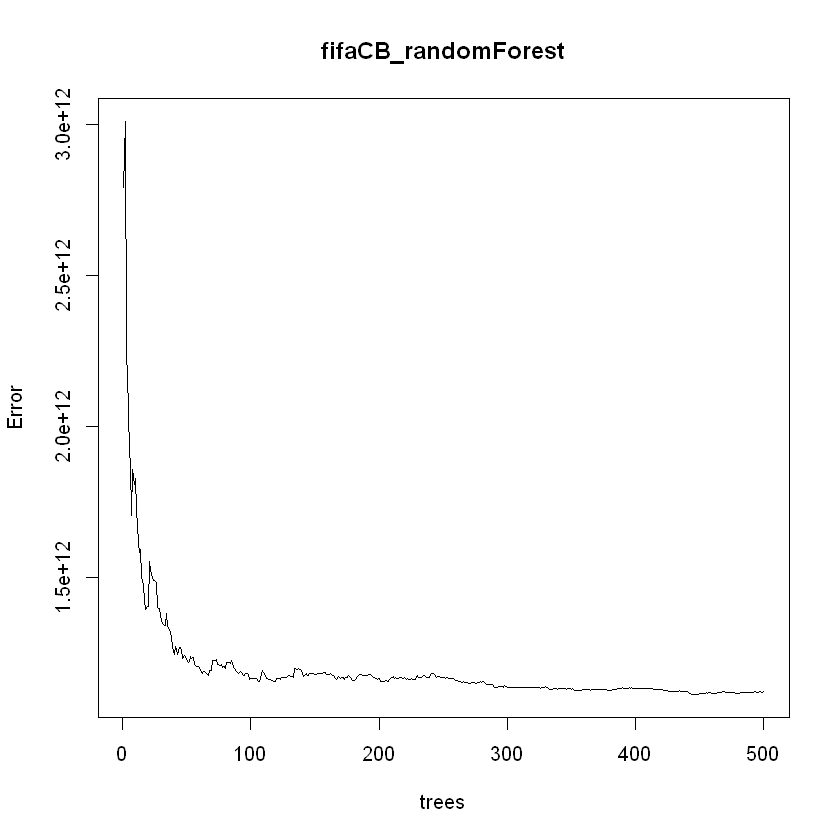

In [148]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaCB_randomForest)

#### Vemos que en los 200 árboles el modelo se estabiliza, entonces ajustamos el modelo 

In [149]:
#Ajuste del modelo
set.seed(1234)
fifaCB_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaCB.train, ntree = 200)

In [150]:
fifaCB_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaCB.train,      ntree = 200) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 1

          Mean of squared residuals: 1.166097e+12
                    % Var explained: 94.09

In [151]:
#Predicción con el modelo ajustado
y_fifaCB_predict_ajustado <- predict(fifaCB_randomForest_ajustado, fifaCB.train)

In [152]:
#Correlación entre la predicción
cor(fifaCB.train$Value, y_fifaCB_predict_ajustado)

[1] 0.9909808

In [153]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaCB_predict_ajustado,fifaCB.train$Value)

RMSE     Rsquared          MAE 
6.720129e+05 9.820430e-01 2.311659e+05

In [154]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaCB.knn <- train(Value ~ Age+Overall,
      data = fifaCB,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaCB.knn

k-Nearest Neighbors 

3088 samples
   2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2779, 2779, 2779, 2779, 2780, 2778, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   3  757229.0  0.9749596  195874.6
   5  734106.6  0.9771425  198058.2
   7  793624.1  0.9763343  212252.9
   9  795507.9  0.9776832  211085.0
  11  875210.1  0.9722868  221444.3
  13  920897.1  0.9689848  227652.0
  15  981069.2  0.9644869  238170.7

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 5.

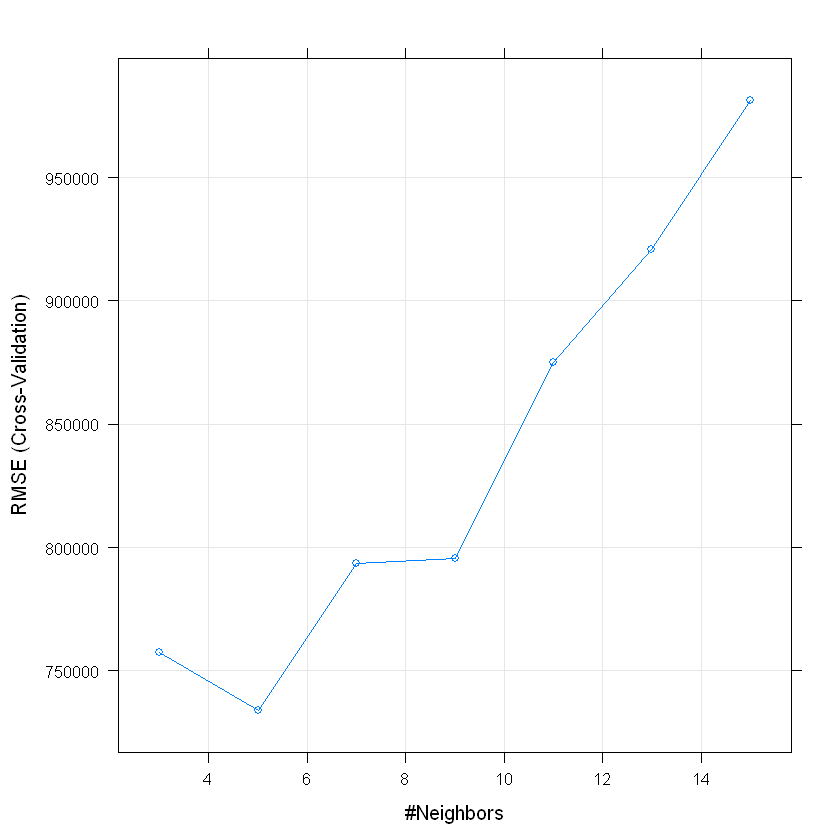

In [155]:
plot(fifaCB.knn)

<a id='AlgoritmoRLB'></a>
## Análisis de datos para Right/Left Backs

In [156]:
#Aplicamos PCA al dataset de Right/Left Backs a todas las columnas menos "Name" y "Nationality" las cuales no fueron incluídas
names(fifaRLB)
fifaRLB.pca <- prcomp(fifaRLB [c(1:17)], center = TRUE,scale. = TRUE)
summary(fifaRLB.pca)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Marking"                 
 [5] "StandingTackle"           "SlidingTackle"           
 [7] "HeadingAccuracy"          "Aggression"              
 [9] "Interceptions"            "ShortPassing"            
[11] "BallControl"              "Reactions"               
[13] "Stamina"                  "Crossing"                
[15] "SprintSpeed"              "International.Reputation"
[17] "Value"

Importance of components:
                          PC1     PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     3.0729 1.26639 1.10914 0.92434 0.85160 0.7329 0.69949
Proportion of Variance 0.5554 0.09434 0.07236 0.05026 0.04266 0.0316 0.02878
Cumulative Proportion  0.5554 0.64979 0.72215 0.77241 0.81507 0.8467 0.87545
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.67074 0.56459 0.5517 0.52447 0.47357 0.43783 0.38742
Proportion of Variance 0.02646 0.01875 0.0179 0.01618 0.01319 0.01128 0.00883
Cumulative Proportion  0.90191 0.92066 0.9386 0.95475 0.96794 0.97922 0.98805
                          PC15    PC16    PC17
Standard deviation     0.31517 0.29816 0.12242
Proportion of Variance 0.00584 0.00523 0.00088
Cumulative Proportion  0.99389 0.99912 1.00000

A partir de lo anterior observamos que las variables que más influyen son la edad ("Age") y puntaje ("Overall")

In [115]:
summary(fifaRLB.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     3.0729 1.26639 1.10914 0.92434 0.85160 0.7329 0.69949
Proportion of Variance 0.5554 0.09434 0.07236 0.05026 0.04266 0.0316 0.02878
Cumulative Proportion  0.5554 0.64979 0.72215 0.77241 0.81507 0.8467 0.87545
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.67074 0.56459 0.5517 0.52447 0.47357 0.43783 0.38742
Proportion of Variance 0.02646 0.01875 0.0179 0.01618 0.01319 0.01128 0.00883
Cumulative Proportion  0.90191 0.92066 0.9386 0.95475 0.96794 0.97922 0.98805
                          PC15    PC16    PC17
Standard deviation     0.31517 0.29816 0.12242
Proportion of Variance 0.00584 0.00523 0.00088
Cumulative Proportion  0.99389 0.99912 1.00000

In [157]:
dim(fifaRLB)

[1] 2613   17

Particionamos fifaRLB con el fin de obtener un data frame para realizar el entrenamiento y otro para probarlo

<a id='RForestRLB'></a>
## Random Forest Right/Left Backs

In [158]:
set.seed(1500)
indexes_fifaRLB <- createDataPartition(fifaRLB$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaRLB.train <- fifaRLB[indexes_fifaRLB,]
fifaRLB.test <- fifaRLB[-indexes_fifaRLB,]

In [159]:
#Verificamos los subconjuntos
names(fifaRLB.train)
dim(fifaRLB.train)

names(fifaRLB.test)
dim(fifaRLB.test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Marking"                 
 [5] "StandingTackle"           "SlidingTackle"           
 [7] "HeadingAccuracy"          "Aggression"              
 [9] "Interceptions"            "ShortPassing"            
[11] "BallControl"              "Reactions"               
[13] "Stamina"                  "Crossing"                
[15] "SprintSpeed"              "International.Reputation"
[17] "Value"

[1] 2092   17

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Marking"                 
 [5] "StandingTackle"           "SlidingTackle"           
 [7] "HeadingAccuracy"          "Aggression"              
 [9] "Interceptions"            "ShortPassing"            
[11] "BallControl"              "Reactions"               
[13] "Stamina"                  "Crossing"                
[15] "SprintSpeed"              "International.Reputation"
[17] "Value"

[1] 521  17

Verificamos que la suma de la cantidad de líneas de fifaRLB.train y fifaRLB.test es igual a la cantidad total de lineas de fifaRLB

In [160]:
nrow(fifaRLB.train) + nrow(fifaRLB.test) == nrow(fifaRLB)

[1] TRUE

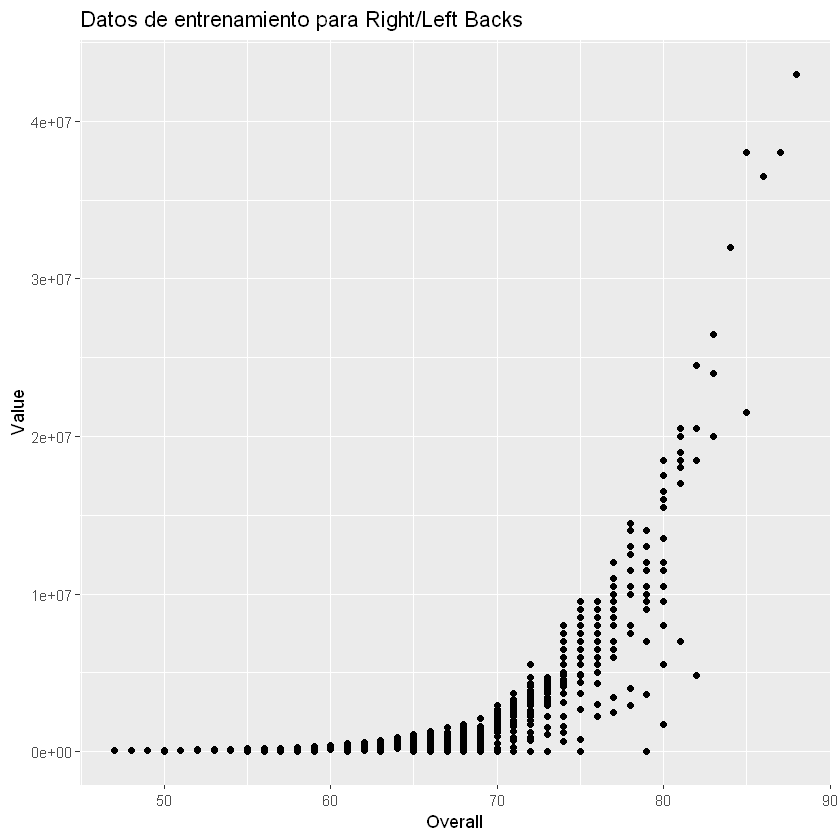

In [161]:
ggplot() + geom_point(data = fifaRLB.train, aes(x = Overall, y = Value)) + 
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Datos de entrenamiento para Right/Left Backs")

In [162]:
#Creación del modelo
set.seed(1234)
fifaRLB_randomForest <- randomForest(Value ~ Age+Overall, data = fifaRLB.train, ntree = 500)

### Visualización del modelo creado

In [163]:
fifaRLB_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaRLB.train,      ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 6.19182e+11
                    % Var explained: 94.32

In [164]:
#Importancia de las variables
fifaRLB_randomForest$importance

IncNodePurity
Age     1.624233e+15 
Overall 1.969228e+16

In [165]:
#Predicción
y_fifaRLB_predict <- predict(fifaRLB_randomForest, fifaRLB.train)

In [166]:
#Correlación entre la predicción
cor(fifaRLB.train$Value, y_fifaRLB_predict)

[1] 0.9922794

In [167]:
y_fifaRLB_test_predict <- predict(fifaRLB_randomForest, fifaRLB.test)

In [168]:
cor(fifaRLB.test$Value, y_fifaRLB_test_predict)

[1] 0.9920573

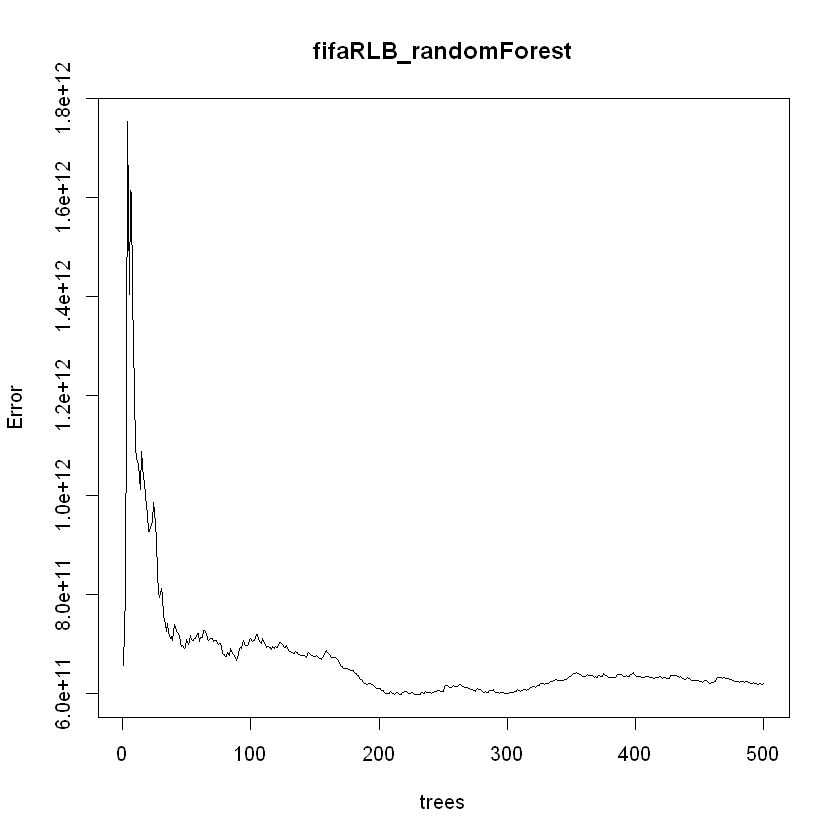

In [169]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaRLB_randomForest)

#### Vemos que en los 200 árboles el modelo se estabiliza, entonces ajustamos el modelo 

In [170]:
#Ajuste del modelo
set.seed(1234)
fifaRLB_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaRLB.train, ntree = 200)

In [171]:
fifaRLB_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaRLB.train,      ntree = 200) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 1

          Mean of squared residuals: 608817402202
                    % Var explained: 94.42

In [172]:
#Predicción con el modelo ajustado
y_fifaRLB_predict_ajustado <- predict(fifaRLB_randomForest_ajustado, fifaRLB.train)

In [173]:
#Correlación entre la predicción
cor(fifaRLB.train$Value, y_fifaRLB_predict_ajustado)

[1] 0.9922911

In [174]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaRLB_predict_ajustado,fifaRLB.train$Value)

RMSE     Rsquared          MAE 
4.951629e+05 9.846417e-01 1.867374e+05

In [175]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaRLB.knn <- train(Value ~ Age+Overall,
      data = fifaRLB,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaRLB.knn

k-Nearest Neighbors 

2613 samples
   2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2353, 2351, 2351, 2352, 2351, 2351, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   3  498524.3  0.9778007  139039.1
   5  508136.7  0.9774568  143463.1
   7  559275.6  0.9757005  156757.2
   9  579246.1  0.9748817  156122.0
  11  606307.9  0.9742252  159561.3
  13  646850.2  0.9718558  164948.1
  15  686913.0  0.9686499  169803.3

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

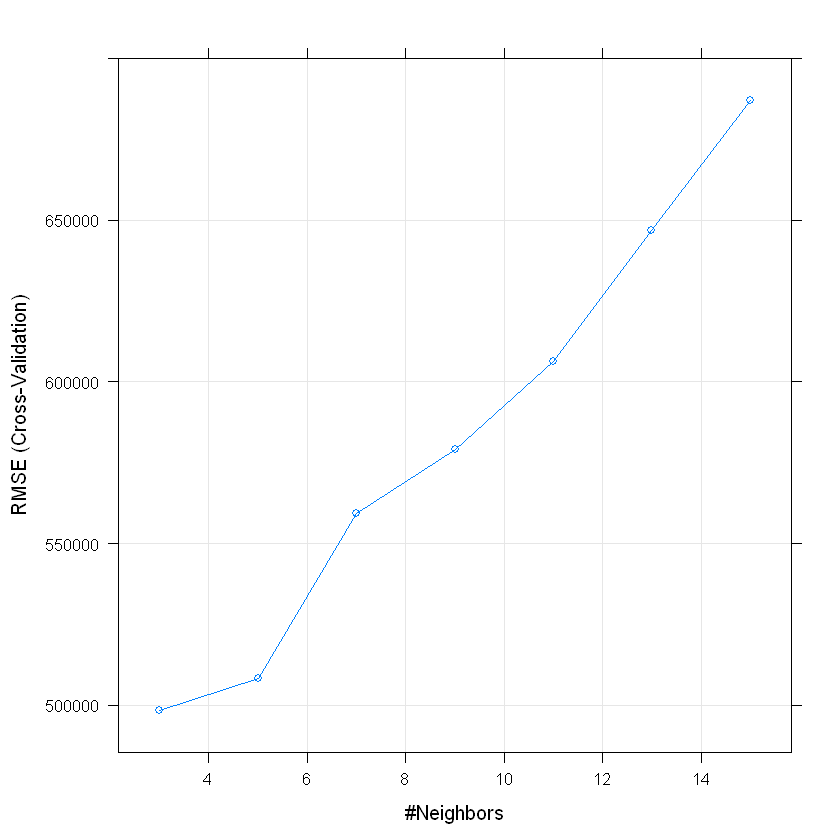

In [176]:
plot(fifaRLB.knn)

<a id='AlgoritmoRLWB'></a>
## Análisis de datos para Right/Left Winger Backs

In [177]:
#Aplicamos PCA al dataset de Right/Left Winger Backs a todas las columnas menos "Name" y "Nationality" las cuales no fueron incluídas
names(fifaLRWB)
fifaLRWB.pca <- prcomp(fifaLRWB [c(1:16)], center = TRUE,scale. = TRUE)
summary(fifaLRWB.pca)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Marking"                 
 [5] "StandingTackle"           "SlidingTackle"           
 [7] "Dribbling"                "Interceptions"           
 [9] "Agility"                  "BallControl"             
[11] "Reactions"                "Stamina"                 
[13] "Crossing"                 "SprintSpeed"             
[15] "International.Reputation" "Value"

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.0195 1.3535 1.14311 0.90075 0.80294 0.77237 0.60559
Proportion of Variance 0.5698 0.1145 0.08167 0.05071 0.04029 0.03728 0.02292
Cumulative Proportion  0.5698 0.6844 0.76602 0.81673 0.85702 0.89431 0.91723
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.51728 0.46781 0.45234 0.43492 0.39631 0.36594 0.28995
Proportion of Variance 0.01672 0.01368 0.01279 0.01182 0.00982 0.00837 0.00525
Cumulative Proportion  0.93395 0.94763 0.96042 0.97224 0.98206 0.99043 0.99568
                          PC15    PC16
Standard deviation     0.22415 0.13729
Proportion of Variance 0.00314 0.00118
Cumulative Proportion  0.99882 1.00000

A partir de lo anterior observamos que las variables que más influyen son la edad ("Age") y puntaje ("Overall")

In [178]:
summary(fifaLRWB)

      Age           Overall        Potential       Marking      StandingTackle 
 Min.   :16.00   Min.   :48.00   Min.   :55.0   Min.   :40.00   Min.   :27.00  
 1st Qu.:22.00   1st Qu.:61.00   1st Qu.:66.0   1st Qu.:56.00   1st Qu.:58.00  
 Median :25.00   Median :65.00   Median :70.0   Median :61.00   Median :63.00  
 Mean   :24.85   Mean   :65.53   Mean   :70.3   Mean   :61.25   Mean   :63.33  
 3rd Qu.:28.00   3rd Qu.:71.00   3rd Qu.:75.0   3rd Qu.:67.00   3rd Qu.:69.00  
 Max.   :34.00   Max.   :80.00   Max.   :86.0   Max.   :82.00   Max.   :84.00  
 SlidingTackle     Dribbling     Interceptions      Agility     
 Min.   :26.00   Min.   :27.00   Min.   :25.00   Min.   :41.00  
 1st Qu.:56.00   1st Qu.:57.00   1st Qu.:54.00   1st Qu.:66.00  
 Median :62.00   Median :62.00   Median :60.00   Median :71.00  
 Mean   :62.08   Mean   :61.95   Mean   :60.36   Mean   :69.68  
 3rd Qu.:67.00   3rd Qu.:66.00   3rd Qu.:68.00   3rd Qu.:76.00  
 Max.   :82.00   Max.   :81.00   Max.   :81.00   M

In [139]:
dim(fifaLRWB)

[1] 165  16

Particionamos fifaLRWB con el fin de obtener un data frame para realizar el entrenamiento y otro para probarlo

In [179]:
set.seed(1500)
indexes_fifaLRWB <- createDataPartition(fifaLRWB$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaLRWB.train <- fifaLRWB[indexes_fifaLRWB,]
fifaLRWB.test <- fifaLRWB[-indexes_fifaLRWB,]

In [180]:
#Verificamos los subconjuntos
names(fifaLRWB.train)
dim(fifaLRWB.train)

names(fifaLRWB.test)
dim(fifaLRWB.test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Marking"                 
 [5] "StandingTackle"           "SlidingTackle"           
 [7] "Dribbling"                "Interceptions"           
 [9] "Agility"                  "BallControl"             
[11] "Reactions"                "Stamina"                 
[13] "Crossing"                 "SprintSpeed"             
[15] "International.Reputation" "Value"

[1] 133  16

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Marking"                 
 [5] "StandingTackle"           "SlidingTackle"           
 [7] "Dribbling"                "Interceptions"           
 [9] "Agility"                  "BallControl"             
[11] "Reactions"                "Stamina"                 
[13] "Crossing"                 "SprintSpeed"             
[15] "International.Reputation" "Value"

[1] 32 16

Verificamos que la suma de la cantidad de líneas de fifaLRWB.train y fifaLRWB.test es igual a la cantidad total de lineas de fifaLRWB

In [181]:
nrow(fifaLRWB.train) + nrow(fifaLRWB.test) == nrow(fifaLRWB)

[1] TRUE

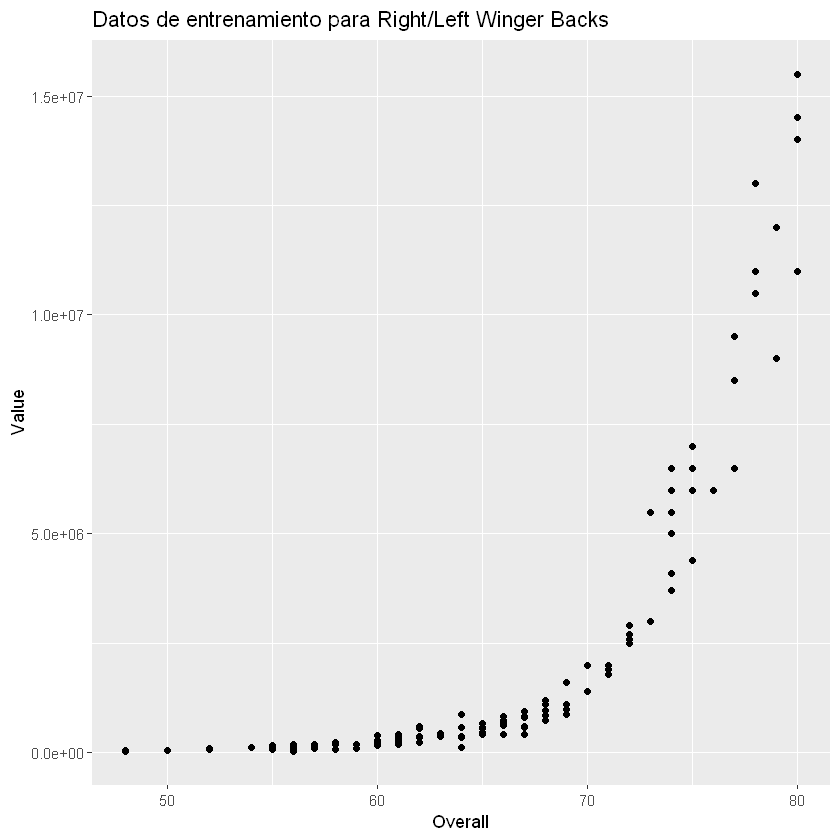

In [182]:
ggplot() + geom_point(data = fifaLRWB.train, aes(x = Overall, y = Value)) + 
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Datos de entrenamiento para Right/Left Winger Backs")

<a id='RForestRLWB'></a>
## Random Forest Left Right Winger Backs

In [183]:
#Creación del modelo
set.seed(1234)
fifaLRWB_randomForest <- randomForest(Value ~ Age+Overall, data = fifaLRWB.train, ntree = 500)

### Visualización del modelo creado

In [184]:
fifaLRWB_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaLRWB.train,      ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 770596427323
                    % Var explained: 93.35

In [185]:
#Importancia de las variables
fifaLRWB_randomForest$importance

IncNodePurity
Age     1.582684e+14 
Overall 1.295299e+15

In [186]:
#Predicción
y_fifaLRWB_predict <- predict(fifaLRWB_randomForest, fifaLRWB.train)

In [187]:
#Correlación entre la predicción
cor(fifaLRWB.train$Value, y_fifaLRWB_predict)

[1] 0.9913198

In [188]:
y_fifaLRWB_test_predict <- predict(fifaLRWB_randomForest, fifaLRWB.test)

In [189]:
cor(fifaLRWB.test$Value, y_fifaLRWB_test_predict)

[1] 0.9842479

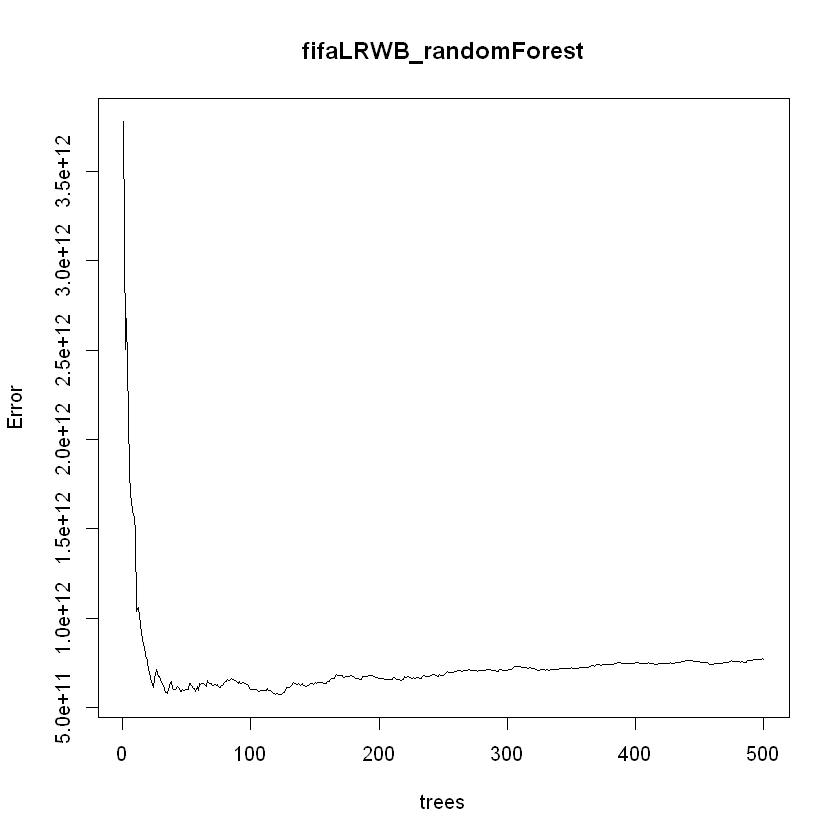

In [190]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaLRWB_randomForest)

#### Vemos que en los 200 árboles el modelo se estabiliza, entonces ajustamos el modelo 

In [191]:
#Ajuste del modelo
set.seed(1234)
fifaLRWB_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaLRWB.train, ntree = 200)

In [192]:
fifaLRWB_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaLRWB.train,      ntree = 200) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 1

          Mean of squared residuals: 662482523673
                    % Var explained: 94.28

In [193]:
#Predicción con el modelo ajustado
y_fifaLRWB_predict_ajustado <- predict(fifaLRWB_randomForest_ajustado, fifaLRWB.train)

In [194]:
#Correlación entre la predicción
cor(fifaLRWB.train$Value, y_fifaLRWB_predict_ajustado)

[1] 0.9919985

In [195]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaLRWB_predict_ajustado,fifaLRWB.train$Value)

RMSE     Rsquared          MAE 
4.938803e+05 9.840611e-01 2.128001e+05

In [196]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaLRWB.knn <- train(Value ~ Age+Overall,
      data = fifaLRWB,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaLRWB.knn

k-Nearest Neighbors 

165 samples
  2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 149, 148, 148, 149, 149, 148, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   3  420071.8  0.9851916  201576.2
   5  534787.1  0.9838175  250029.2
   7  628898.9  0.9812412  290565.7
   9  629053.3  0.9762020  296712.3
  11  645355.2  0.9751593  308341.4
  13  718668.2  0.9701545  336099.2
  15  773008.8  0.9690065  358967.9

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

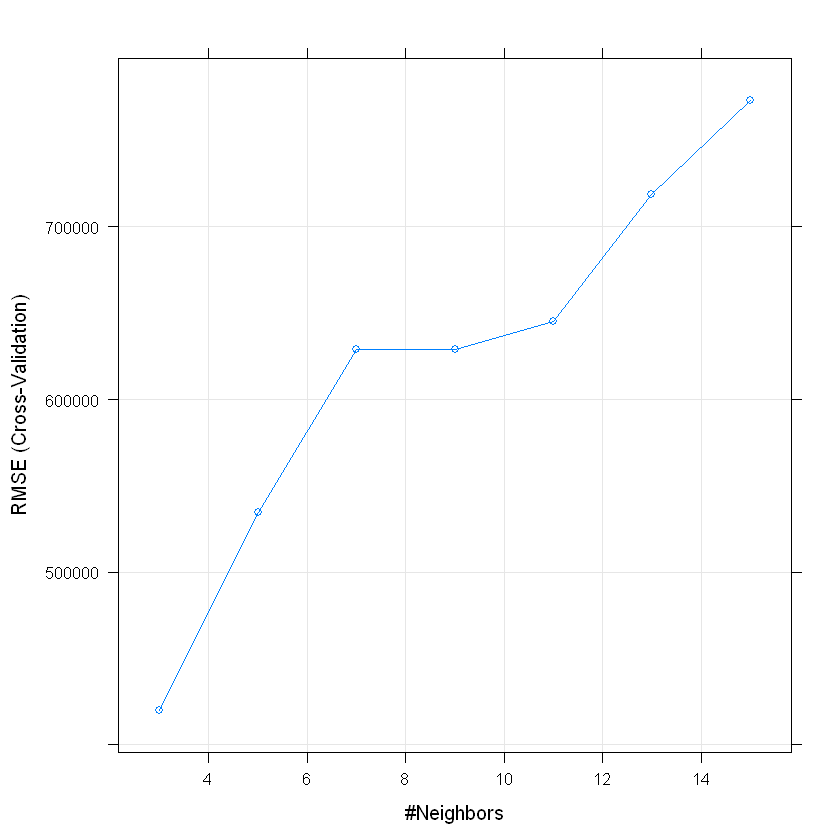

In [197]:
plot(fifaLRWB.knn)

<a id='AlgoritmoCDM'></a>
## Análisis de datos para Center Defender Midfielders

In [198]:
#Aplicamos PCA al dataset de Right/Left Winger Backs a todas las columnas menos "Name" y "Nationality" las cuales no fueron incluídas
names(fifaCDM)
fifaCDM.pca <- prcomp(fifaCDM [c(1:16)], center = TRUE,scale. = TRUE)
summary(fifaCDM.pca)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "ShortPassing"            
 [5] "StandingTackle"           "LongPassing"             
 [7] "Vision"                   "Interceptions"           
 [9] "Marking"                  "BallControl"             
[11] "Reactions"                "Stamina"                 
[13] "Aggression"               "Strength"                
[15] "International.Reputation" "Value"

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.9908 1.2857 1.0530 0.95781 0.79831 0.76577 0.68326
Proportion of Variance 0.5591 0.1033 0.0693 0.05734 0.03983 0.03665 0.02918
Cumulative Proportion  0.5591 0.6624 0.7317 0.78901 0.82884 0.86549 0.89466
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.58044 0.52929 0.50798 0.47484 0.45271 0.39582 0.35598
Proportion of Variance 0.02106 0.01751 0.01613 0.01409 0.01281 0.00979 0.00792
Cumulative Proportion  0.91572 0.93323 0.94936 0.96345 0.97626 0.98605 0.99397
                          PC15    PC16
Standard deviation     0.29786 0.08794
Proportion of Variance 0.00554 0.00048
Cumulative Proportion  0.99952 1.00000

In [199]:
summary(fifaCDM)

      Age           Overall        Potential     ShortPassing   StandingTackle 
 Min.   :16.00   Min.   :47.00   Min.   :52.0   Min.   :41.00   Min.   :39.00  
 1st Qu.:21.00   1st Qu.:62.00   1st Qu.:67.0   1st Qu.:63.00   1st Qu.:61.00  
 Median :25.00   Median :66.00   Median :71.0   Median :68.00   Median :66.00  
 Mean   :25.24   Mean   :66.31   Mean   :71.5   Mean   :67.69   Mean   :65.62  
 3rd Qu.:29.00   3rd Qu.:70.00   3rd Qu.:76.0   3rd Qu.:72.00   3rd Qu.:70.00  
 Max.   :39.00   Max.   :89.00   Max.   :90.0   Max.   :89.00   Max.   :90.00  
  LongPassing        Vision      Interceptions      Marking      BallControl  
 Min.   :34.00   Min.   :28.00   Min.   :38.00   Min.   :30.0   Min.   :37.0  
 1st Qu.:59.00   1st Qu.:53.00   1st Qu.:59.00   1st Qu.:58.0   1st Qu.:60.0  
 Median :64.00   Median :60.00   Median :65.00   Median :64.0   Median :65.0  
 Mean   :64.15   Mean   :59.32   Mean   :64.55   Mean   :63.2   Mean   :64.6  
 3rd Qu.:70.00   3rd Qu.:66.00   3rd Qu.:70.2

In [162]:
dim(fifaCDM)

[1] 948  16

<a id='RForestCDM'></a>
## Random Forest Central Defender Midfielders

Particionamos fifaCDM con el fin de obtener un data frame para realizar el entrenamiento y otro para probarlo

In [200]:
set.seed(1500)
indexes_fifaCDM <- createDataPartition(fifaCDM$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaCDM.train <- fifaCDM[indexes_fifaCDM,]
fifaCDM.test <- fifaCDM[-indexes_fifaCDM,]

In [201]:
#Verificamos los subconjuntos
names(fifaCDM.train)
dim(fifaCDM.train)

names(fifaCDM.test)
dim(fifaCDM.test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "ShortPassing"            
 [5] "StandingTackle"           "LongPassing"             
 [7] "Vision"                   "Interceptions"           
 [9] "Marking"                  "BallControl"             
[11] "Reactions"                "Stamina"                 
[13] "Aggression"               "Strength"                
[15] "International.Reputation" "Value"

[1] 760  16

[1] "Age"                      "Overall"                 
 [3] "Potential"                "ShortPassing"            
 [5] "StandingTackle"           "LongPassing"             
 [7] "Vision"                   "Interceptions"           
 [9] "Marking"                  "BallControl"             
[11] "Reactions"                "Stamina"                 
[13] "Aggression"               "Strength"                
[15] "International.Reputation" "Value"

[1] 188  16

Verificamos que la suma de la cantidad de líneas de fifaCDM.train y fifaCDM.test es igual a la cantidad total de lineas de fifaLRWB

In [202]:
nrow(fifaCDM.train) + nrow(fifaCDM.test) == nrow(fifaCDM)

[1] TRUE

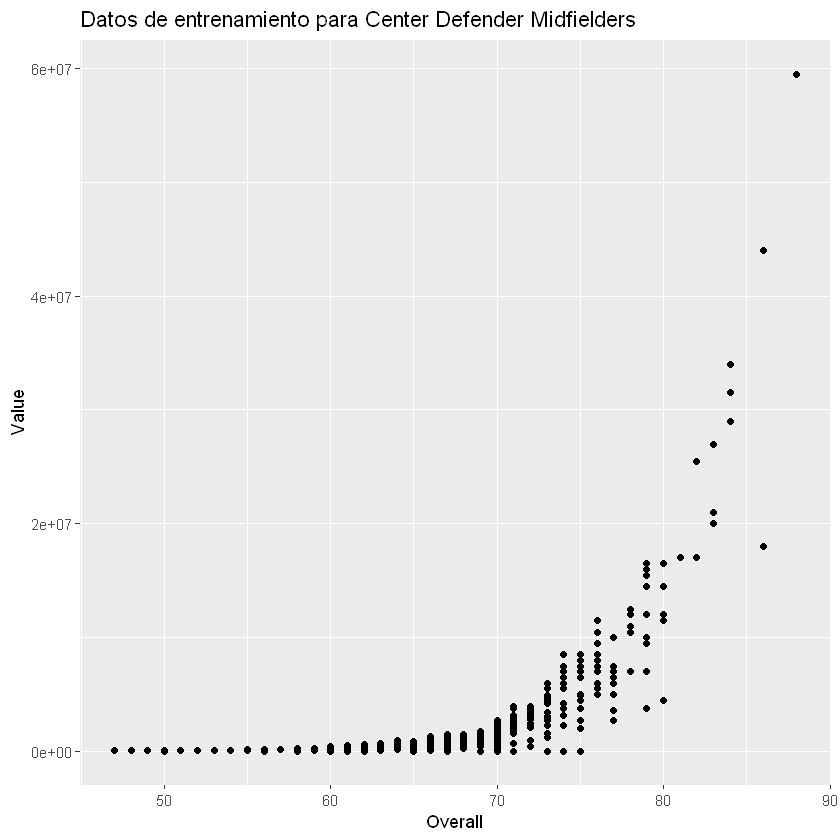

In [203]:
ggplot() + geom_point(data = fifaCDM.train, aes(x = Overall, y = Value)) + 
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Datos de entrenamiento para Center Defender Midfielders")

In [204]:
#Creación del modelo
set.seed(1234)
fifaCDM_randomForest <- randomForest(Value ~ Age+Overall, data = fifaCDM.train, ntree = 500)

### Visualización del modelo creado

In [205]:
fifaCDM_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaCDM.train,      ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 2.274323e+12
                    % Var explained: 88.96

In [206]:
#Importancia de las variables
fifaCDM_randomForest$importance

IncNodePurity
Age     1.165615e+15 
Overall 1.352300e+16

In [207]:
#Predicción
y_fifaCDM_predict <- predict(fifaCDM_randomForest, fifaCDM.train)

In [208]:
#Correlación entre la predicción
cor(fifaCDM.train$Value, y_fifaCDM_predict)

[1] 0.9882311

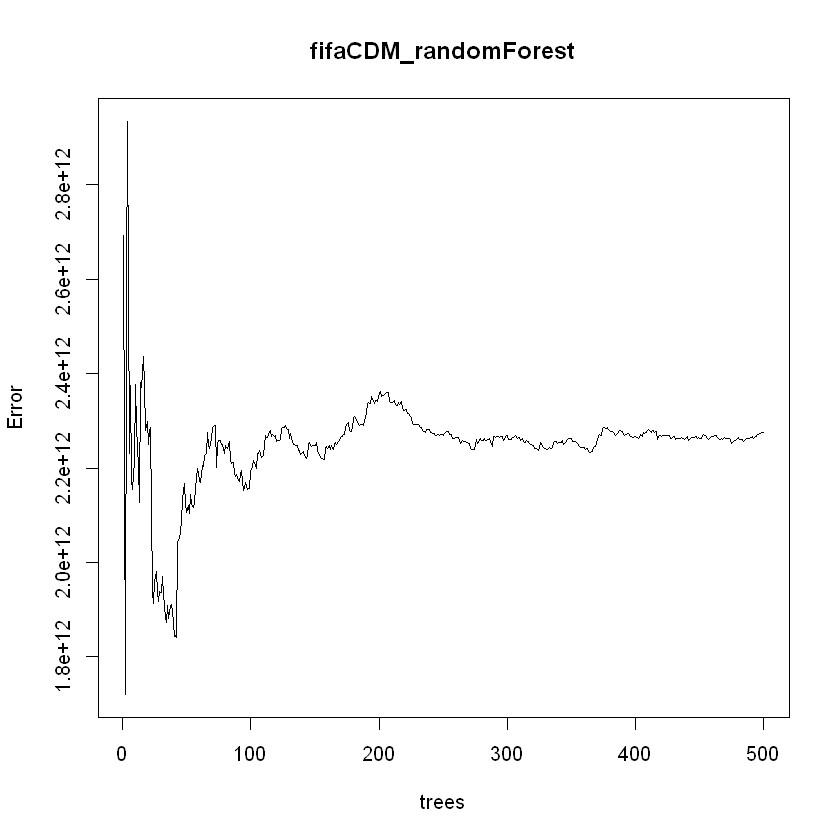

In [209]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaCDM_randomForest)

#### Vemos que en los 400 árboles el modelo se estabiliza, entonces ajustamos el modelo 

In [210]:
#Ajuste del modelo
set.seed(1234)
fifaCDM_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaCDM.train, ntree = 400)

In [211]:
fifaCDM_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaCDM.train,      ntree = 400) 
               Type of random forest: regression
                     Number of trees: 400
No. of variables tried at each split: 1

          Mean of squared residuals: 2.26707e+12
                    % Var explained: 89

In [212]:
#Predicción con el modelo ajustado
y_fifaCDM_predict_ajustado <- predict(fifaCDM_randomForest_ajustado, fifaCDM.train)

In [213]:
#Correlación entre la predicción
cor(fifaCDM.train$Value, y_fifaCDM_predict_ajustado)

[1] 0.9880791

In [214]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaCDM_predict_ajustado,fifaCDM.train$Value)

RMSE     Rsquared          MAE 
8.764756e+05 9.763003e-01 2.612879e+05

In [215]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaCDM.knn <- train(Value ~ Age+Overall,
      data = fifaCDM,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaCDM.knn

k-Nearest Neighbors 

948 samples
  2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 853, 852, 852, 854, 853, 853, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE     
   3   864530.5  0.9799661  235439.6
   5  1106885.2  0.9608344  262734.9
   7  1085110.0  0.9640233  267454.6
   9  1177535.9  0.9633198  284677.0
  11  1229868.1  0.9595191  294306.6
  13  1325986.9  0.9550292  315893.3
  15  1436424.7  0.9431949  328733.7

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

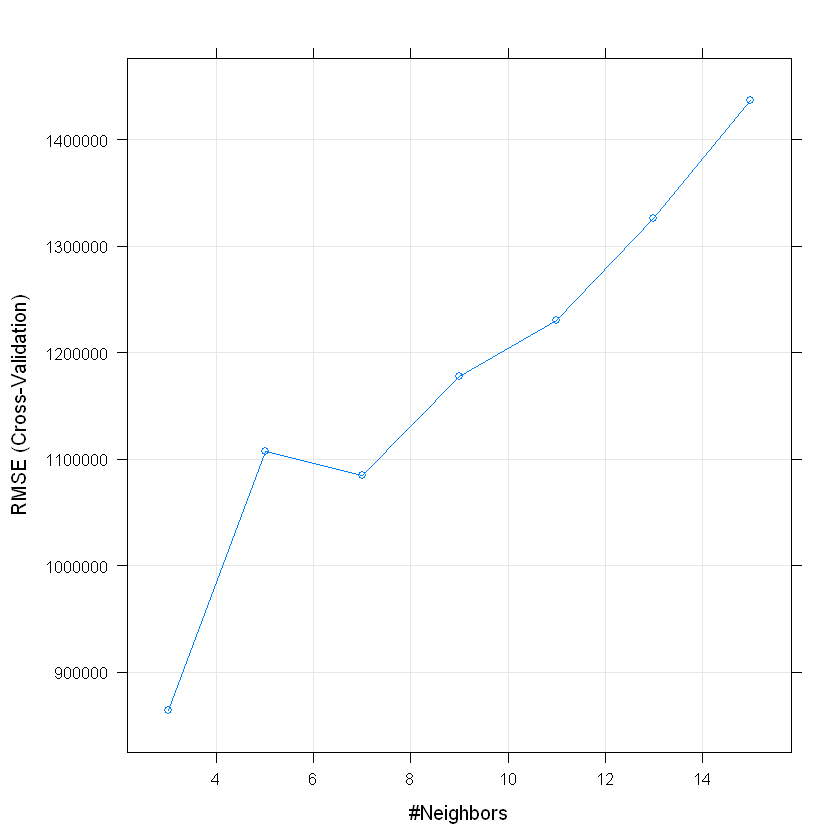

In [216]:
plot(fifaCDM.knn)

<a id='AlgoritmoCM'></a>
## Análisis de datos para Central Midfielders

Se asume de aquí en adelante que las variables a considerar por su grado de importancia son: "Age" y "Overall"

<a id='RForestCM'></a>
## Random Forest Center  Midfielders

In [217]:
set.seed(1500)
indexes_fifaCM <- createDataPartition(fifaCM$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaCM.train <- fifaCM[indexes_fifaCM,]
fifaCM.test <- fifaCM[-indexes_fifaCM,]

In [218]:
#Creación del modelo
library(randomForest)
set.seed(1234)
fifaCM_randomForest <- randomForest(Value ~ Age+Overall, data = fifaCM.train, ntree = 1500)

### Visualización del modelo creado

In [219]:
fifaCM_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaCM.train,      ntree = 1500) 
               Type of random forest: regression
                     Number of trees: 1500
No. of variables tried at each split: 1

          Mean of squared residuals: 2.489968e+12
                    % Var explained: 93.91

In [220]:
#Importancia de las variables
fifaCM_randomForest$importance

IncNodePurity
Age     4.350183e+15 
Overall 6.304082e+16

In [221]:
#Predicción
y_fifaCM_predict <- predict(fifaCM_randomForest, fifaCM.train)

In [222]:
#correlación entre la predicción
cor(fifaCM.train$Value, y_fifaCM_predict)

[1] 0.990437

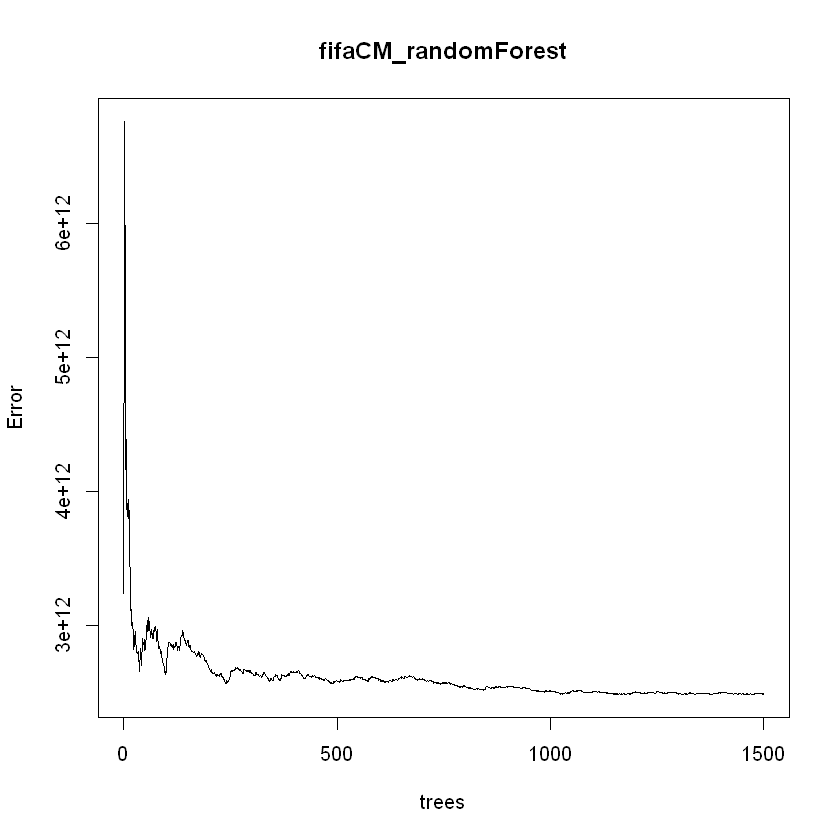

In [223]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaCM_randomForest)

#### Vemos que en los 1000 árboles el modelo se estabiliza

In [224]:
#Ajuste del modelo
set.seed(1234)
fifaCM_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaCM.train, ntree = 1000)

In [225]:
fifaCM_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaCM.train,      ntree = 1000) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 1

          Mean of squared residuals: 2.511809e+12
                    % Var explained: 93.86

In [226]:
#Predicción con el modelo ajustado
y_fifaCM_predict_ajustado <- predict(fifaCM_randomForest_ajustado, fifaCM.train)

In [227]:
#Correlación entre la predicción y nuestro dataset de entrenamiento.
rf_fifaCM_cor <- cor(fifaCM.train$Value, y_fifaCM_predict_ajustado)
rf_fifaCM_cor

[1] 0.9905843

In [228]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaCM_predict_ajustado,fifaCM.train$Value)

RMSE     Rsquared          MAE 
9.919504e+05 9.812572e-01 3.150961e+05

In [229]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaCM.knn <- train(Value ~ Age+Overall,
      data = fifaCM,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaCM.knn

k-Nearest Neighbors 

2180 samples
   2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1962, 1962, 1963, 1962, 1962, 1962, ... 
Resampling results across tuning parameters:

  k   RMSE     Rsquared   MAE     
   3  1114500  0.9731758  290878.3
   5  1140442  0.9727555  290527.3
   7  1169157  0.9722680  288900.8
   9  1304337  0.9663333  308205.6
  11  1353131  0.9638331  311110.7
  13  1409837  0.9625667  318415.7
  15  1486445  0.9578469  327931.5

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

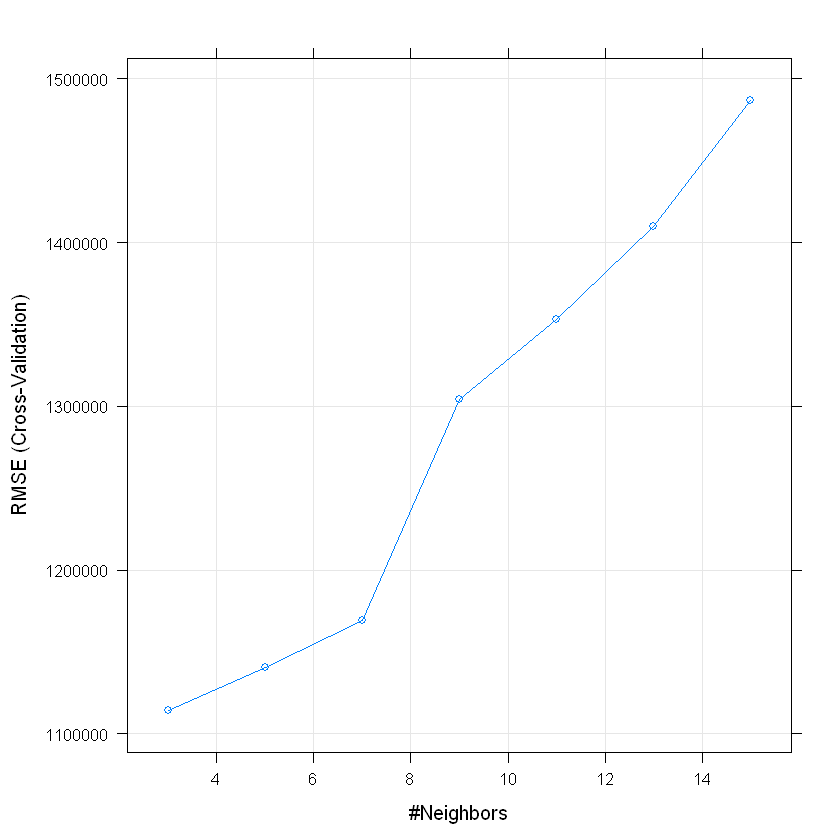

In [230]:
plot(fifaCM.knn)

<a id='AlgoritmoLRCM'></a>
## Análisis de datos para Left/Right Central Midfielders

Se asume de aquí en adelante que las variables a considerar por su grado de importancia son: "Age" y "Overall"

<a id='RForestLRCM'></a>
## Random Forest Left/Right Central Midfielders

In [231]:
set.seed(1500)
indexes_fifaLRDM <- createDataPartition(fifaLRDM$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaLRDM.train <- fifaCM[indexes_fifaLRDM,]
fifaLRDM.test <- fifaCM[-indexes_fifaLRDM,]

In [232]:
#Creación del modelo
set.seed(1234)
fifaLRDM_randomForest <- randomForest(Value ~ Age+Overall, data = fifaLRDM.train, ntree = 3000)

### Visualización del modelo creado

In [234]:
fifaLRDM_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaLRDM.train,      ntree = 3000) 
               Type of random forest: regression
                     Number of trees: 3000
No. of variables tried at each split: 1

          Mean of squared residuals: 1.385659e+13
                    % Var explained: 87.25

In [235]:
#Importancia de las variables
fifaLRDM_randomForest$importance

IncNodePurity
Age     3.648179e+15 
Overall 3.567055e+16

In [236]:
#Predicción
y_fifaLRDM_predict <- predict(fifaLRDM_randomForest, fifaLRDM.train)

In [237]:
#correlación entre la predicción
cor(fifaLRDM.train$Value, y_fifaLRDM_predict)

[1] 0.983174

In [238]:
y_fifaLRDM_test_predict <- predict(fifaLRDM_randomForest, fifaLRDM.test)

In [239]:
cor(fifaLRDM.test$Value, y_fifaLRDM_test_predict)

[1] 0.8420641

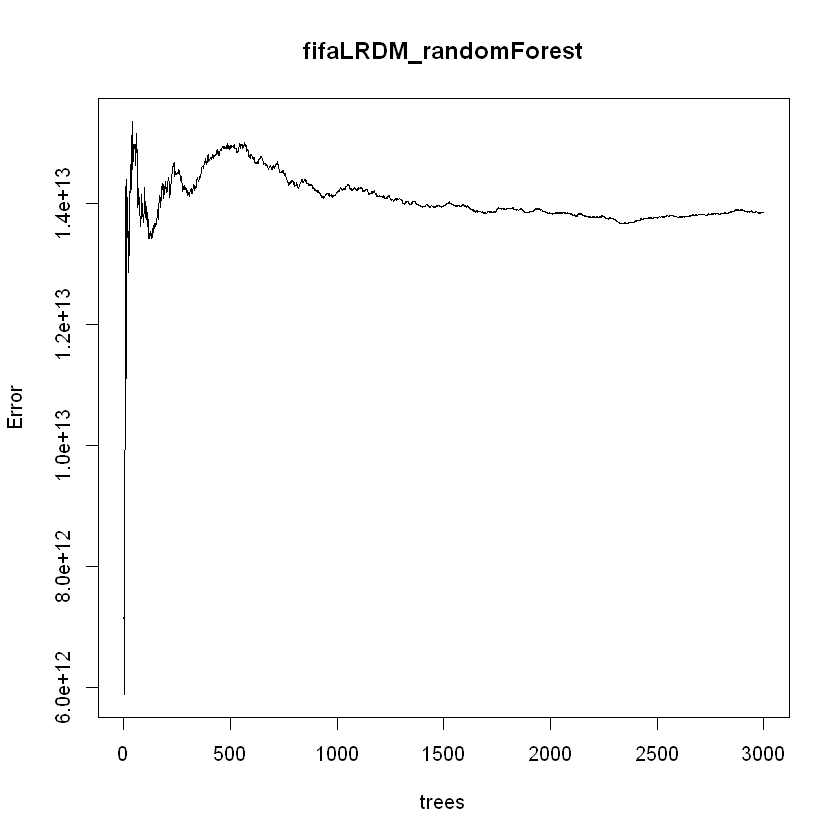

In [243]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaLRDM_randomForest)

#### Vemos que en los 2500 árboles el modelo se estabiliza

In [244]:
#Ajuste del modelo
set.seed(1234)
fifaLRDM_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaLRDM.train, ntree = 2500)

In [245]:
fifaLRDM_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaLRDM.train,      ntree = 2500) 
               Type of random forest: regression
                     Number of trees: 2500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.376704e+13
                    % Var explained: 87.33

In [246]:
#Predicción con el modelo ajustado
y_fifaLRDM_predict_ajustado <- predict(fifaLRDM_randomForest_ajustado, fifaLRDM.train)

In [247]:
#Correlación entre la predicción y nuestro dataset de entrenamiento.
rf_fifaLRDM_cor <- cor(fifaLRDM.train$Value, y_fifaLRDM_predict_ajustado)
rf_fifaLRDM_cor

[1] 0.9832026

In [248]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaLRDM_predict_ajustado,fifaLRDM.train$Value)

RMSE     Rsquared          MAE 
2.222157e+06 9.666874e-01 9.054879e+05

In [249]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaLRDM.knn <- train(Value ~ Age+Overall,
      data = fifaGK,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaLRDM.knn

k-Nearest Neighbors 

2025 samples
   2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1823, 1823, 1822, 1822, 1823, 1823, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE     
   3   749064.8  0.9721560  178859.3
   5   816270.2  0.9735385  183394.4
   7   937225.4  0.9722882  199144.4
   9   997442.9  0.9698271  203201.8
  11  1112886.4  0.9618272  218553.5
  13  1175638.3  0.9587641  225490.1
  15  1282018.3  0.9529251  240557.5

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

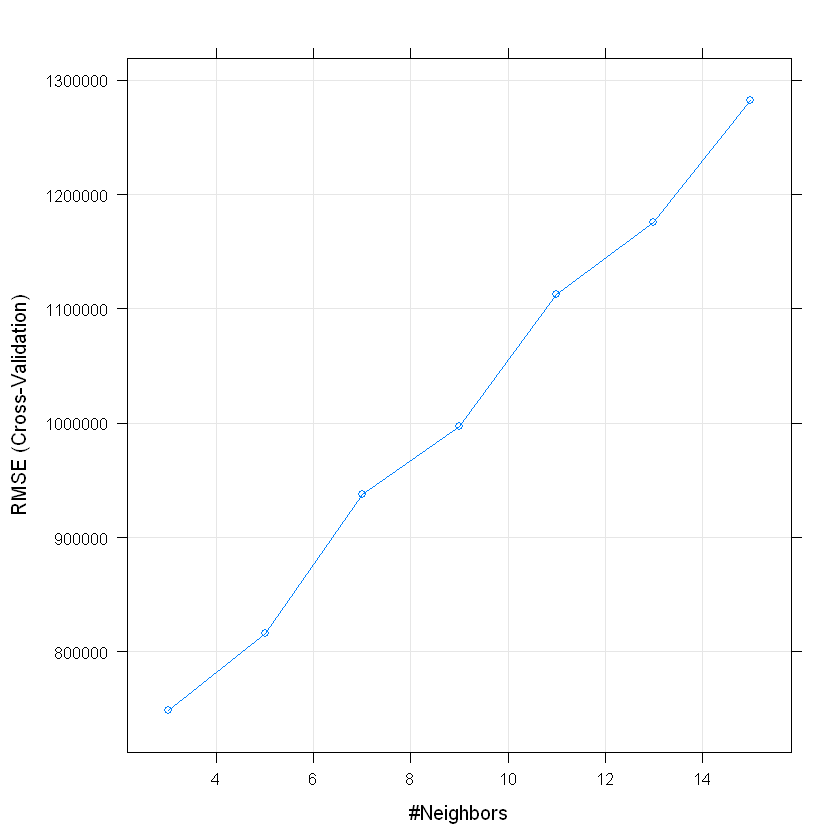

In [250]:
plot(fifaLRDM.knn)

<a id='AlgoritmoCAM'></a>
## Análisis de datos para Central Attacking Midfielders

<a id='RForestCAM'></a>
## Random Forest Central Attacking Midfielders

In [251]:
set.seed(1500)
indexes_fifaCAM <- createDataPartition(fifaCAM$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaCAM.train <- fifaCM[indexes_fifaCAM,]
fifaCAM.test <- fifaCM[-indexes_fifaCAM,]

In [252]:
#Creación del modelo
set.seed(1234)
fifaCAM_randomForest <- randomForest(Value ~ Age+Overall, data = fifaCAM.train, ntree = 2000)

In [253]:
fifaCAM_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaCAM.train,      ntree = 2000) 
               Type of random forest: regression
                     Number of trees: 2000
No. of variables tried at each split: 1

          Mean of squared residuals: 4.01784e+12
                    % Var explained: 93.96

In [254]:
#Importancia de las variables
fifaCAM_randomForest$importance

IncNodePurity
Age     3.302853e+15 
Overall 4.465188e+16

In [255]:
#Predicción
y_fifaCAM_predict <- predict(fifaCAM_randomForest, fifaCAM.train)

In [256]:
#correlación entre la predicción
cor(fifaCAM.train$Value, y_fifaCAM_predict)

[1] 0.9903271

In [257]:
y_fifaCAM_test_predict <- predict(fifaCAM_randomForest, fifaCAM.test)

In [258]:
cor(fifaCAM.test$Value, y_fifaCAM_test_predict)

[1] 0.9634934

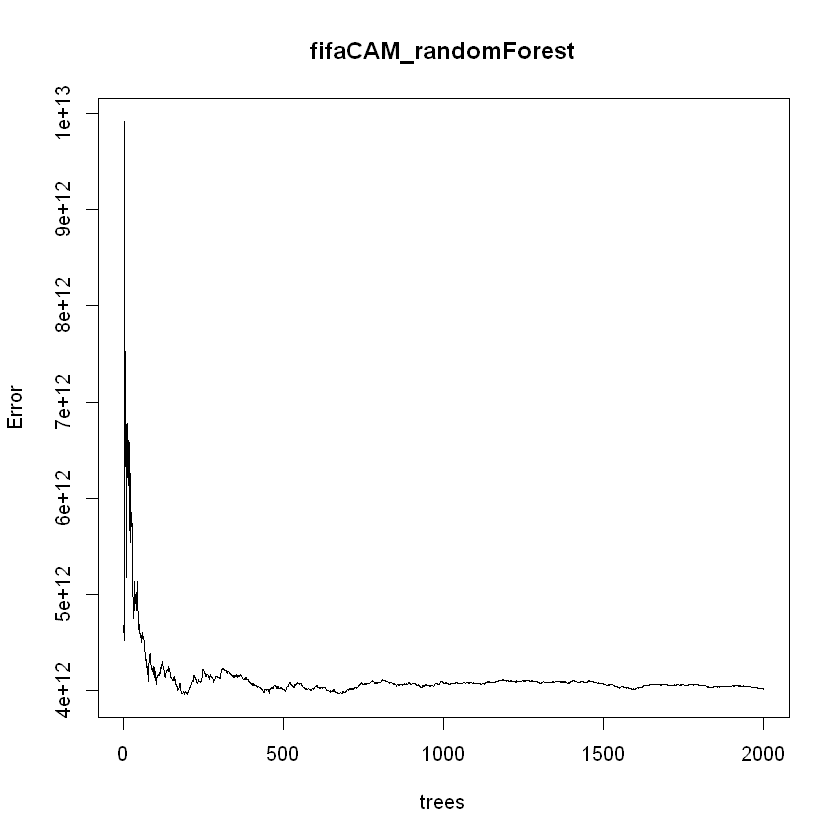

In [259]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaCAM_randomForest)

#### Vemos que en los 1000 árboles el modelo se estabiliza, entonces ajustamos el modelo

In [260]:
#Ajuste del modelo
set.seed(1234)
fifaCAM_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaCAM.train, ntree = 1000)

In [261]:
fifaCAM_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaCAM.train,      ntree = 1000) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 1

          Mean of squared residuals: 4.081209e+12
                    % Var explained: 93.87

In [262]:
#Predicción con el modelo ajustado
y_fifaCAM_predict_ajustado <- predict(fifaCAM_randomForest_ajustado, fifaCAM.train)

In [263]:
#Correlación entre la predicción y nuestro dataset de entrenamiento.
rf_fifaCAM_cor <- cor(fifaCAM.train$Value, y_fifaCAM_predict_ajustado)
rf_fifaCAM_cor

[1] 0.9903891

In [264]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaCAM_predict_ajustado,fifaCAM.train$Value)

RMSE     Rsquared          MAE 
1.286292e+06 9.808706e-01 5.515563e+05

In [265]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaCAM.knn <- train(Value ~ Age+Overall,
      data = fifaCAM,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaCAM.knn

k-Nearest Neighbors 

958 samples
  2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 863, 863, 862, 862, 863, 863, ... 
Resampling results across tuning parameters:

  k   RMSE     Rsquared   MAE     
   3  1032978  0.9821160  290935.4
   5  1073759  0.9820195  291607.0
   7  1245166  0.9765250  323609.2
   9  1459520  0.9714964  354717.1
  11  1606435  0.9651708  381230.7
  13  1662839  0.9620389  389094.2
  15  1723649  0.9596715  402470.3

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

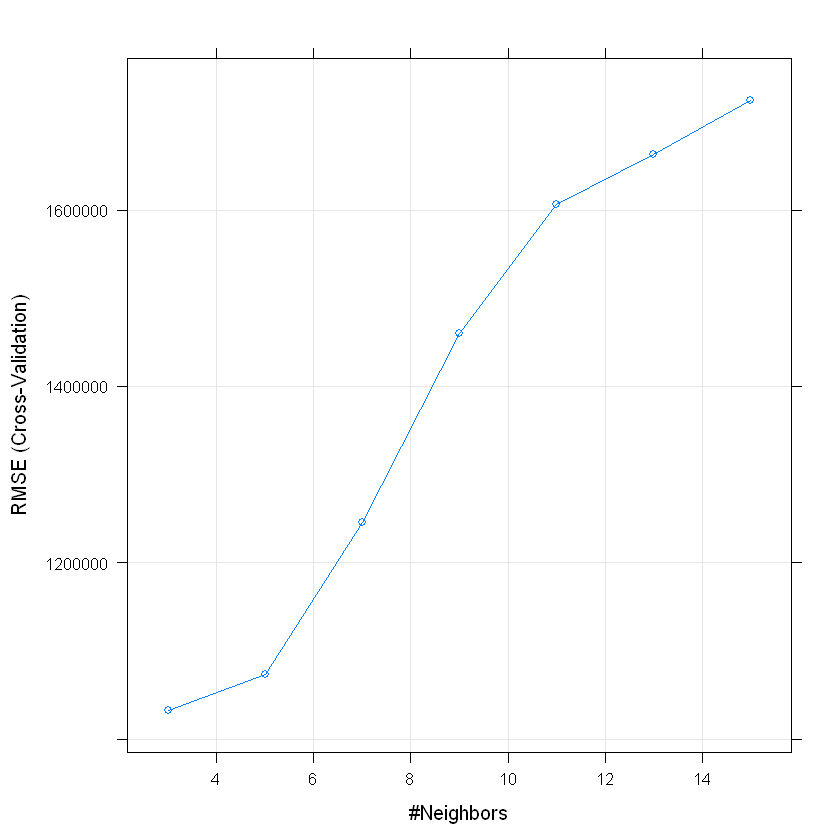

In [266]:
plot(fifaCAM.knn)

<a id='AlgoritmoLRM'></a>
## Análisis de datos para Left/Right Midfielders

In [267]:
#Aplicamos PCA al dataset de defensa central a todas las columnas menos "Name" y "Nationality" las cuales no fueron incluídas
names(fifaLRM)
fifaLRM.pca <- prcomp(fifaLRM [c(1:17)], center = TRUE,scale. = TRUE)
summary(fifaLRM.pca)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Crossing"                
 [5] "ShortPassing"             "Agility"                 
 [7] "Acceleration"             "Vision"                  
 [9] "SprintSpeed"              "LongPassing"             
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "Stamina"                 
[15] "Positioning"              "International.Reputation"
[17] "Value"

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.9774 1.5095 1.18805 0.95077 0.86135 0.73136 0.69409
Proportion of Variance 0.5214 0.1340 0.08303 0.05317 0.04364 0.03146 0.02834
Cumulative Proportion  0.5214 0.6555 0.73852 0.79169 0.83533 0.86680 0.89514
                           PC8     PC9   PC10    PC11    PC12    PC13   PC14
Standard deviation     0.57159 0.52496 0.5032 0.49689 0.45576 0.37999 0.3570
Proportion of Variance 0.01922 0.01621 0.0149 0.01452 0.01222 0.00849 0.0075
Cumulative Proportion  0.91436 0.93057 0.9455 0.95999 0.97221 0.98070 0.9882
                          PC15    PC16    PC17
Standard deviation     0.32177 0.28732 0.12067
Proportion of Variance 0.00609 0.00486 0.00086
Cumulative Proportion  0.99429 0.99914 1.00000

In [273]:
#Particionamos fifaLRM con el fin de obtener un data frame para realizar el entrenamiento 
#y otro para probarlo
set.seed(1500)
indexes_fifaLRM <- createDataPartition(fifaLRM$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaLRM.train <- fifaLRM[indexes_fifaLRM,]
fifaLRM.test <- fifaLRM[-indexes_fifaLRM,]

In [274]:
#Verificamos los subconjuntos
names(fifaLRM.train)
dim(fifaLRM.train)

names(fifaLRM.test)
dim(fifaLRM.test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Crossing"                
 [5] "ShortPassing"             "Agility"                 
 [7] "Acceleration"             "Vision"                  
 [9] "SprintSpeed"              "LongPassing"             
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "Stamina"                 
[15] "Positioning"              "International.Reputation"
[17] "Value"

[1] 1777   17

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Crossing"                
 [5] "ShortPassing"             "Agility"                 
 [7] "Acceleration"             "Vision"                  
 [9] "SprintSpeed"              "LongPassing"             
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "Stamina"                 
[15] "Positioning"              "International.Reputation"
[17] "Value"

[1] 442  17

In [275]:
#Verificamos que la suma de la cantidad de líneas de fifaLRM.train y fifaLRM.test es igual 
#a la cantidad total de lineas de fifaLRM
nrow(fifaLRM.train) + nrow(fifaLRM.test) == nrow(fifaLRM)

[1] TRUE

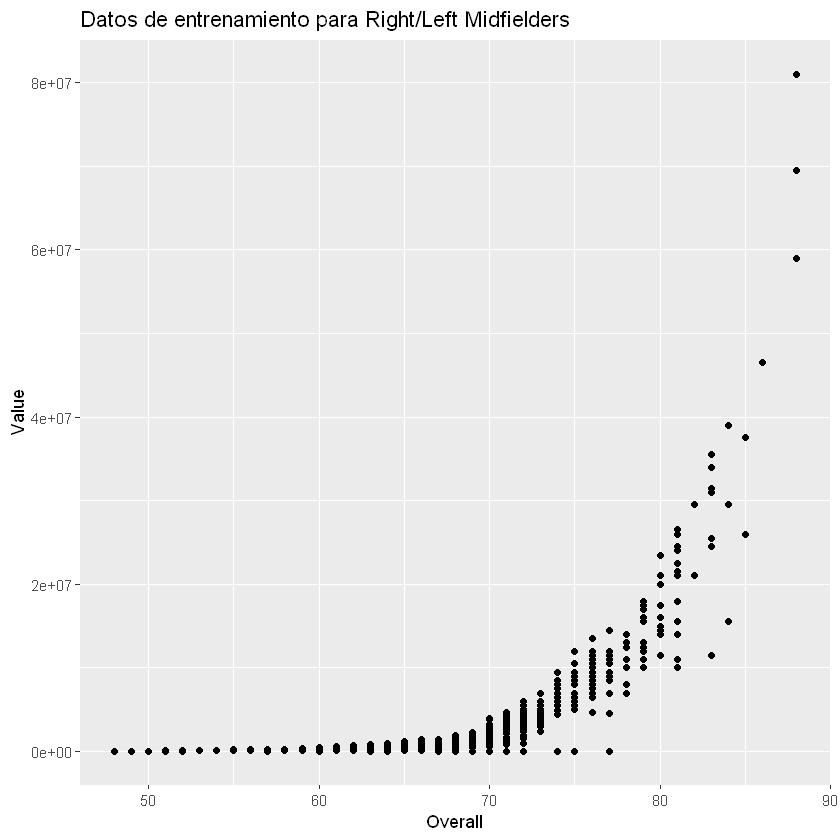

In [276]:
ggplot() + geom_point(data = fifaLRM.train, aes(x = Overall, y = Value)) + 
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Datos de entrenamiento para Right/Left Midfielders")

<a id='RForestCAM'></a>
## Random Forest Right/Left Midfielders

In [277]:
#Creación del modelo
set.seed(1234)
fifaLRM_randomForest <- randomForest(Value~Age+Overall, data = fifaLRM.train, na.action=na.exclude,  ntree = 500)

### Visualización del modelo creado

In [278]:
fifaLRM_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaLRM.train,      ntree = 500, na.action = na.exclude) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 2.699565e+12
                    % Var explained: 90.14

In [279]:
#Importancia de las variables
fifaLRM_randomForest$importance

IncNodePurity
Age     2.840021e+15 
Overall 4.254604e+16

In [280]:
#Predicción
y_fifaLRM_predict <- predict(fifaLRM_randomForest, fifaLRM.train)

In [281]:
#Correlación entre la predicción
cor(fifaLRM.train$Value, y_fifaLRM_predict)

[1] 0.9886639

In [282]:
y_fifaLRM_test_predict <- predict(fifaLRM_randomForest, fifaLRM.test)

In [283]:
cor(fifaLRM.test$Value, y_fifaLRM_test_predict)

[1] 0.995131

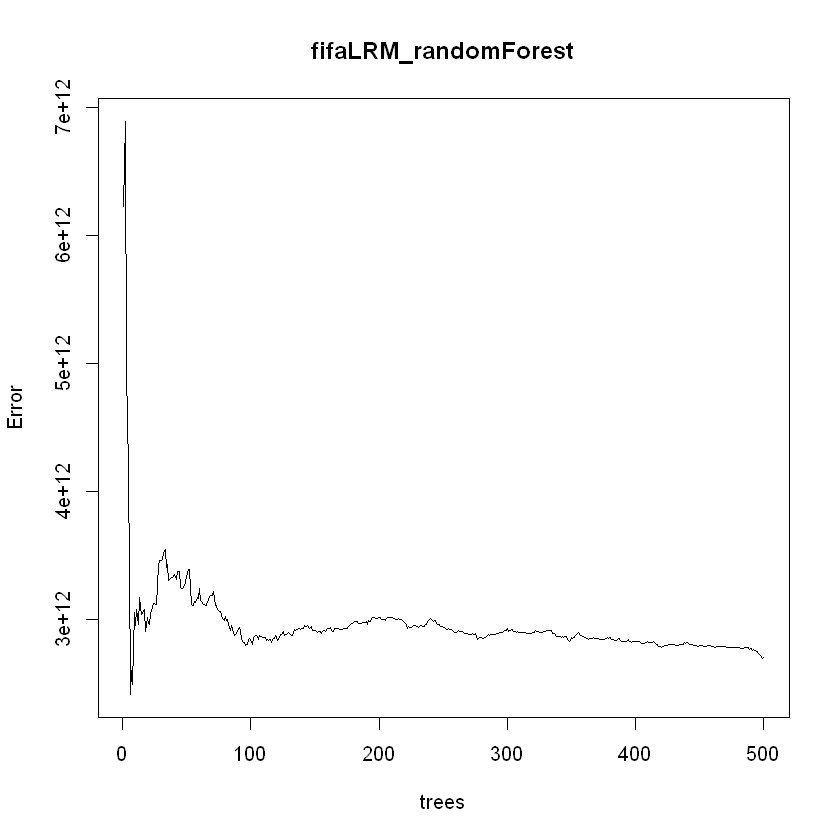

In [284]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaLRM_randomForest)

#### Vemos que en los 400 árboles el modelo se estabiliza, entonces ajustamos el modelo 

In [285]:
#Ajuste del modelo
set.seed(1234)
fifaLRM_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaLRM.train, ntree = 400)

In [286]:
fifaLRM_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaLRM.train,      ntree = 400) 
               Type of random forest: regression
                     Number of trees: 400
No. of variables tried at each split: 1

          Mean of squared residuals: 2.826175e+12
                    % Var explained: 89.68

In [287]:
#Predicción con el modelo ajustado
y_fifaLRM_predict_ajustado <- predict(fifaLRM_randomForest_ajustado, fifaLRM.train)

In [288]:
#Correlación entre la predicción
cor(fifaLRM.train$Value, y_fifaLRM_predict_ajustado)

[1] 0.9883654

In [289]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaLRM_predict_ajustado,fifaLRM.train$Value)

RMSE     Rsquared          MAE 
9.599210e+05 9.768661e-01 2.959269e+05

In [290]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaLRM.knn <- train(Value ~ Age+Overall,
      data = fifaLRM,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaLRM.knn

k-Nearest Neighbors 

2219 samples
   2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1997, 1998, 1996, 1998, 1998, 1998, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE     
   3   981415.4  0.9665672  230056.3
   5  1002040.7  0.9695052  238077.8
   7  1052700.7  0.9680992  247171.7
   9  1123442.0  0.9665685  265547.1
  11  1155357.9  0.9644023  269893.0
  13  1233907.3  0.9608832  279765.6
  15  1315414.1  0.9555210  291814.0

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

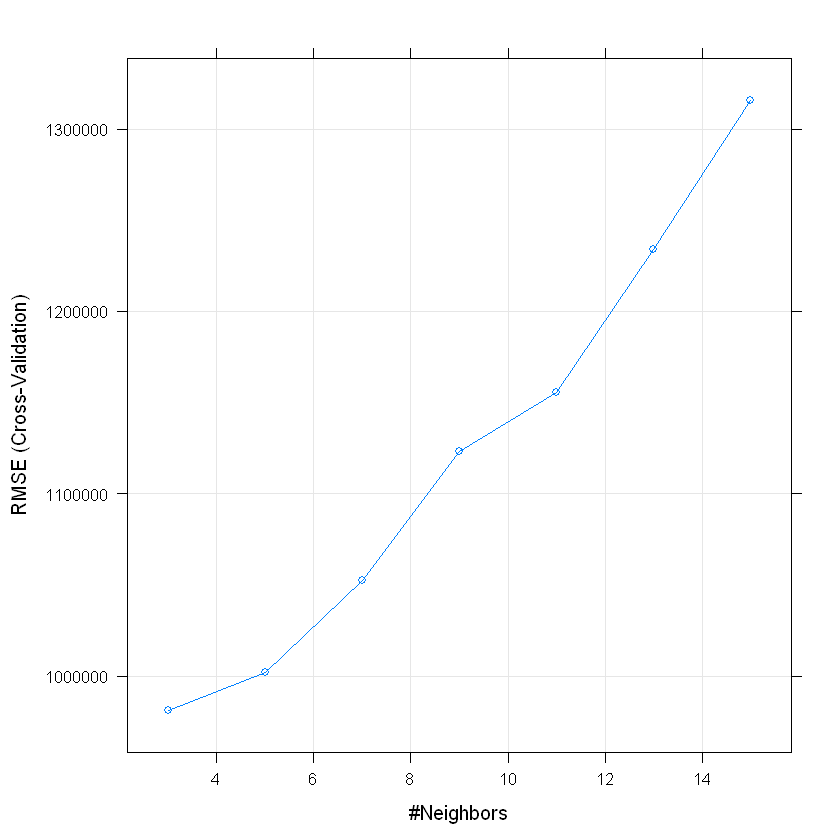

In [291]:
plot(fifaLRM.knn)

<a id='AlgoritmoLRAW'></a>
## Análisis de datos para Left/Right Attacking Wingers

In [292]:
#Aplicamos PCA al dataset de defensa central a todas las columnas menos "Name" y "Nationality" las cuales no fueron incluídas
names(fifaLRAW)
fifaLRAW.pca <- prcomp(fifaLRAW [c(1:17)], center = TRUE,scale. = TRUE)
summary(fifaLRAW.pca)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Crossing"                
 [5] "ShortPassing"             "HeadingAccuracy"         
 [7] "Acceleration"             "Vision"                  
 [9] "SprintSpeed"              "ShotPower"               
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "LongShots"               
[15] "Positioning"              "International.Reputation"
[17] "Value"

Importance of components:
                          PC1    PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     3.0346 1.3910 1.17145 0.99531 0.9238 0.79102 0.62067
Proportion of Variance 0.5417 0.1138 0.08072 0.05827 0.0502 0.03681 0.02266
Cumulative Proportion  0.5417 0.6555 0.73622 0.79450 0.8447 0.88150 0.90416
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.52728 0.51387 0.46950 0.43982 0.42808 0.39197 0.36395
Proportion of Variance 0.01635 0.01553 0.01297 0.01138 0.01078 0.00904 0.00779
Cumulative Proportion  0.92052 0.93605 0.94902 0.96040 0.97118 0.98021 0.98801
                          PC15    PC16    PC17
Standard deviation     0.32346 0.29043 0.12214
Proportion of Variance 0.00615 0.00496 0.00088
Cumulative Proportion  0.99416 0.99912 1.00000

In [293]:
summary(fifaLRAW)

      Age           Overall        Potential       Crossing      ShortPassing  
 Min.   :16.00   Min.   :47.00   Min.   :52.0   Min.   :25.00   Min.   :36.00  
 1st Qu.:21.00   1st Qu.:63.00   1st Qu.:69.0   1st Qu.:57.00   1st Qu.:59.00  
 Median :23.00   Median :67.00   Median :73.0   Median :63.00   Median :64.00  
 Mean   :23.79   Mean   :67.05   Mean   :73.2   Mean   :62.11   Mean   :63.93  
 3rd Qu.:26.00   3rd Qu.:71.00   3rd Qu.:77.0   3rd Qu.:68.00   3rd Qu.:69.00  
 Max.   :38.00   Max.   :92.00   Max.   :93.0   Max.   :90.00   Max.   :89.00  
 HeadingAccuracy  Acceleration       Vision       SprintSpeed   
 Min.   :18.00   Min.   :42.00   Min.   :34.00   Min.   :42.00  
 1st Qu.:41.00   1st Qu.:73.00   1st Qu.:55.00   1st Qu.:72.00  
 Median :49.00   Median :78.00   Median :61.00   Median :77.00  
 Mean   :49.47   Mean   :77.71   Mean   :61.73   Mean   :76.75  
 3rd Qu.:58.00   3rd Qu.:84.00   3rd Qu.:68.00   3rd Qu.:83.00  
 Max.   :87.00   Max.   :97.00   Max.   :90.00   M

In [294]:
dim(fifaLRAW)

[1] 793  17

In [295]:
#Particionamos fifaLRAW con el fin de obtener un data frame para realizar el entrenamiento
#y otro para probarlo
set.seed(1500)
indexes_fifaLRAW <- createDataPartition(fifaLRAW$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaLRAW.train <- fifaLRAW[indexes_fifaLRAW,]
fifaLRAW.test <- fifaLRAW[-indexes_fifaLRAW,]

In [296]:
#Verificamos los subconjuntos
names(fifaLRAW.train)
dim(fifaLRAW.train)

names(fifaLRAW.test)
dim(fifaLRAW.test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Crossing"                
 [5] "ShortPassing"             "HeadingAccuracy"         
 [7] "Acceleration"             "Vision"                  
 [9] "SprintSpeed"              "ShotPower"               
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "LongShots"               
[15] "Positioning"              "International.Reputation"
[17] "Value"

[1] 636  17

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Crossing"                
 [5] "ShortPassing"             "HeadingAccuracy"         
 [7] "Acceleration"             "Vision"                  
 [9] "SprintSpeed"              "ShotPower"               
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "LongShots"               
[15] "Positioning"              "International.Reputation"
[17] "Value"

[1] 157  17

In [297]:
nrow(fifaLRAW.train) + nrow(fifaLRAW.test) == nrow(fifaLRAW)

[1] TRUE

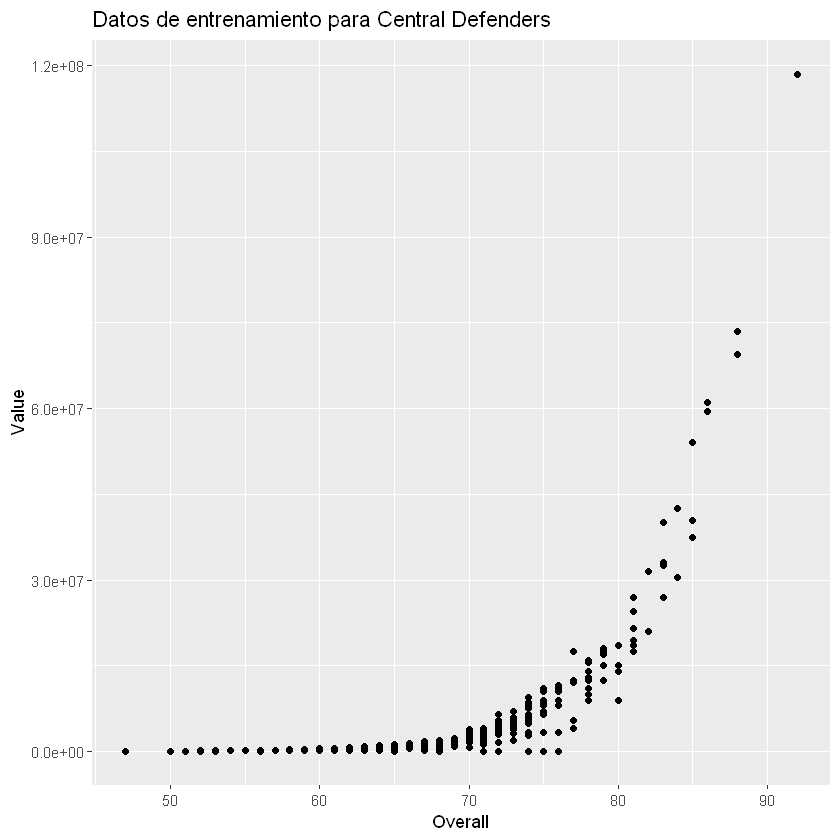

In [298]:
ggplot() + geom_point(data = fifaLRAW.train, aes(x = Overall, y = Value)) + 
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Datos de entrenamiento para Central Defenders")

<a id='RForestLRAW'></a>
## Random Forest Left/Right Attacking Wingers

In [299]:
#Creación del modelo
set.seed(1234)
fifaLRAW_randomForest <- randomForest(Value ~ Age + Overall, data = fifaLRAW.train, ntree = 500)

In [300]:
fifaLRAW_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaLRAW.train,      ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 6.612907e+12
                    % Var explained: 92.32

In [301]:
#Importancia de las variables
fifaLRAW_randomForest$importance

IncNodePurity
Age     3.255610e+15 
Overall 4.805867e+16

In [302]:
#Predicción
y_fifaLRAW_predict <- predict(fifaLRAW_randomForest, fifaLRAW.train)

In [303]:
#Correlación entre la predicción
cor(fifaLRAW.train$Value, y_fifaLRAW_predict)

[1] 0.9895718

In [304]:
y_fifaLRAW_test_predict <- predict(fifaLRAW_randomForest, fifaLRAW.test)

In [305]:
cor(fifaLRAW.test$Value, y_fifaLRAW_test_predict)

[1] 0.9894267

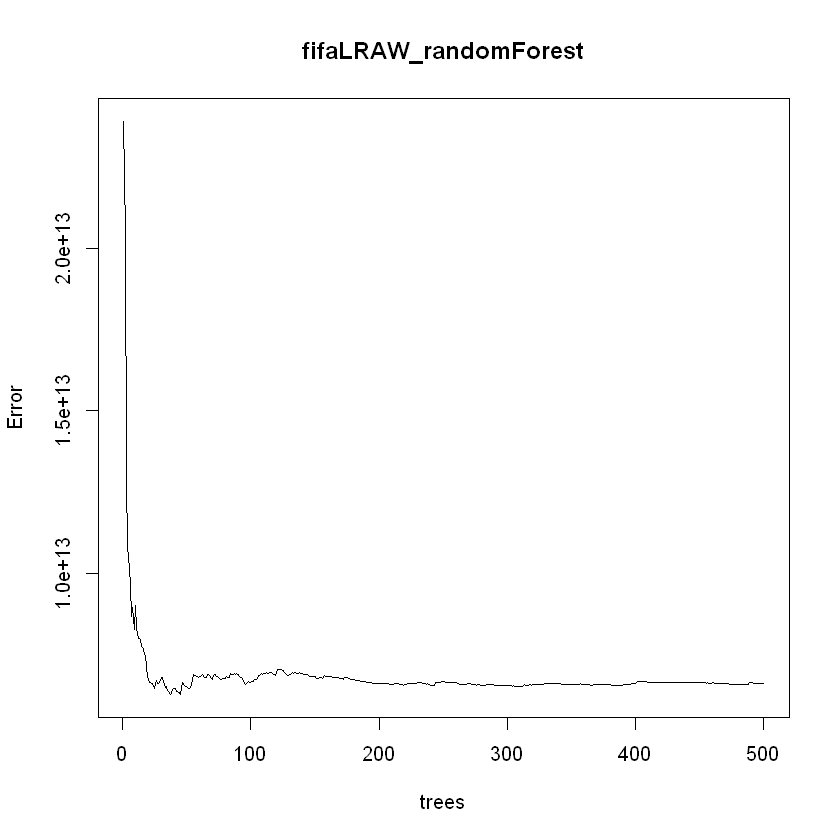

In [306]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaLRAW_randomForest)

#### Vemos que en los 200 árboles el modelo se estabiliza, entonces ajustamos el modelo 

In [307]:
#Ajuste del modelo
set.seed(1234)
fifaLRAW_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaLRAW.train, ntree = 200)

In [308]:
fifaLRAW_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaLRAW.train,      ntree = 200) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 1

          Mean of squared residuals: 6.59951e+12
                    % Var explained: 92.33

In [309]:
#Predicción con el modelo ajustado
y_fifaLRAW_predict_ajustado <- predict(fifaLRAW_randomForest_ajustado, fifaLRAW.train)

In [310]:
#Correlación entre la predicción
cor(fifaLRAW.train$Value, y_fifaLRAW_predict_ajustado)

[1] 0.9897767

In [311]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaLRAW_predict_ajustado,fifaLRAW.train$Value)

RMSE     Rsquared          MAE 
1.585527e+06 9.796580e-01 5.059405e+05

In [312]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaLRAW.knn <- train(Value ~ Age+Overall,
      data = fifaLRAW,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaLRAW.knn

k-Nearest Neighbors 

793 samples
  2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 715, 713, 716, 714, 713, 713, ... 
Resampling results across tuning parameters:

  k   RMSE     Rsquared   MAE     
   3  1458586  0.9769461  411615.9
   5  1753782  0.9729350  452798.5
   7  1590799  0.9747271  430486.6
   9  1744827  0.9740392  467364.8
  11  1913731  0.9690230  481749.8
  13  2140727  0.9655647  521609.8
  15  2287415  0.9632328  551261.0

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

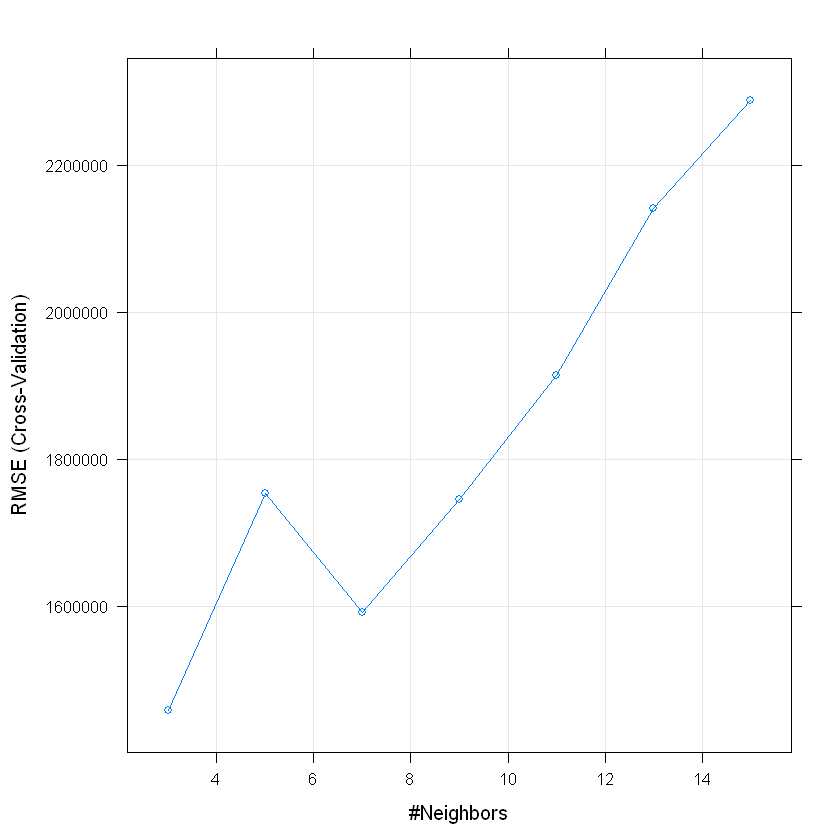

In [313]:
plot(fifaLRAW.knn)

<a id='AlgoritmoCLRF'></a>
## Análisis de datos para Center/Left/Right Forwarders

In [314]:
#Aplicamos PCA al dataset de Center/Left/Right Forwarders a todas las columnas menos "Name" y "Nationality" las cuales no fueron incluídas
names(fifaCLRF)
fifaCLRF.pca <- prcomp(fifaCLRF [c(1:17)], center = TRUE,scale. = TRUE)
summary(fifaCLRF.pca)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Finishing"               
 [5] "ShortPassing"             "HeadingAccuracy"         
 [7] "Acceleration"             "Vision"                  
 [9] "SprintSpeed"              "ShotPower"               
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "LongShots"               
[15] "Positioning"              "International.Reputation"
[17] "Value"

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.2477 1.4539 1.00808 0.97380 0.79356 0.63263 0.52704
Proportion of Variance 0.6204 0.1244 0.05978 0.05578 0.03704 0.02354 0.01634
Cumulative Proportion  0.6204 0.7448 0.80457 0.86035 0.89739 0.92093 0.93727
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.48393 0.43214 0.38370 0.35621 0.32289 0.29070 0.27620
Proportion of Variance 0.01378 0.01098 0.00866 0.00746 0.00613 0.00497 0.00449
Cumulative Proportion  0.95105 0.96203 0.97069 0.97816 0.98429 0.98926 0.99375
                          PC15   PC16    PC17
Standard deviation     0.24071 0.1935 0.10443
Proportion of Variance 0.00341 0.0022 0.00064
Cumulative Proportion  0.99716 0.9994 1.00000

In [315]:
summary(fifaCLRF)

      Age          Overall       Potential      Finishing      ShortPassing  
 Min.   :17.0   Min.   :50.0   Min.   :58.0   Min.   :48.00   Min.   :44.00  
 1st Qu.:21.0   1st Qu.:62.0   1st Qu.:69.0   1st Qu.:61.00   1st Qu.:60.00  
 Median :24.0   Median :67.0   Median :74.0   Median :65.00   Median :65.00  
 Mean   :24.6   Mean   :68.1   Mean   :73.7   Mean   :66.17   Mean   :65.91  
 3rd Qu.:28.0   3rd Qu.:73.0   3rd Qu.:79.0   3rd Qu.:70.00   3rd Qu.:72.00  
 Max.   :38.0   Max.   :94.0   Max.   :94.0   Max.   :95.00   Max.   :90.00  
 HeadingAccuracy  Acceleration       Vision      SprintSpeed      ShotPower    
 Min.   :27.00   Min.   :34.00   Min.   :45.0   Min.   :43.00   Min.   :42.00  
 1st Qu.:46.00   1st Qu.:68.00   1st Qu.:58.0   1st Qu.:67.00   1st Qu.:60.00  
 Median :55.00   Median :75.00   Median :65.0   Median :74.00   Median :67.00  
 Mean   :54.21   Mean   :74.04   Mean   :65.2   Mean   :72.57   Mean   :66.77  
 3rd Qu.:61.00   3rd Qu.:79.00   3rd Qu.:71.0   3rd Qu

In [316]:
dim(fifaCLRF)

[1] 105  17

In [317]:
#Particionamos fifaCLRF con el fin de obtener un data frame para realizar el entrenamiento
#y otro para probarlo
set.seed(1500)
indexes_fifaCLRF <- createDataPartition(fifaCLRF$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaCLRF.train <- fifaCLRF[indexes_fifaCLRF,]
fifaCLRF.test <- fifaCLRF[-indexes_fifaCLRF,]

In [318]:
#Verificamos los subconjuntos
names(fifaCLRF.train)
dim(fifaCLRF.train)

names(fifaCLRF.test)
dim(fifaCLRF.test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Finishing"               
 [5] "ShortPassing"             "HeadingAccuracy"         
 [7] "Acceleration"             "Vision"                  
 [9] "SprintSpeed"              "ShotPower"               
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "LongShots"               
[15] "Positioning"              "International.Reputation"
[17] "Value"

[1] 86 17

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Finishing"               
 [5] "ShortPassing"             "HeadingAccuracy"         
 [7] "Acceleration"             "Vision"                  
 [9] "SprintSpeed"              "ShotPower"               
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "LongShots"               
[15] "Positioning"              "International.Reputation"
[17] "Value"

[1] 19 17

In [319]:
nrow(fifaCLRF.train) + nrow(fifaCLRF.test) == nrow(fifaCLRF)

[1] TRUE

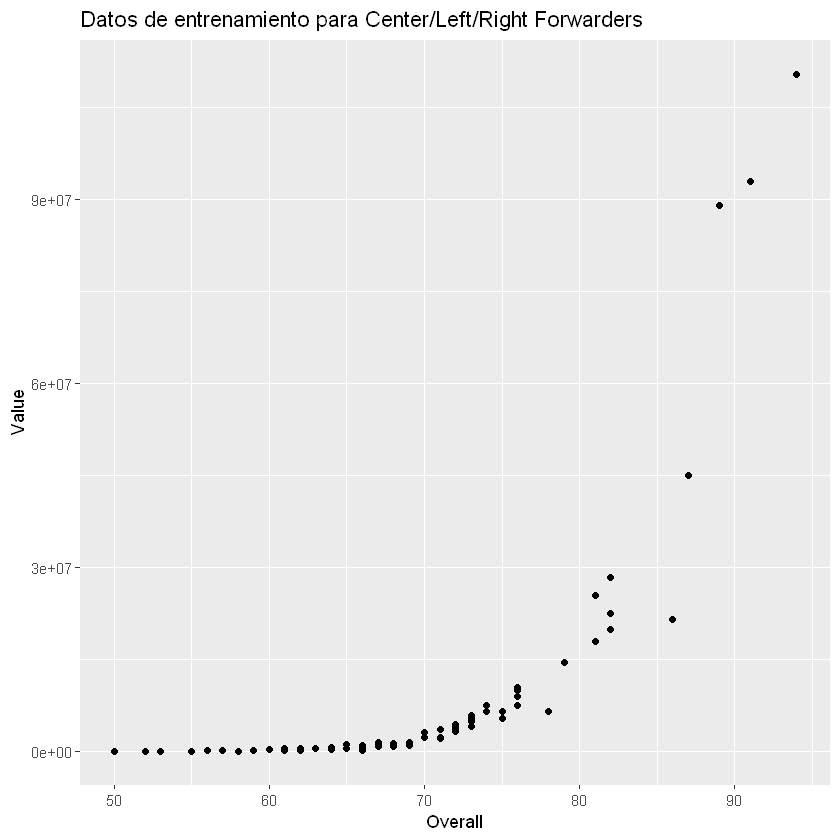

In [320]:
ggplot() + geom_point(data = fifaCLRF.train, aes(x = Overall, y = Value)) + 
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Datos de entrenamiento para Center/Left/Right Forwarders")

<a id='RForestCLRF'></a>
## Random Forest Center/Left/Right Forwarders

In [342]:
#Creación del modelo
set.seed(1234)
fifaCLRF_randomForest <- randomForest(Value ~ Age+Overall, data = fifaCLRF.train, ntree = 1000)

### Visualización del modelo creado

In [329]:
fifaCLRF_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaCLRF.train,      ntree = 80) 
               Type of random forest: regression
                     Number of trees: 80
No. of variables tried at each split: 1

          Mean of squared residuals: 8.078628e+13
                    % Var explained: 76.98

In [330]:
#Importancia de las variables
fifaCLRF_randomForest$importance

IncNodePurity
Age     3.224513e+15 
Overall 2.333812e+16

In [331]:
#Predicción
y_fifaCLRF_predict <- predict(fifaCLRF_randomForest, fifaCLRF.train)

In [332]:
#Correlación entre la predicción
cor(fifaCLRF.train$Value, y_fifaCLRF_predict)

[1] 0.987821

In [333]:
y_fifaCLRF_test_predict <- predict(fifaCLRF_randomForest, fifaCLRF.test)

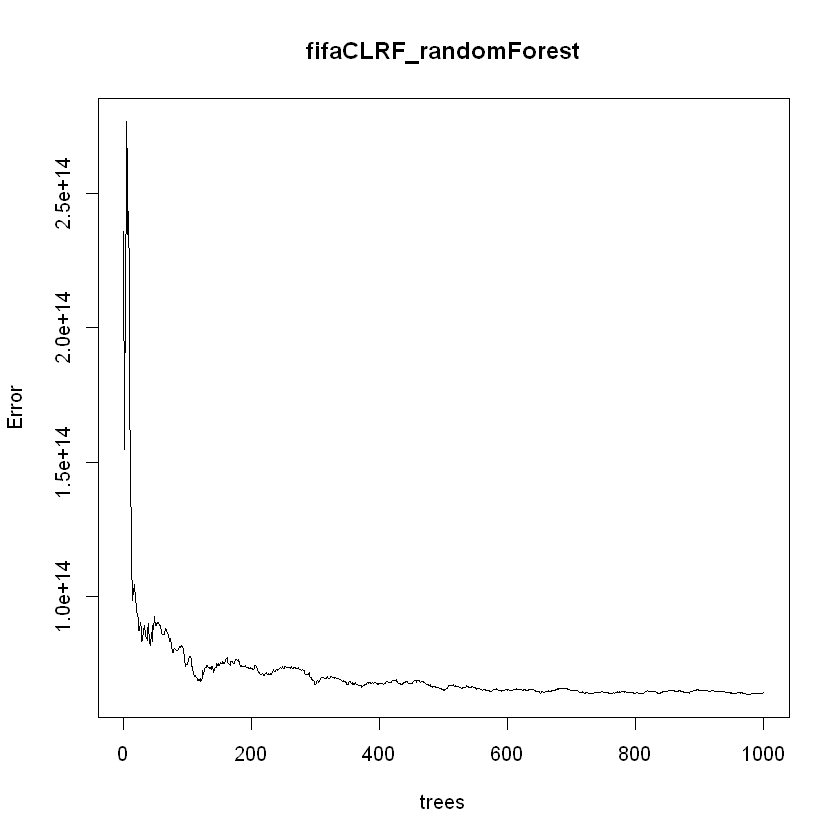

In [343]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaCLRF_randomForest)

#### Vemos que en los 400 árboles el modelo se estabiliza, entonces ajustamos el modelo 

In [344]:
#Ajuste del modelo
set.seed(1234)
fifaCLRF_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaCLRF.train, ntree = 400)

In [345]:
fifaCLRF_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaCLRF.train,      ntree = 400) 
               Type of random forest: regression
                     Number of trees: 400
No. of variables tried at each split: 1

          Mean of squared residuals: 6.775912e+13
                    % Var explained: 80.69

In [346]:
#Predicción con el modelo ajustado
y_fifaCLRF_predict_ajustado <- predict(fifaCLRF_randomForest_ajustado, fifaCLRF.train)

In [347]:
#Correlación entre la predicción
cor(fifaCLRF.train$Value, y_fifaCLRF_predict_ajustado)

[1] 0.9913398

In [348]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaCLRF_predict_ajustado,fifaCLRF.train$Value)

RMSE     Rsquared          MAE 
4.018685e+06 9.827546e-01 1.588666e+06

In [349]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaCLRF.knn <- train(Value ~ Age+Overall,
      data = fifaCLRF,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaCLRF.knn

k-Nearest Neighbors 

105 samples
  2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 95, 93, 94, 95, 95, 94, ... 
Resampling results across tuning parameters:

  k   RMSE     Rsquared   MAE    
   3  4621542  0.9777532  1793741
   5  5809022  0.9589470  2212765
   7  6198447  0.9589909  2283211
   9  6910745  0.9199202  2512437
  11  7429550  0.9284144  2737868
  13  7747765  0.9233745  2855842
  15  8013327  0.9181562  3028074

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

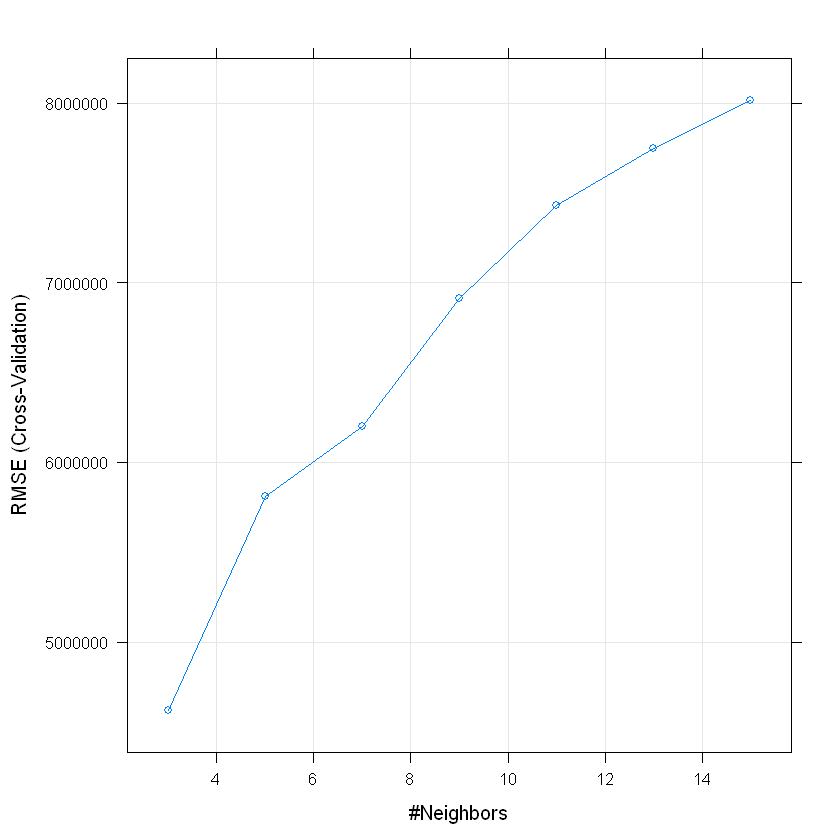

In [350]:
plot(fifaCLRF.knn)

<a id='AlgoritmoST'></a>
## Análisis de datos para Strikers

In [351]:
#Aplicamos PCA al dataset de Strikers a todas las columnas menos "Name" y "Nationality" las cuales no fueron incluídas
names(fifaST)
fifaST.pca <- prcomp(fifaST [c(1:17)], center = TRUE,scale. = TRUE)
summary(fifaST.pca)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Finishing"               
 [5] "Strength"                 "HeadingAccuracy"         
 [7] "Acceleration"             "Volleys"                 
 [9] "SprintSpeed"              "ShotPower"               
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "LongShots"               
[15] "Positioning"              "International.Reputation"
[17] "Value"

Importance of components:
                          PC1    PC2    PC3     PC4    PC5     PC6    PC7
Standard deviation     3.0310 1.6123 1.0901 0.94661 0.8795 0.64152 0.5860
Proportion of Variance 0.5404 0.1529 0.0699 0.05271 0.0455 0.02421 0.0202
Cumulative Proportion  0.5404 0.6933 0.7632 0.81594 0.8614 0.88564 0.9058
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.54402 0.50700 0.4896 0.43661 0.42148 0.36092 0.33256
Proportion of Variance 0.01741 0.01512 0.0141 0.01121 0.01045 0.00766 0.00651
Cumulative Proportion  0.92325 0.93837 0.9525 0.96369 0.97414 0.98180 0.98830
                          PC15    PC16    PC17
Standard deviation     0.31223 0.30648 0.08604
Proportion of Variance 0.00573 0.00553 0.00044
Cumulative Proportion  0.99404 0.99956 1.00000

In [352]:
summary(fifaST)

      Age        Overall        Potential       Finishing        Strength   
 Min.   :16   Min.   :47.00   Min.   :54.00   Min.   :36.00   Min.   :29.0  
 1st Qu.:21   1st Qu.:62.00   1st Qu.:67.00   1st Qu.:62.00   1st Qu.:62.0  
 Median :25   Median :66.00   Median :71.00   Median :67.00   Median :71.0  
 Mean   :25   Mean   :66.22   Mean   :71.35   Mean   :66.96   Mean   :69.5  
 3rd Qu.:28   3rd Qu.:71.00   3rd Qu.:75.00   3rd Qu.:72.00   3rd Qu.:78.0  
 Max.   :39   Max.   :94.00   Max.   :94.00   Max.   :94.00   Max.   :97.0  
 HeadingAccuracy  Acceleration      Volleys       SprintSpeed   
 Min.   :26.00   Min.   :22.00   Min.   :24.00   Min.   :30.00  
 1st Qu.:57.00   1st Qu.:63.00   1st Qu.:50.00   1st Qu.:64.00  
 Median :64.00   Median :70.00   Median :59.00   Median :71.00  
 Mean   :63.51   Mean   :69.14   Mean   :58.28   Mean   :70.17  
 3rd Qu.:71.00   3rd Qu.:77.00   3rd Qu.:66.00   3rd Qu.:77.00  
 Max.   :94.00   Max.   :95.00   Max.   :90.00   Max.   :95.00  
   Sho

In [353]:
dim(fifaST)

[1] 2562   17

In [354]:
set.seed(1500)
indexes_fifaST <- createDataPartition(fifaST$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaST.train <- fifaST[indexes_fifaST,]
fifaST.test <- fifaST[-indexes_fifaST,]

In [355]:
#Verificamos los subconjuntos
names(fifaST.train)
dim(fifaST.train)

names(fifaST.test)
dim(fifaST.test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Finishing"               
 [5] "Strength"                 "HeadingAccuracy"         
 [7] "Acceleration"             "Volleys"                 
 [9] "SprintSpeed"              "ShotPower"               
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "LongShots"               
[15] "Positioning"              "International.Reputation"
[17] "Value"

[1] 2051   17

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Finishing"               
 [5] "Strength"                 "HeadingAccuracy"         
 [7] "Acceleration"             "Volleys"                 
 [9] "SprintSpeed"              "ShotPower"               
[11] "BallControl"              "Reactions"               
[13] "Dribbling"                "LongShots"               
[15] "Positioning"              "International.Reputation"
[17] "Value"

[1] 511  17

In [356]:
#Verificamos que la suma de la cantidad de líneas de fifaST.train y fifaST.test 
#es igual a la cantidad total de lineas de fifaST
nrow(fifaST.train) + nrow(fifaST.test) == nrow(fifaST)

[1] TRUE

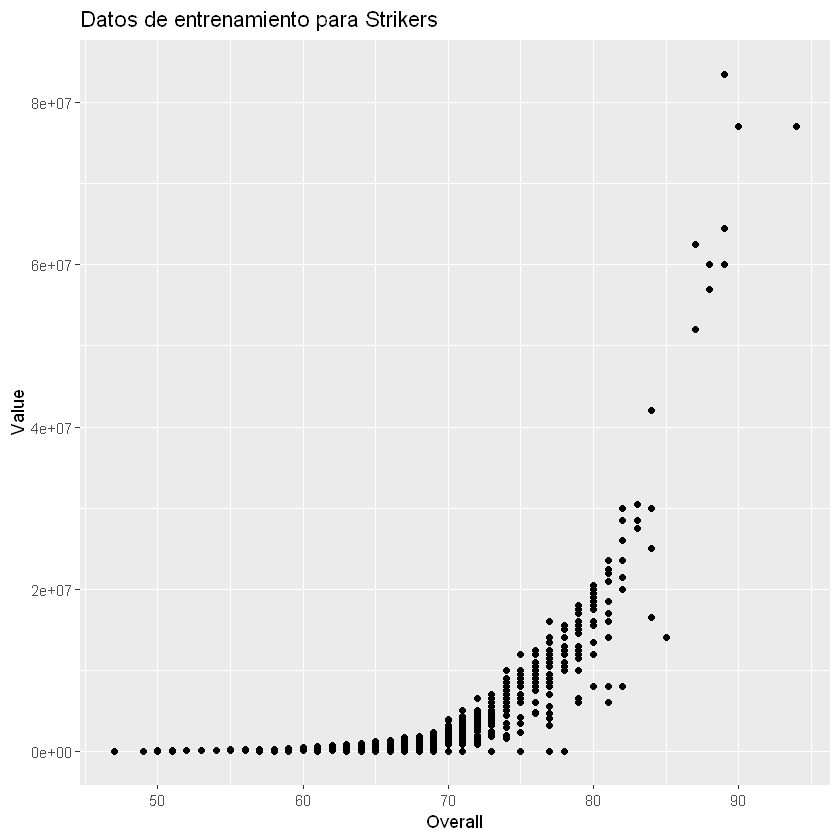

In [357]:
ggplot() + geom_point(data = fifaST.train, aes(x = Overall, y = Value)) + 
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Datos de entrenamiento para Strikers")

<a id='RForestST'></a>
## Random Forest Strikers

In [358]:
#Creación del modelo
library(randomForest)
set.seed(1234)
fifaST_randomForest <- randomForest(Value ~ Age+Overall, data = fifaST.train, ntree = 500)

### Visualización del modelo creado

In [359]:
fifaST_randomForest


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaST.train,      ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.830427e+12
                    % Var explained: 94.59

In [360]:
#Importancia de las variables
fifaST_randomForest$importance

IncNodePurity
Age     4.013381e+15 
Overall 6.112383e+16

In [361]:
#Predicción
y_fifaST_predict <- predict(fifaST_randomForest, fifaST.train)

In [362]:
#Correlación entre la predicción
cor(fifaST.train$Value, y_fifaST_predict)

[1] 0.9934137

In [363]:
y_fifaST_test_predict <- predict(fifaST_randomForest, fifaST.test)

In [364]:
cor(fifaST.test$Value, y_fifaST_test_predict)

[1] 0.985806

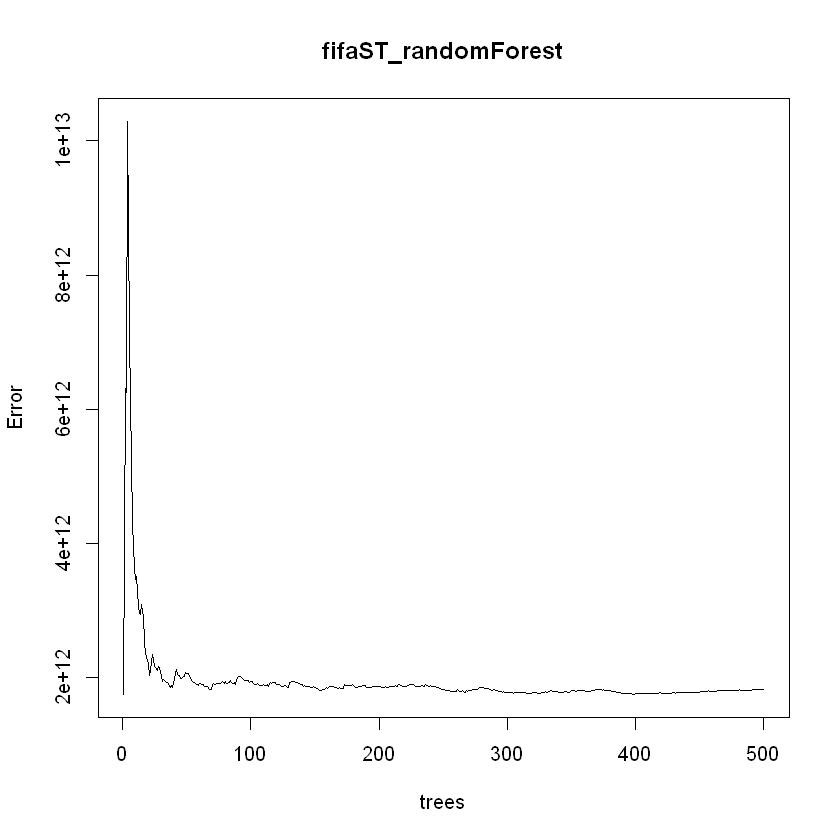

In [365]:
#Gráfica del modelo que muestra que al incrementar los árboles los errores disminuyen
plot(fifaST_randomForest)

#### Vemos que en los 250 árboles el modelo se estabiliza, entonces ajustamos el modelo 

In [366]:
#Ajuste del modelo
set.seed(1234)
fifaST_randomForest_ajustado <- randomForest(Value ~ Age+Overall, data = fifaST.train, ntree = 250)

In [367]:
fifaST_randomForest_ajustado


Call:
 randomForest(formula = Value ~ Age + Overall, data = fifaST.train,      ntree = 250) 
               Type of random forest: regression
                     Number of trees: 250
No. of variables tried at each split: 1

          Mean of squared residuals: 1.827523e+12
                    % Var explained: 94.6

In [368]:
#Predicción con el modelo ajustado
y_fifaST_predict_ajustado <- predict(fifaST_randomForest_ajustado, fifaST.train)

In [369]:
#Correlación entre la predicción
cor(fifaST.train$Value, y_fifaST_predict_ajustado)

[1] 0.9933636

In [370]:
#Evaluando errores utilizando Random Forest
postResample(y_fifaST_predict_ajustado,fifaST.train$Value)

RMSE     Rsquared          MAE 
8.061131e+05 9.867713e-01 2.844333e+05

In [371]:
# Para la validación cruzada
# Define el grid de parámetros a probar
valores <- expand.grid(k = seq(3, 15, 2)) 
# Define los detalles del método de validación cruzada o remuestreo a utilizar
ajustes <- trainControl(method='cv',  # validación cruzada
             number = 10)  # diez submuestras
# Aplica el método seleccionando el valor óptimo de k
fifaST.knn <- train(Value ~ Age+Overall,
      data = fifaST,
      method = 'knn',
      tuneGrid = valores,
      trControl = ajustes)
fifaST.knn

k-Nearest Neighbors 

2562 samples
   2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2305, 2306, 2305, 2306, 2306, 2306, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE     
   3   864542.4  0.9824114  195405.7
   5   903209.4  0.9826321  198772.5
   7  1037509.6  0.9807895  214674.6
   9  1156453.3  0.9781674  230033.1
  11  1328344.8  0.9701590  250155.1
  13  1362655.3  0.9699435  253236.4
  15  1429640.9  0.9680919  264156.0

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 3.

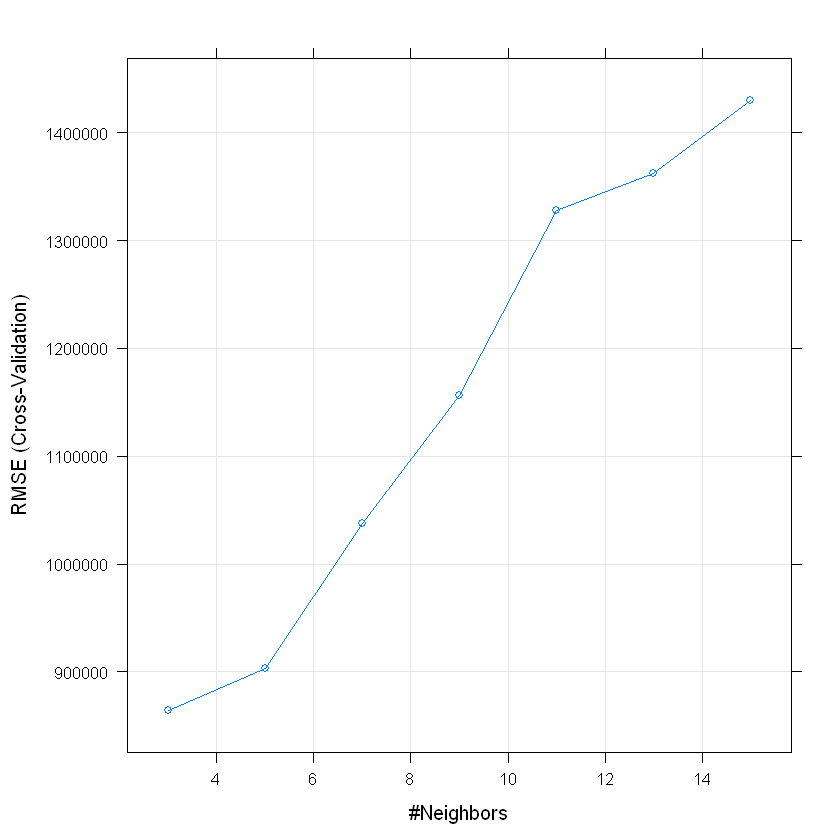

In [372]:
plot(fifaST.knn)